# Lending club case study source code

In [83]:

## importing the required libraries numpy, pandas for numerical and data analysis respectively
import pandas as pd
import numpy as np

## importing the visualization libraries to make use of graphical presentations such as charts
import seaborn as sns
import matplotlib.pyplot as plt

## optinally importing the warning libraries, for EDA we are supressing the warnings as this is visualisation project
import warnings
warnings.filterwarnings ('ignore')

# Using Parse_dates to get the dates in date format, identified and saved them as dates in excel and parsing it here to avoid rework
loans = pd.read_csv(r"loan.csv", parse_dates= ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d'])

In [84]:
loans.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [85]:
loans.shape

(39717, 111)

# Data Cleaning
## Missing Values check

In [86]:
100*loans.isnull().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

#### Removing columns having all null values

In [88]:
#removing columns having all null values
loan = loans.dropna(how='all',axis=1)
loan.shape

(39717, 57)

### Deleting the dupliacte rows if any

In [94]:
loan.drop_duplicates(inplace = True)
loan.shape

##### no rows are deleted

(39717, 54)

#### Removing/Dropping columns with more than 40% missing values are considered high in the industry

In [95]:
# In order to discard from analysis we need to drop the columns with high percentage of missing values
# hence calculting average null value counts

100*loan.isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [96]:
#dropping columns having more than 60% null values
loan = loan.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis = 1)

KeyError: "['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'] not found in axis"

In [97]:
100*loan.isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


## Imputing missing values

In [38]:
## Numerical column --> Mean/Median (Median is always better approach bcoz median is least affected with outliers)
## Categorical column --> Mode/create a new category (Missing)

In [98]:
med_p = loan['pub_rec_bankruptcies'].median()
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].fillna(med_p)

In [99]:
med_c = loan['chargeoff_within_12_mths'].median()
loan['chargeoff_within_12_mths'] = loan['chargeoff_within_12_mths'].fillna(med_c)

In [100]:
med_col = loan['collections_12_mths_ex_med'].median()
loan['collections_12_mths_ex_med'] = loan['collections_12_mths_ex_med'].fillna(med_col)

In [101]:
med_tax = loan['tax_liens'].median()
loan['tax_liens'] = loan['tax_liens'].fillna(med_tax)

In [102]:
loan['desc'] = loan['desc'].fillna('Missing')
loan['emp_title'] = loan['emp_title'].fillna('Missing')
loan['emp_length'] = loan['emp_length'].fillna('Missing')
loan['title'] = loan['title'].fillna('Missing')

In [106]:
loan['revol_util'] = loan['revol_util'].fillna(loan['revol_util'].mode()[0])
loan['last_credit_pull_d'] = loan['last_credit_pull_d'].fillna(loan['last_credit_pull_d'].mode()[0])


In [107]:
100*loan.isnull().mean()

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
desc                          0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec       

## Correcting the data types of the columns from data framme

In [108]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [109]:
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...    recoveries  \
count  39717.000000    39717.000000  ...  39717.000000   
mean       0.146512        0.869200  ...     95.221624   
std        0.491812        1.070219  ...    688.744771   
min        0.000000        0.000000  ...      0.000000   
25%        0.000000        0.000000  ...      0.000000   
50%        0.000000        1.000000  ...      0.000000   
75%        0.000000        1.000000  ...      0.000000   
max       11.000000        8.000000  ...  29623.350000   

       collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
count             39717.000000     39717.000000                     39717.0   
mean                 12.406112      2678.826162                         0.0   
std                 148.671593      4447.136012                         0.0   
min                   0.000000         0.000000                         0.0   
25%                   0.000000       218.680000                         0.0   
50%                   0.000000       546.140000                         0.0   
75%                   0.000000      3293.160000                         0.0   
max                7002.190000     36115.200000                         0.0   

       policy_code  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
count      39717.0         39717.0                   39717.0      39717.0   
mean           1.0             0.0                       0.0          0.0   
std            0.0             0.0                       0.0          0.0   
min            1.0             0.0                       0.0          0.0   
25%            1.0             0.0                       0.0          0.0   
50%            1.0             0.0                       0.0          0.0   
75%            1.0             0.0                       0.0          0.0   
max            1.0             0.0                       0.0          0.0   

       pub_rec_bankruptcies  tax_liens  
count          39717.000000    39717.0  
mean               0.042501        0.0  
std                0.202603        0.0  
min                0.000000        0.0  
25%                0.000000        0.0  
50%                0.000000        0.0  
75%                0.000000        0.0  
max                2.000000        0.0  

[8 rows x 31 columns]

In [110]:
#converting memeber_id type to str as it's not a measure
loan['member_id'] = loan['member_id'].astype(str)

In [111]:
#converting id type to str as it's not a measure
loan['id'] = loan['id'].astype(str)

In [112]:
loan.dtypes

id                             object
member_id                      object
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [113]:
loan.describe()

loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count  39717.000000  39717.000000     39717.000000  39717.000000   
mean   11219.443815  10947.713196     10397.448868    324.561922   
std     7456.670694   7187.238670      7128.450439    208.874874   
min      500.000000    500.000000         0.000000     15.690000   
25%     5500.000000   5400.000000      5000.000000    167.020000   
50%    10000.000000   9600.000000      8975.000000    280.220000   
75%    15000.000000  15000.000000     14400.000000    430.780000   
max    35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti   delinq_2yrs  inq_last_6mths      open_acc  \
count  3.971700e+04  39717.000000  39717.000000    39717.000000  39717.000000   
mean   6.896893e+04     13.315130      0.146512        0.869200      9.294408   
std    6.379377e+04      6.678594      0.491812        1.070219      4.400282   
min    4.000000e+03      0.000000      0.000000        0.000000      2.000000   
25%    4.040400e+04      8.170000      0.000000        0.000000      6.000000   
50%    5.900000e+04     13.400000      0.000000        1.000000      9.000000   
75%    8.230000e+04     18.600000      0.000000        1.000000     12.000000   
max    6.000000e+06     29.990000     11.000000        8.000000     44.000000   

            pub_rec  ...    recoveries  collection_recovery_fee  \
count  39717.000000  ...  39717.000000             39717.000000   
mean       0.055065  ...     95.221624                12.406112   
std        0.237200  ...    688.744771               148.671593   
min        0.000000  ...      0.000000                 0.000000   
25%        0.000000  ...      0.000000                 0.000000   
50%        0.000000  ...      0.000000                 0.000000   
75%        0.000000  ...      0.000000                 0.000000   
max        4.000000  ...  29623.350000              7002.190000   

       last_pymnt_amnt  collections_12_mths_ex_med  policy_code  \
count     39717.000000                     39717.0      39717.0   
mean       2678.826162                         0.0          1.0   
std        4447.136012                         0.0          0.0   
min           0.000000                         0.0          1.0   
25%         218.680000                         0.0          1.0   
50%         546.140000                         0.0          1.0   
75%        3293.160000                         0.0          1.0   
max       36115.200000                         0.0          1.0   

       acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
count         39717.0                   39717.0      39717.0   
mean              0.0                       0.0          0.0   
std               0.0                       0.0          0.0   
min               0.0                       0.0          0.0   
25%               0.0                       0.0          0.0   
50%               0.0                       0.0          0.0   
75%               0.0                       0.0          0.0   
max               0.0                       0.0          0.0   

       pub_rec_bankruptcies  tax_liens  
count          39717.000000    39717.0  
mean               0.042501        0.0  
std                0.202603        0.0  
min                0.000000        0.0  
25%                0.000000        0.0  
50%                0.000000        0.0  
75%                0.000000        0.0  
max                2.000000        0.0  

[8 rows x 29 columns]

In [114]:
loan.shape

(39717, 54)

### Derived Column

In [115]:
#creating a derived column to check if loan is charged off or not
def ln_status(s):
    if s=='Charged Off':
        return 1
    else:
        return 0
loan['Charged Off'] = loan['loan_status'].apply(ln_status)

In [116]:
loan['Charged Off'].value_counts()

0    34090
1     5627
Name: Charged Off, dtype: int64

In [117]:
#COnverting int_rate to float from object
loan['int_rate'] = loan['int_rate'].apply(lambda x:float(x.split('%')[0]))


In [118]:
loan['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64

### Segregating columns

In [119]:
cat_cols = ['grade','Charged Off','sub grade','purpose','title','term','emp_length','home_ownership','addr_state','verification_status','initial_list_status','application_type','loan_status']
cont_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','revol_util','out_prncp_inv','total_pymnt','last_pymnt_amnt','out_prncp','total_rec_late_fee','total_rec_prncp','total_rec_int','total_pymnt_inv','annual_inc','issue_d','dti','earliest_cr_line','last_credit_pull_d','last_pymnt_d','issue_d ', 'delinq_2yrs', 'pub_rec_bankruptcies']
extra_cols = ['id','desc','url','emp_title','member_id','inq_last_6mths','open_acc','pub_rec','revol_bal','total_acc','recoveries','collection_recovery_fee','collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','pymnt_plan']
imp_cat_cols = ['Charged Off','grade','purpose','term','emp_length','home_ownership','addr_state','verification_status','application_type','loan_status']
imp_cont_cols =['delinq_2yrs', 'pub_rec_bankruptcies', 'loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','out_prncp_inv','total_pymnt','last_pymnt_amnt','out_prncp','total_rec_late_fee','total_rec_prncp','total_rec_int','total_pymnt_inv','dti']


In [122]:
len(cat_cols)+len(cont_cols)+len(extra_cols)
#loan.shape

(39717, 55)

### Droping the extra columns

In [124]:
loan = loan.drop(extra_cols,axis = 1)

In [125]:
loan.shape

(39717, 36)

In [58]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'revol_util', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'Charged Off'],
      dtype='object')

## Univariate Analysis

### Categorical

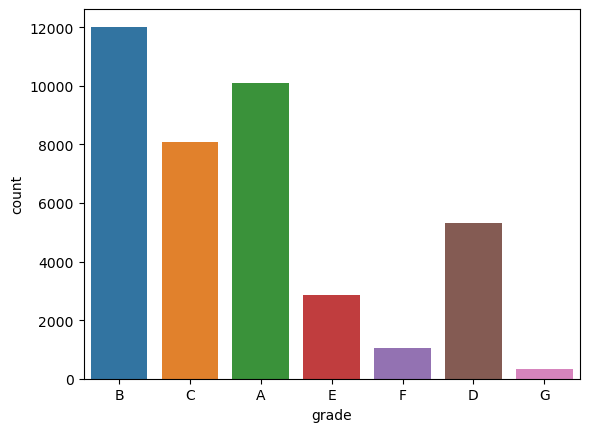

In [126]:
sns.countplot(x=loan["grade"])
plt.show()

<Figure size 1200x500 with 0 Axes>

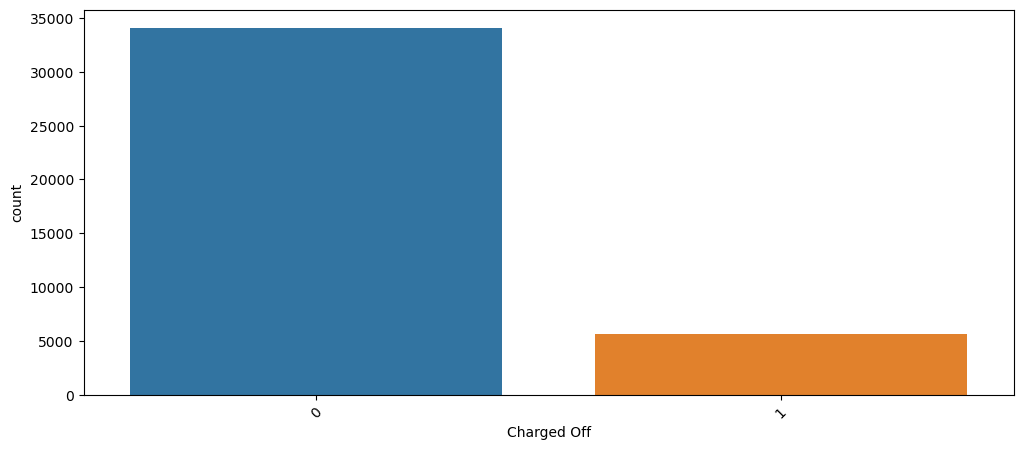

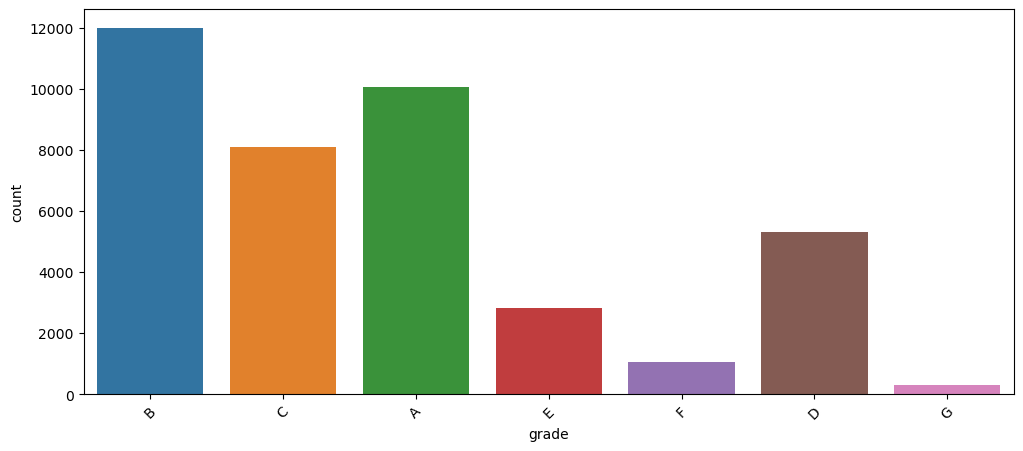

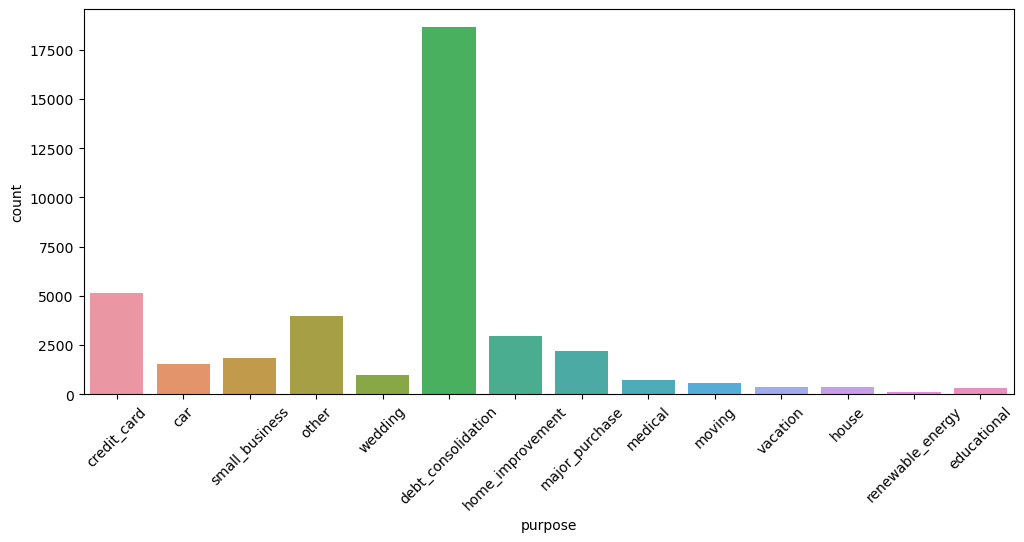

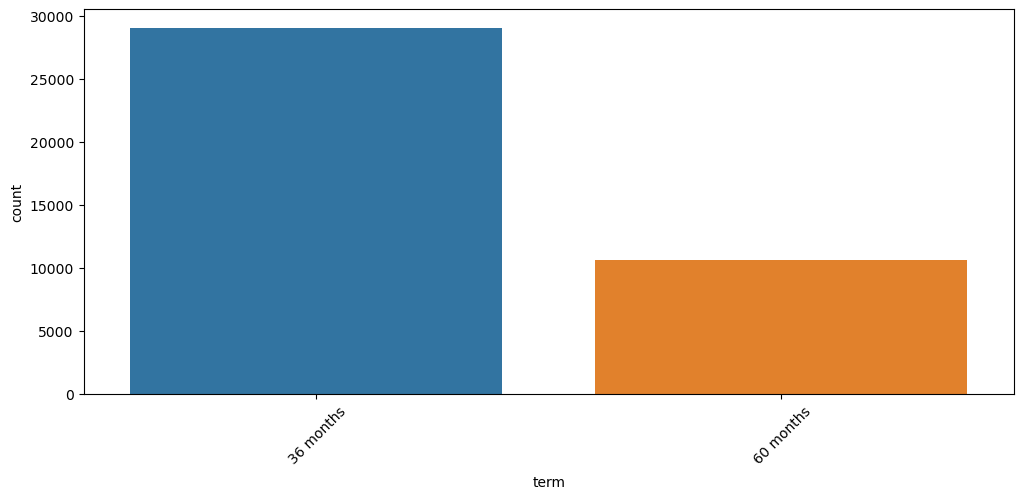

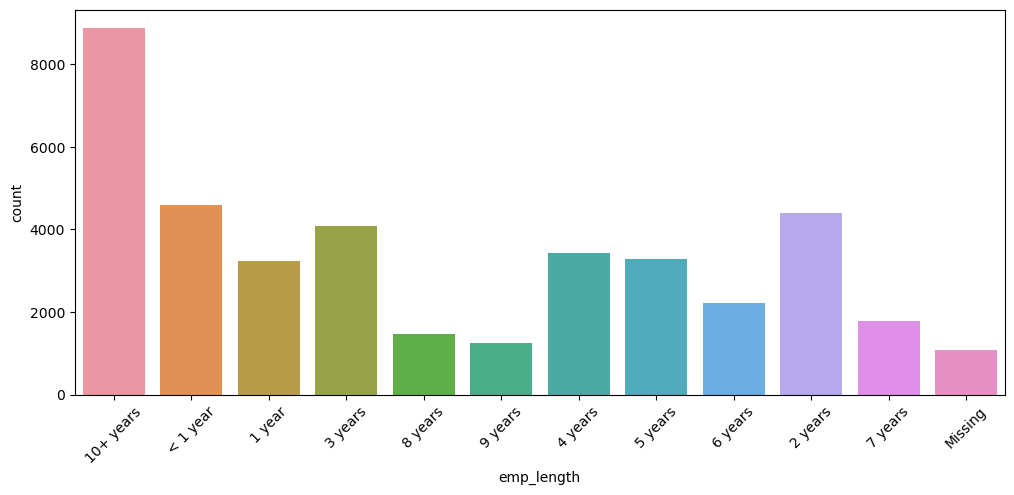

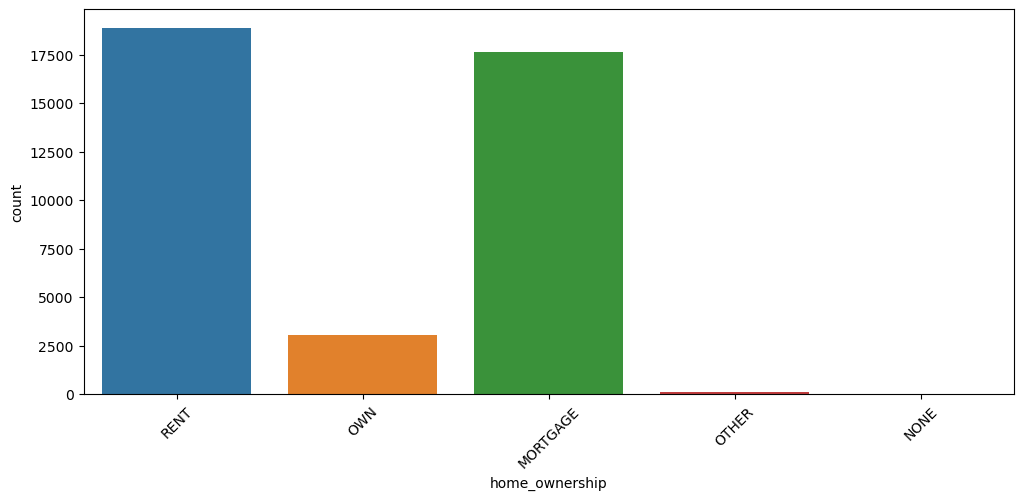

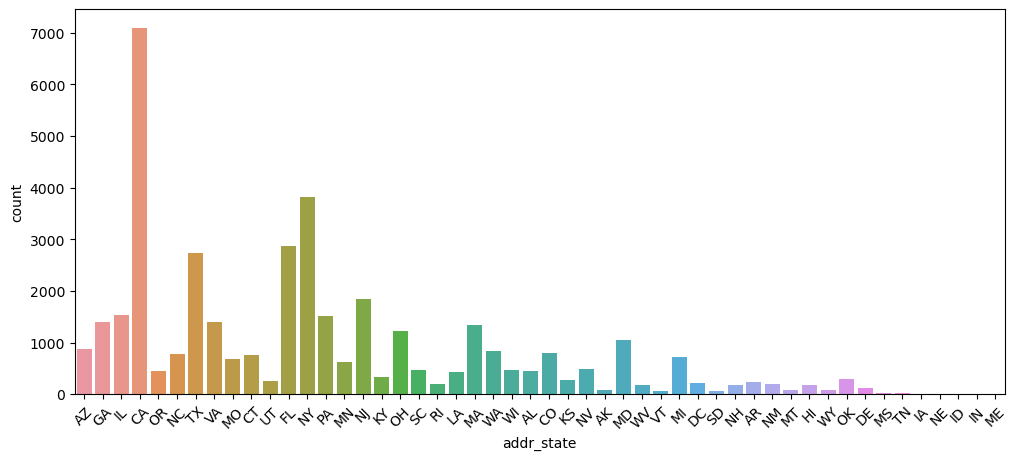

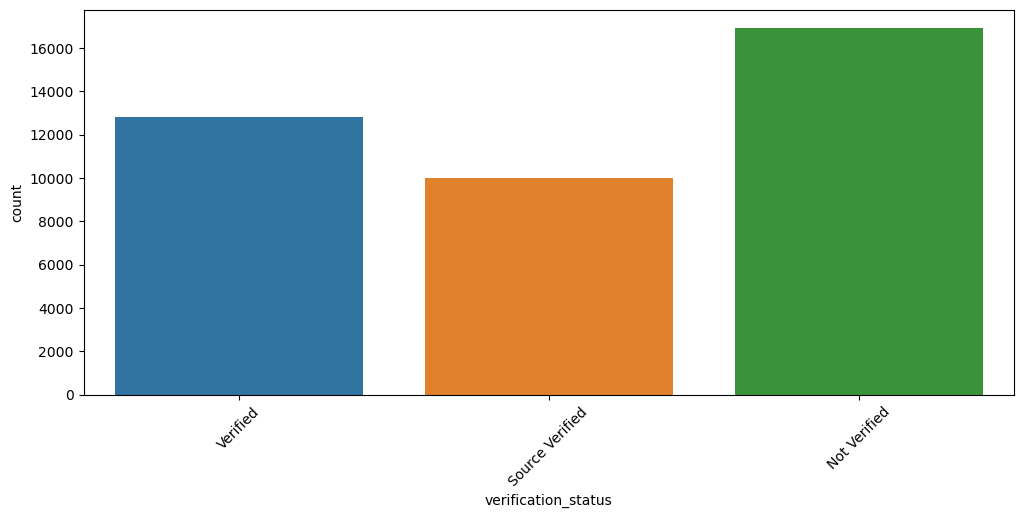

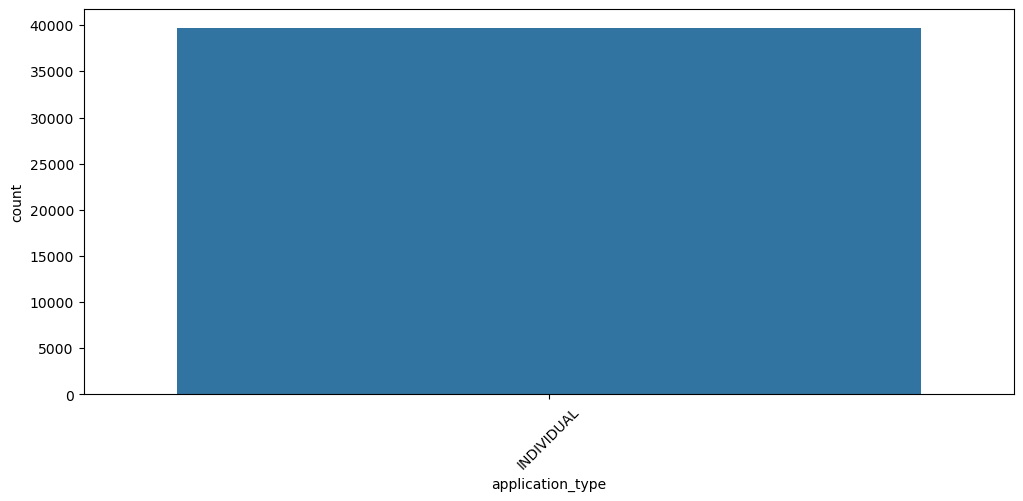

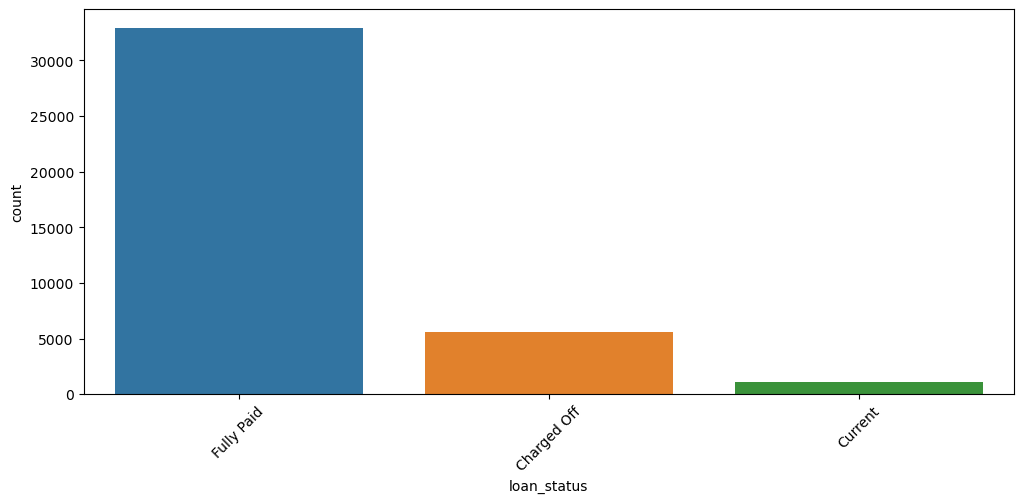

In [127]:
plt.figure(figsize = (12,5))
for col in imp_cat_cols:
    plt.figure(figsize = (12,5))
    sns.countplot(x=loan[col])
    plt.xticks(rotation=45)
    plt.show()

## Numerical

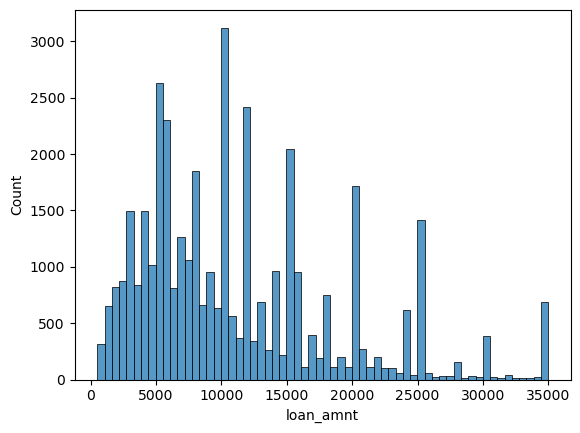

In [128]:
sns.histplot(loan['loan_amnt'])
plt.show()

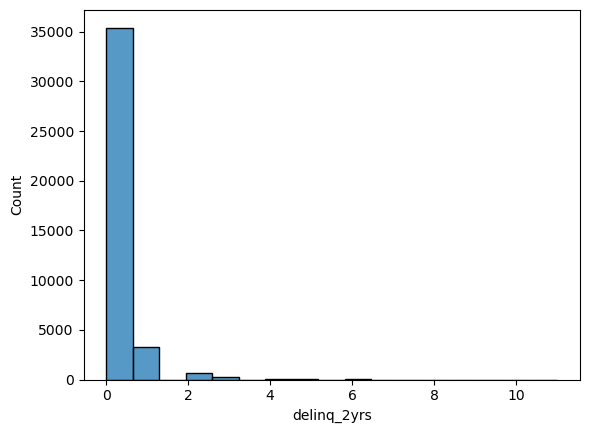

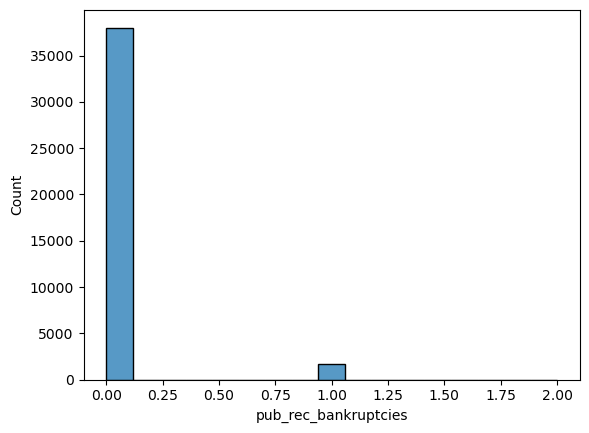

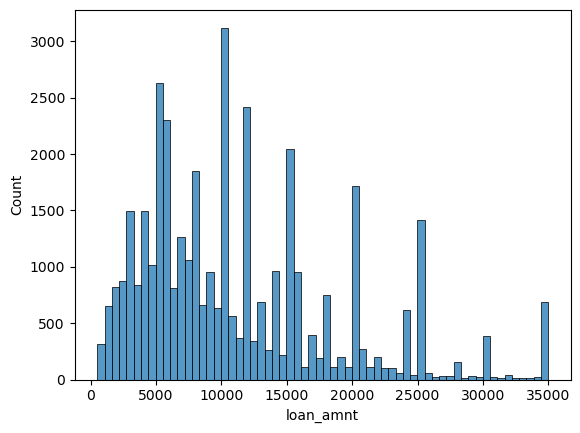

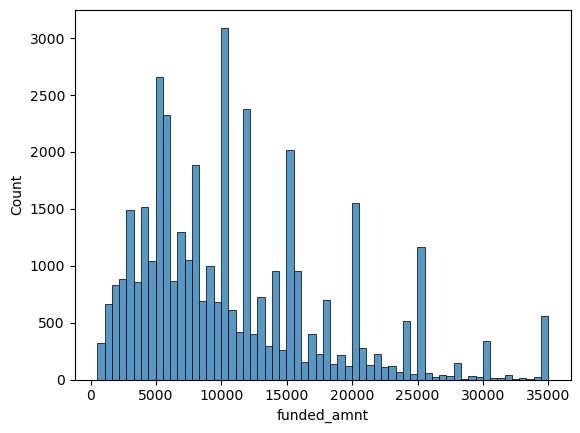

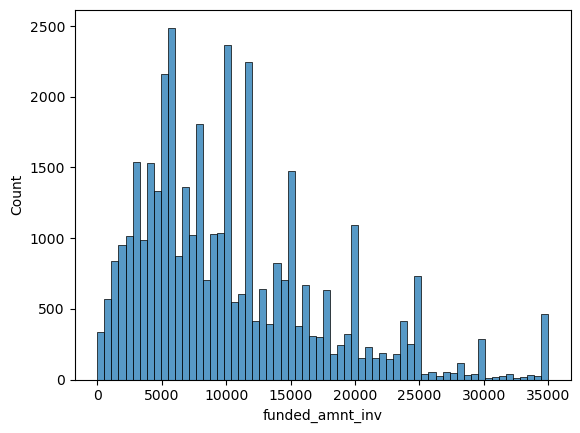

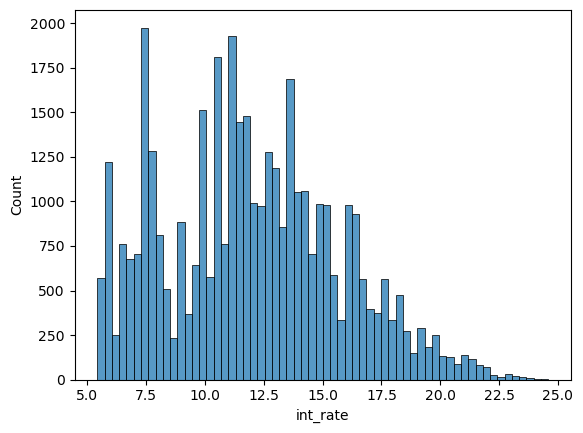

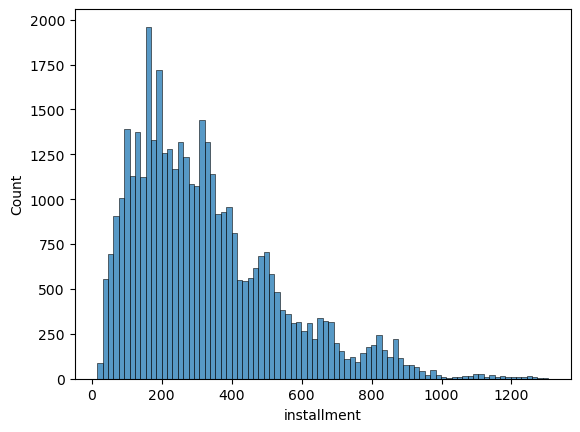

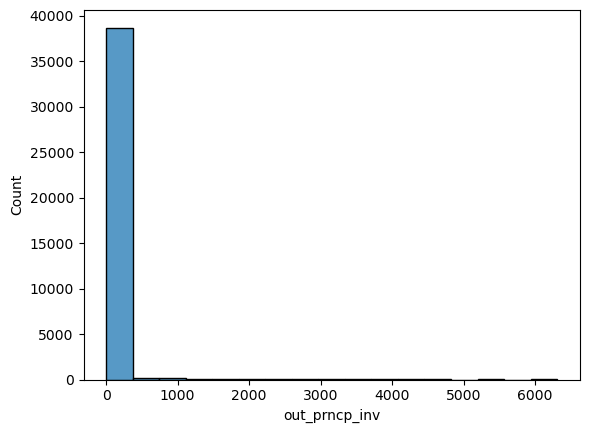

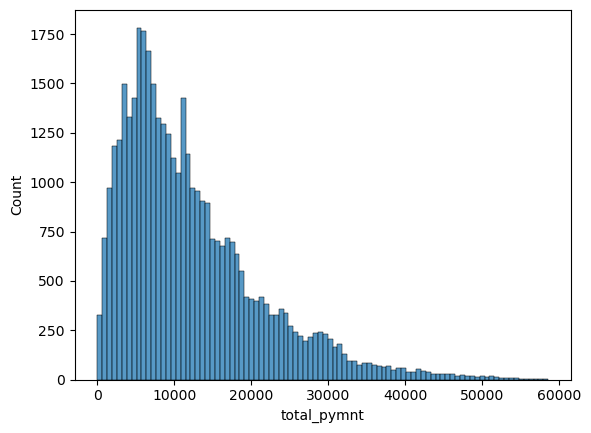

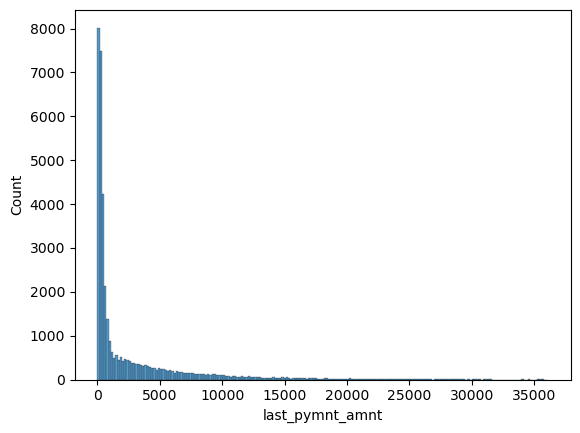

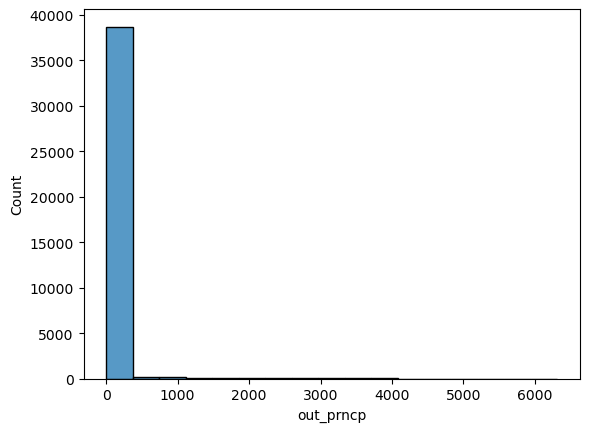

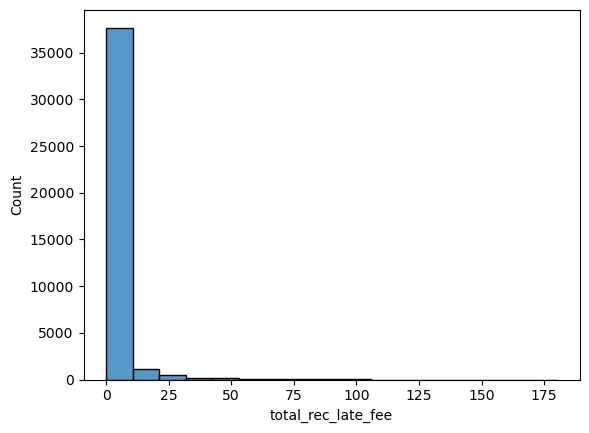

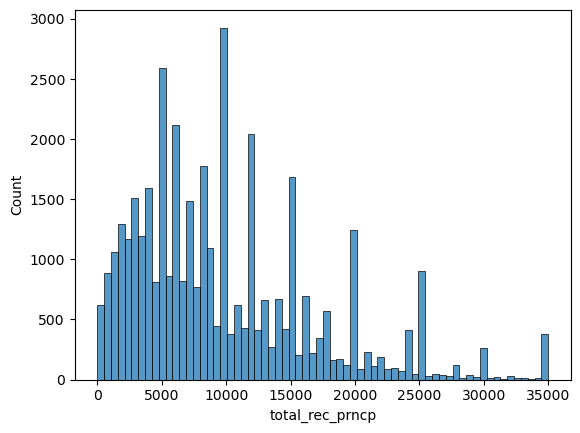

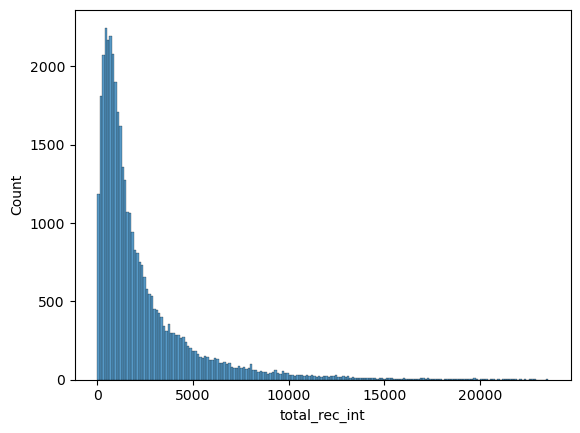

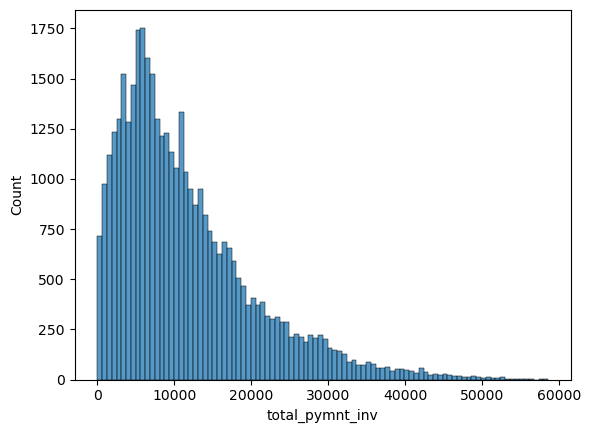

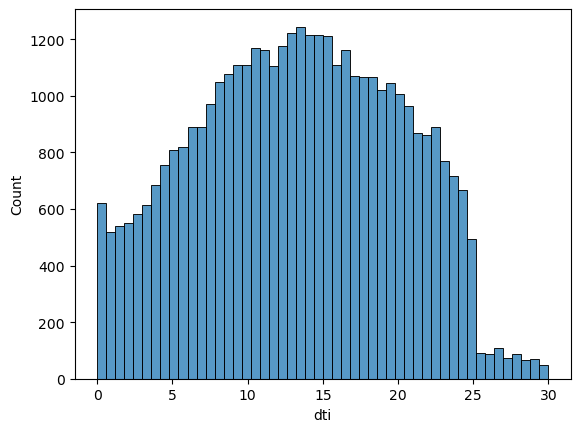

In [129]:
for col in imp_cont_cols:
    sns.histplot(loan[col])
    plt.show()

## Bivariate Analysis

### Numerical vs Numerical

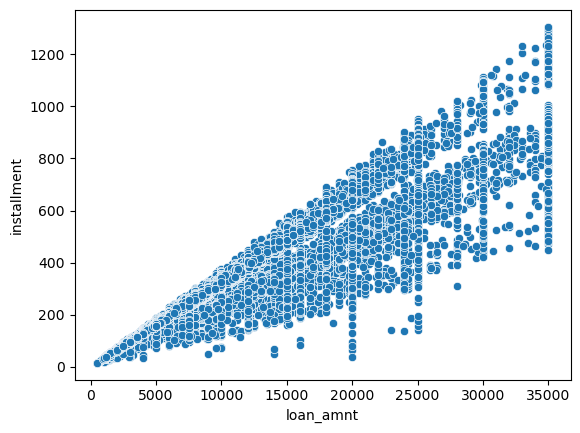

In [130]:
sns.scatterplot(x=loan['loan_amnt'], y=loan['installment'])
plt.show()

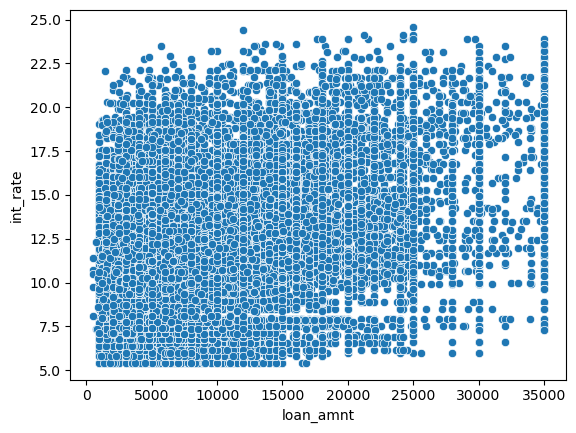

In [131]:
sns.scatterplot(x=loan['loan_amnt'], y=loan['int_rate'])
plt.show()

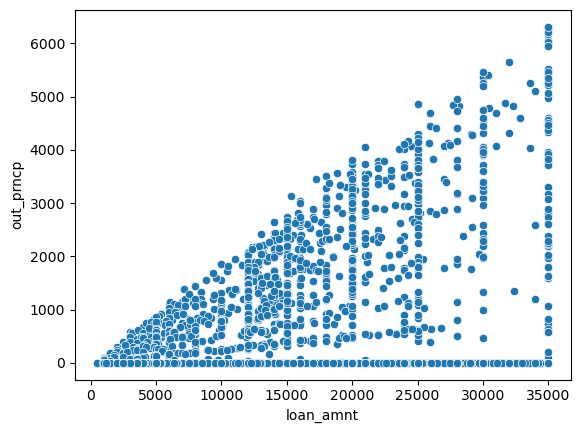

In [132]:
sns.scatterplot(x=loan['loan_amnt'], y=loan['out_prncp'])
plt.show()

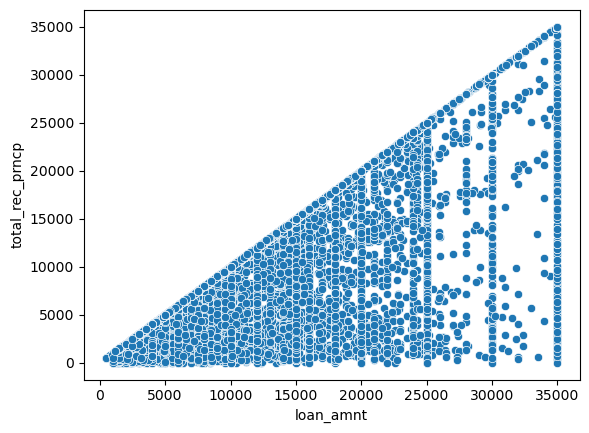

In [133]:
sns.scatterplot(x=loan['loan_amnt'], y=loan['total_rec_prncp'])
plt.show()


#### Let's try to understand the factors driving charge off scenario as below:

### Numerical vs Categorical

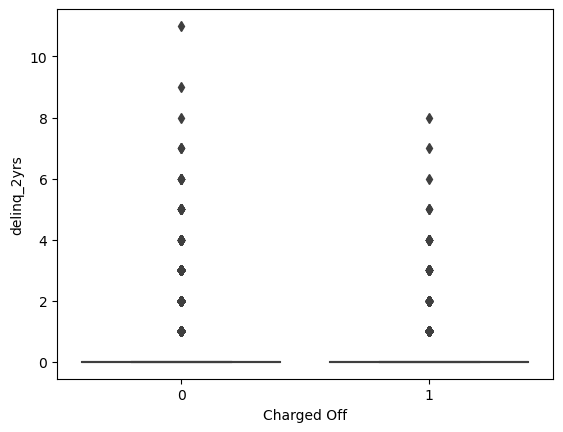

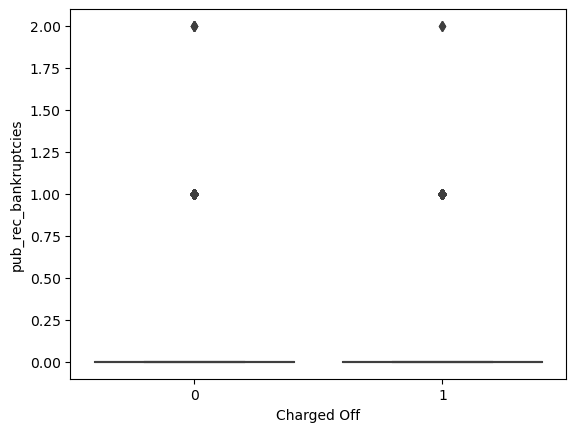

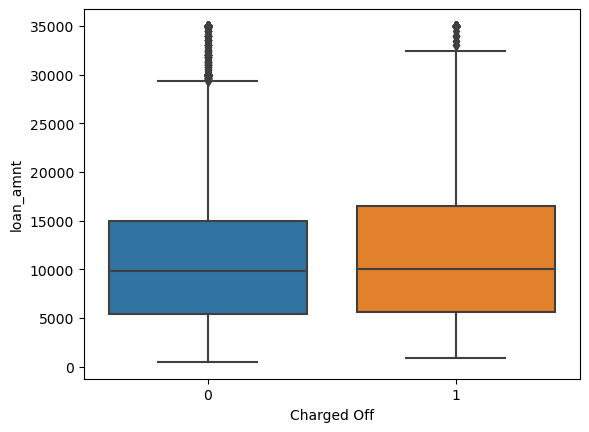

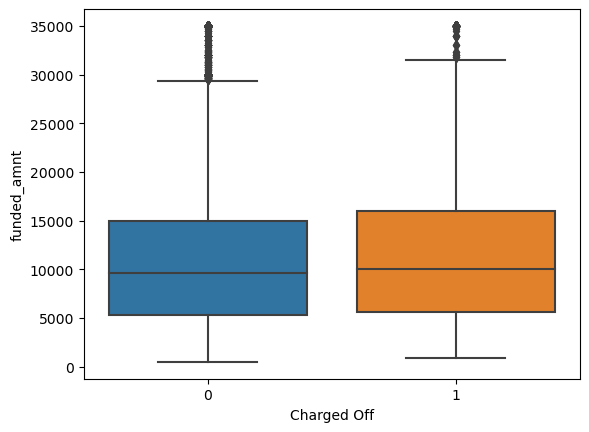

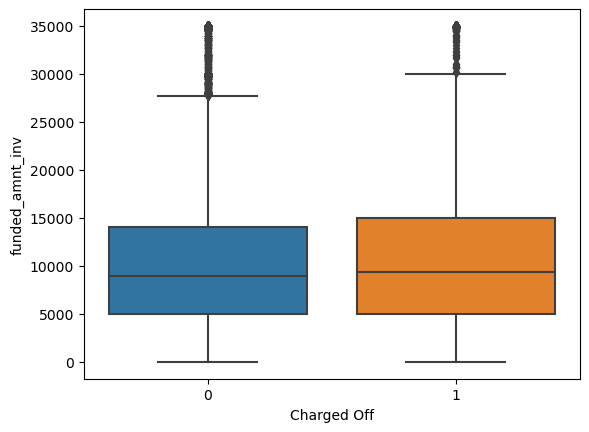

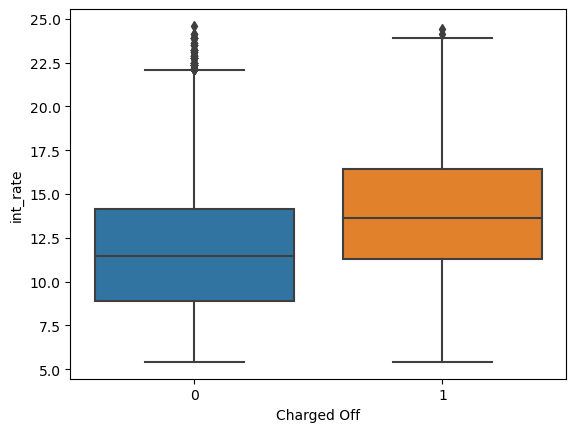

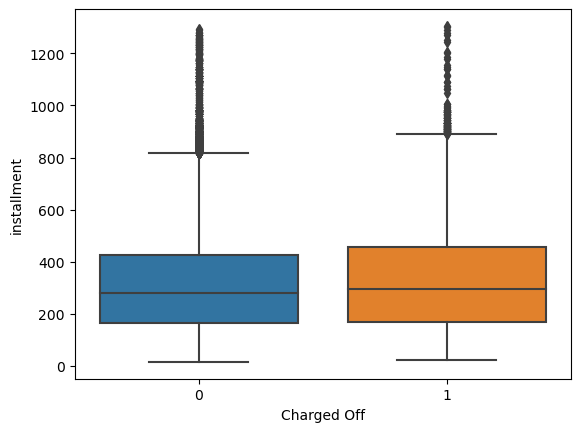

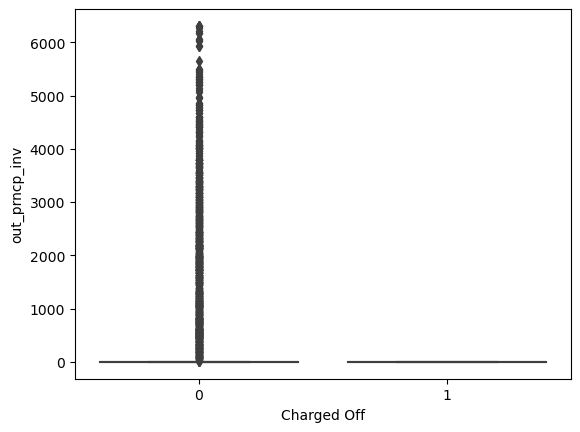

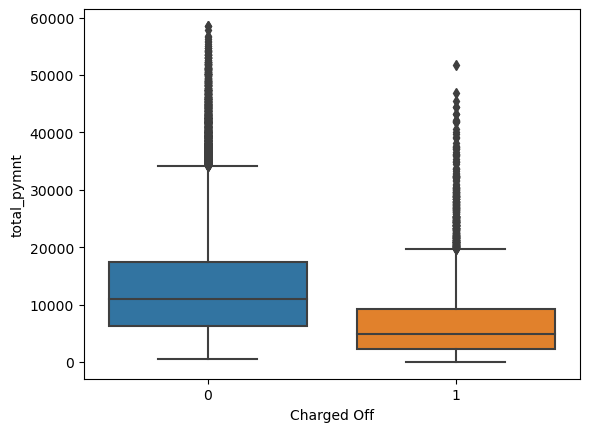

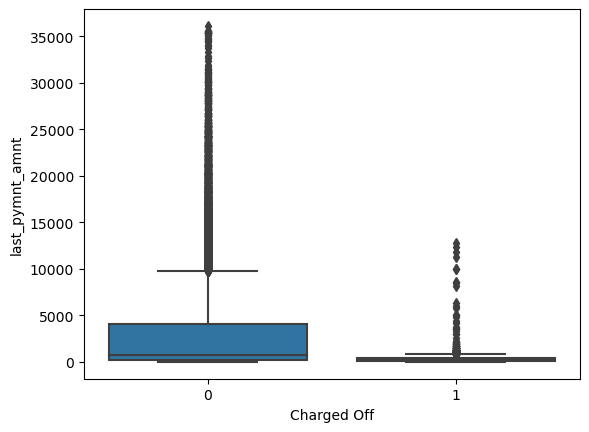

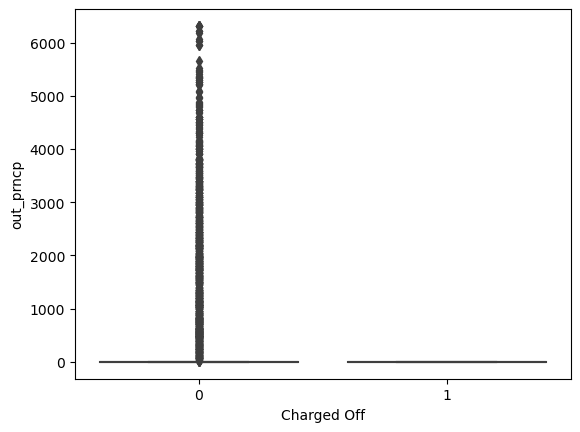

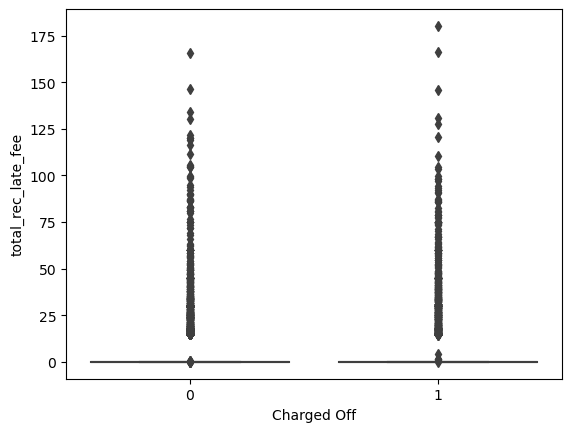

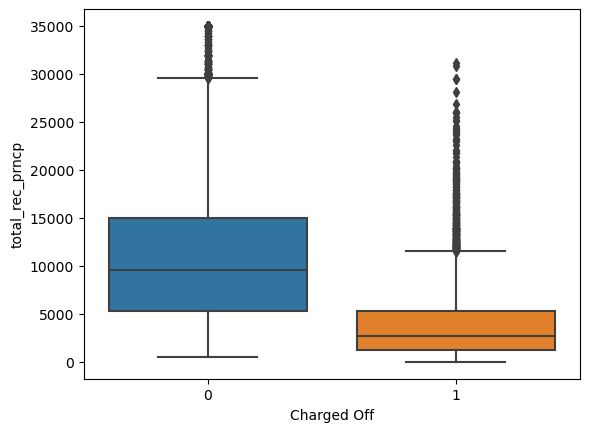

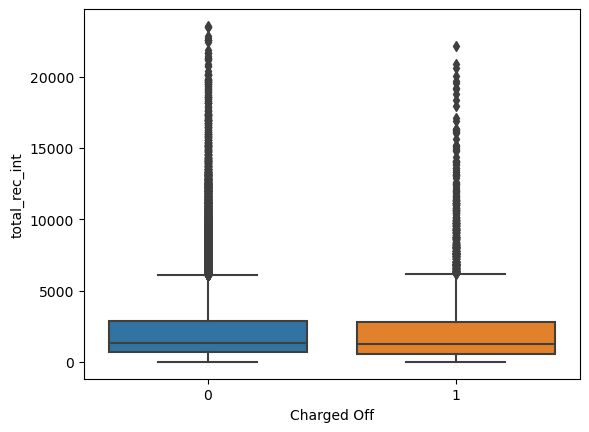

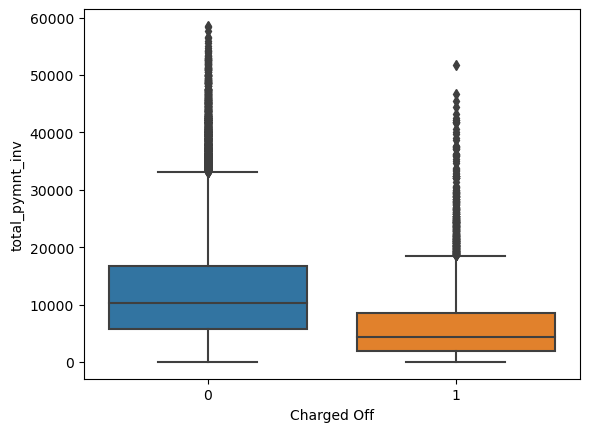

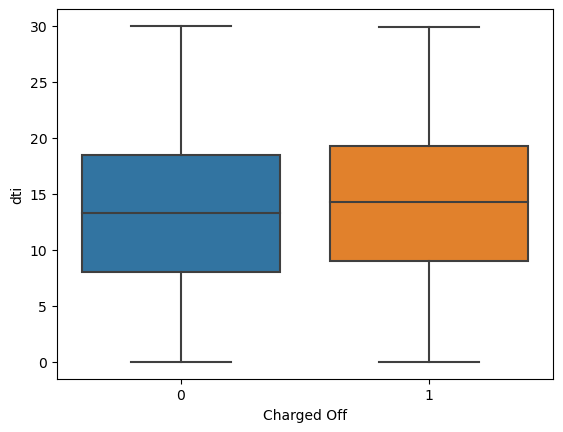

In [134]:
for col1 in imp_cont_cols:
    sns.boxplot(x=loan['Charged Off'],y=loan[col1])
    plt.show()

#### Charged Off vs int_rate shows higher the interst rate , higher chances of Charged Off. i.e. people who are willing to go for high interese rates, have more probability of being defaulters.

### Creating multiple charts at a stretch to see the important columns which provide insights
### P.S: All the charts might not be relevant and might not give meaningful insights, need to analyse and decide on required driving factors.

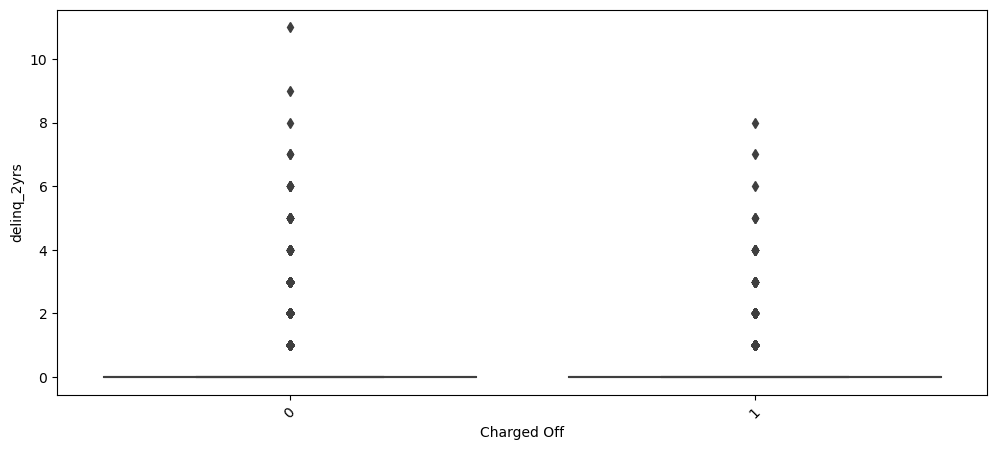

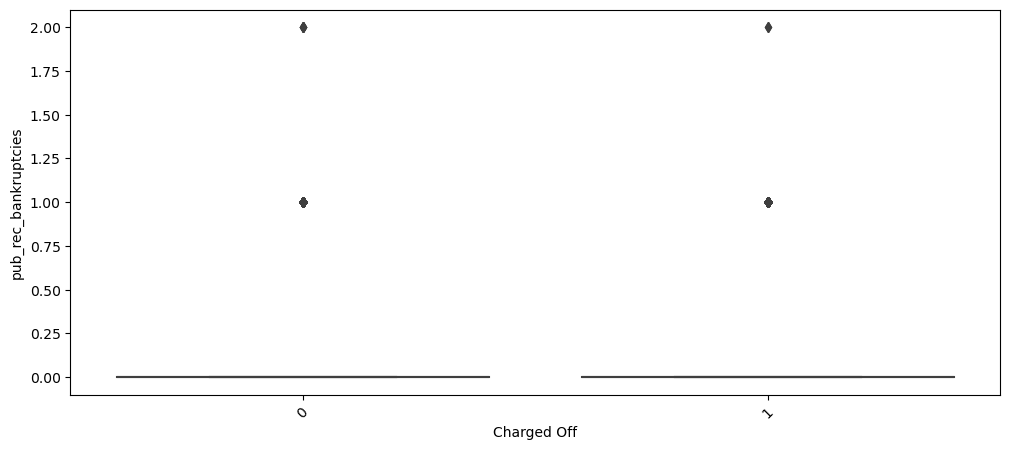

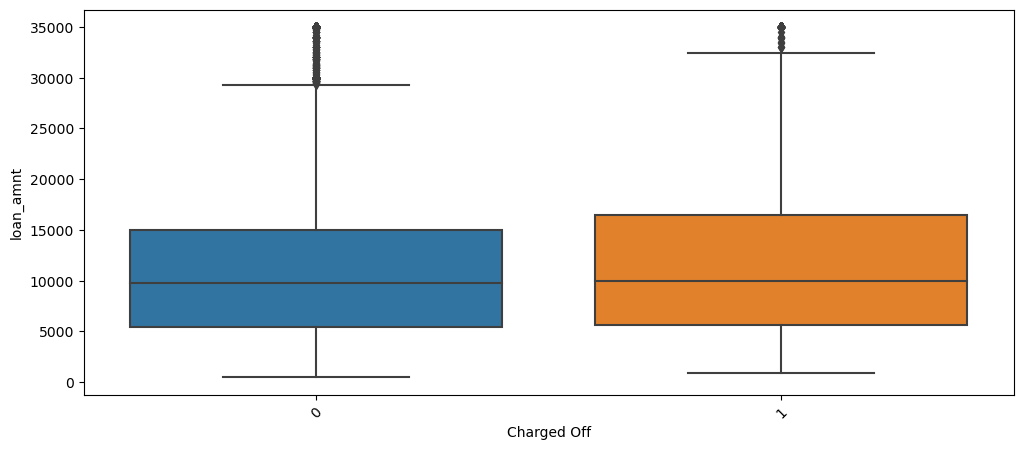

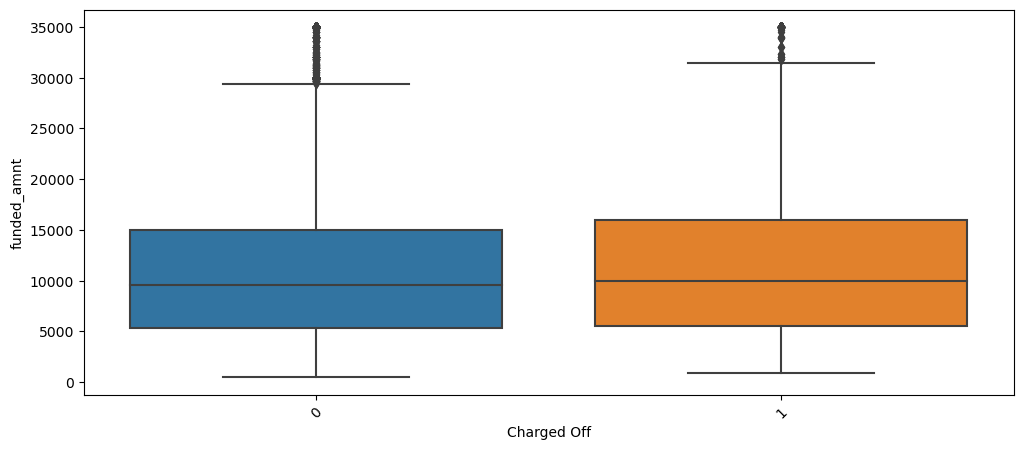

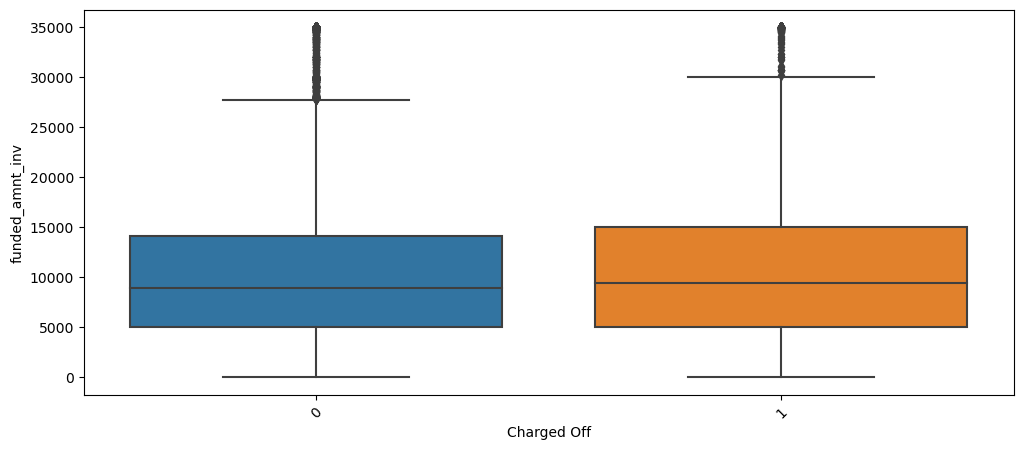

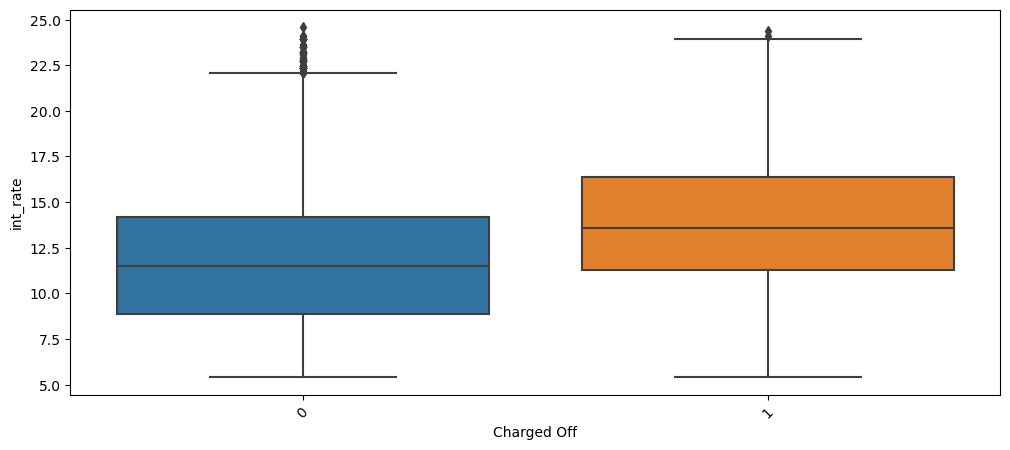

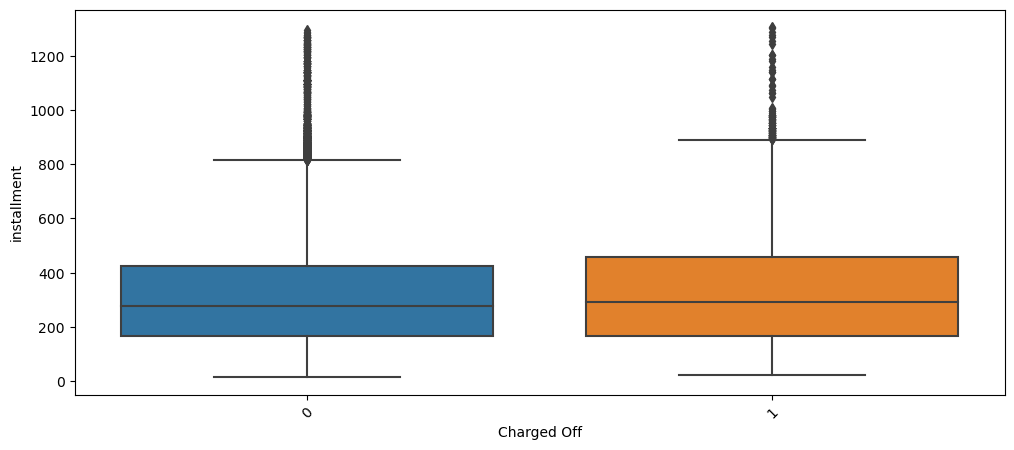

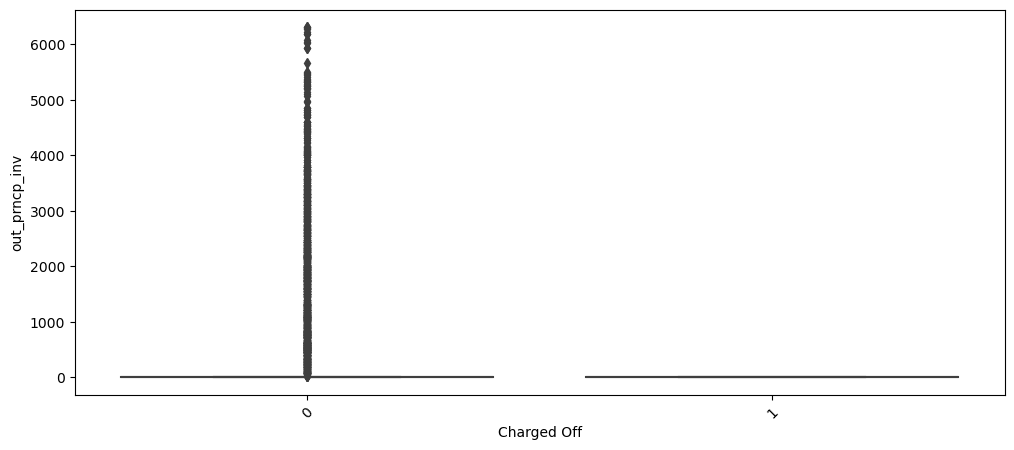

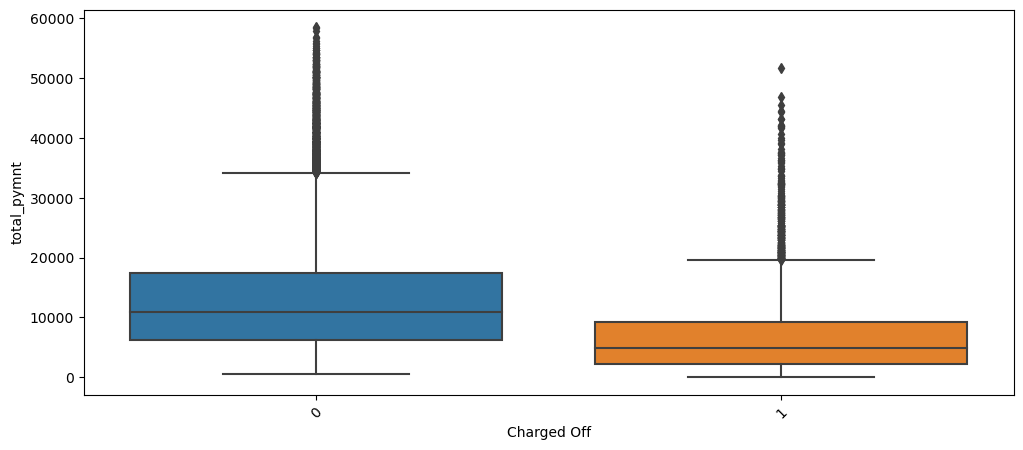

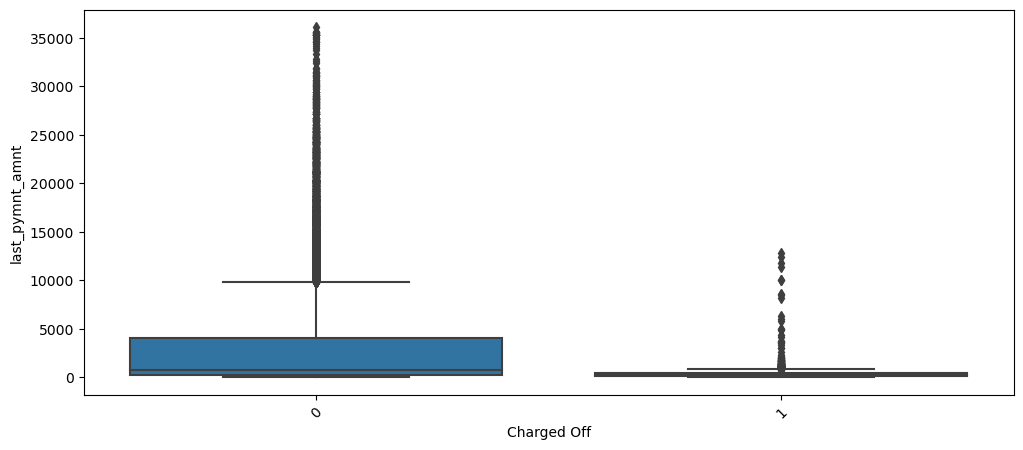

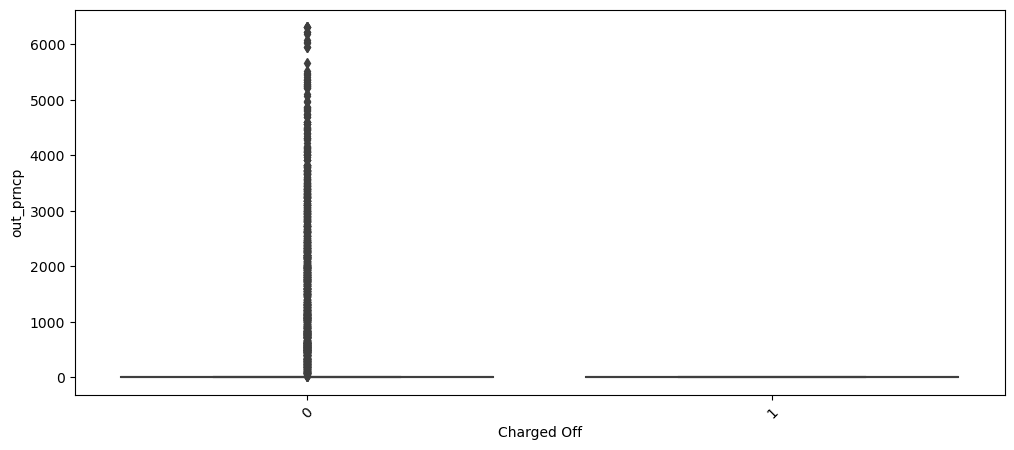

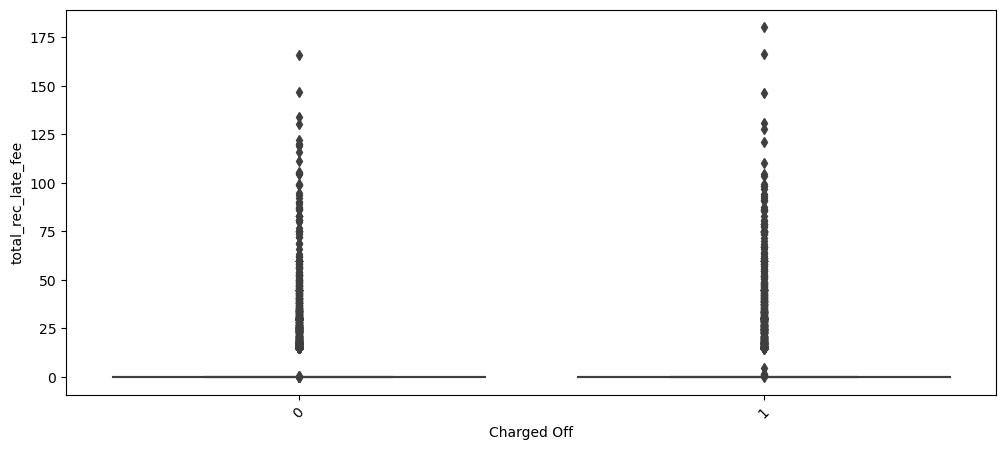

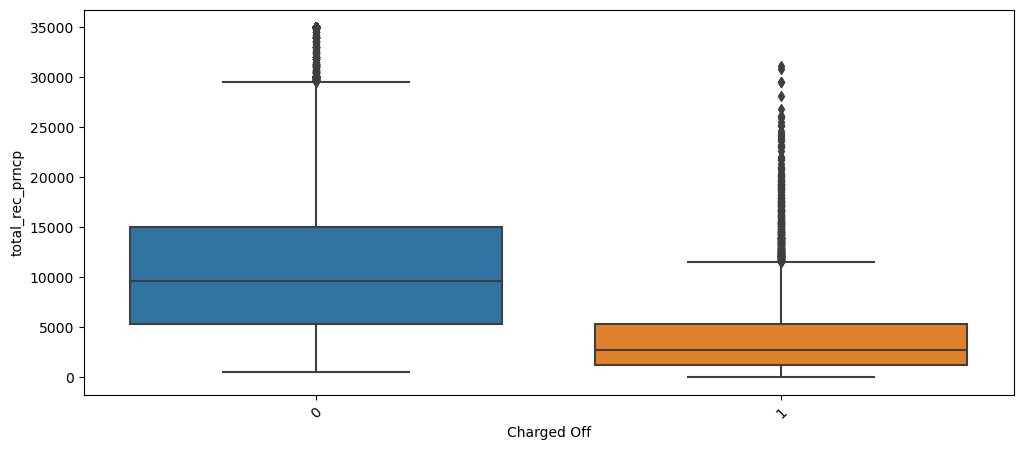

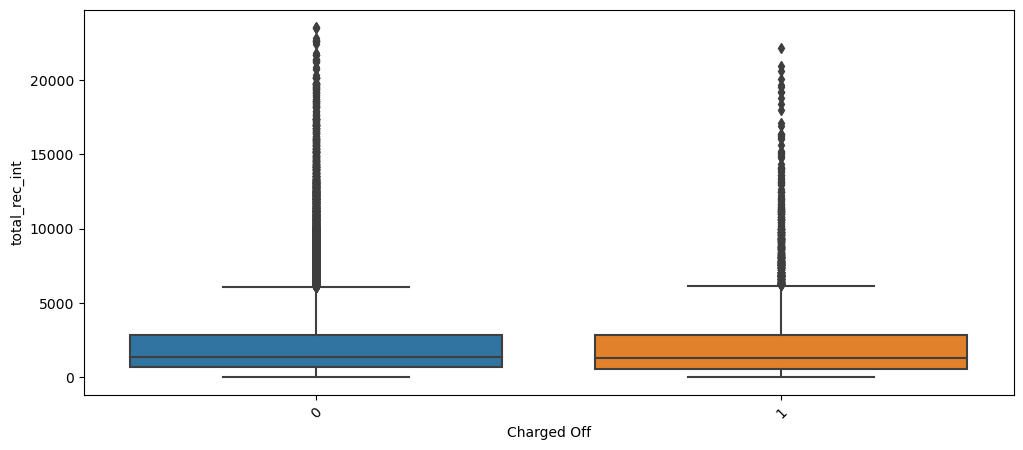

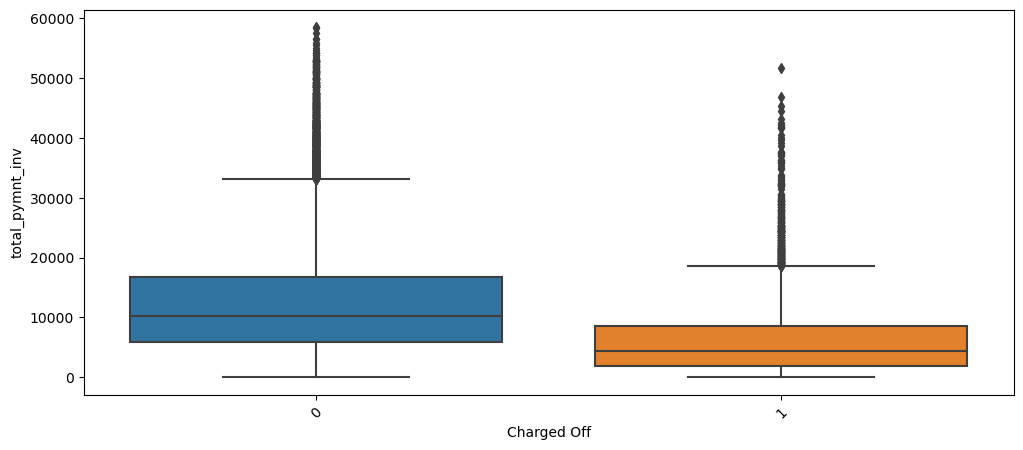

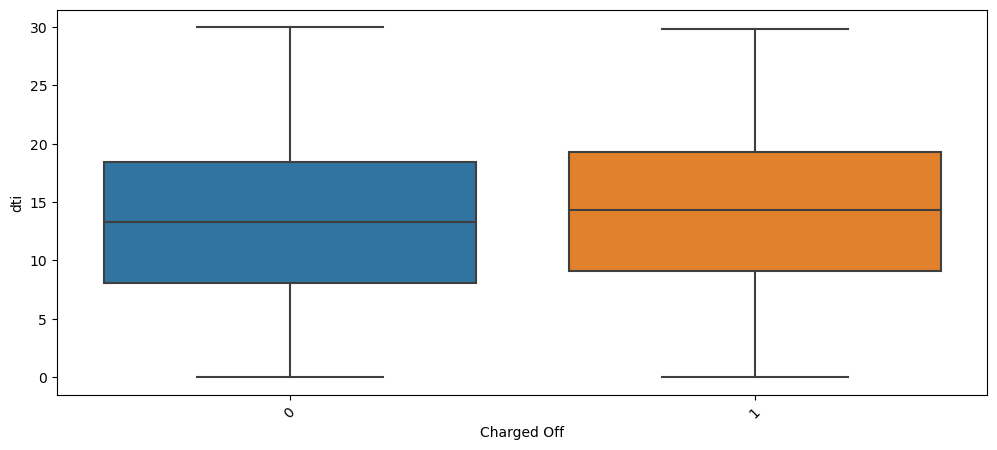

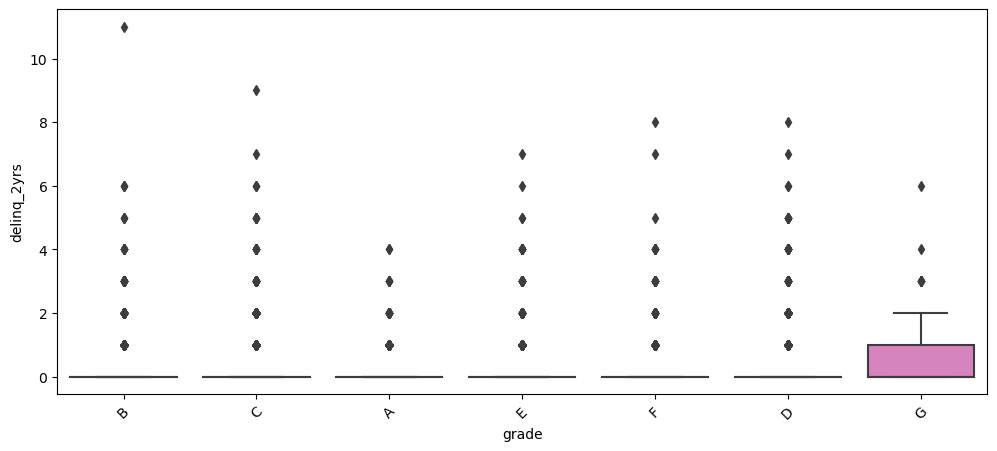

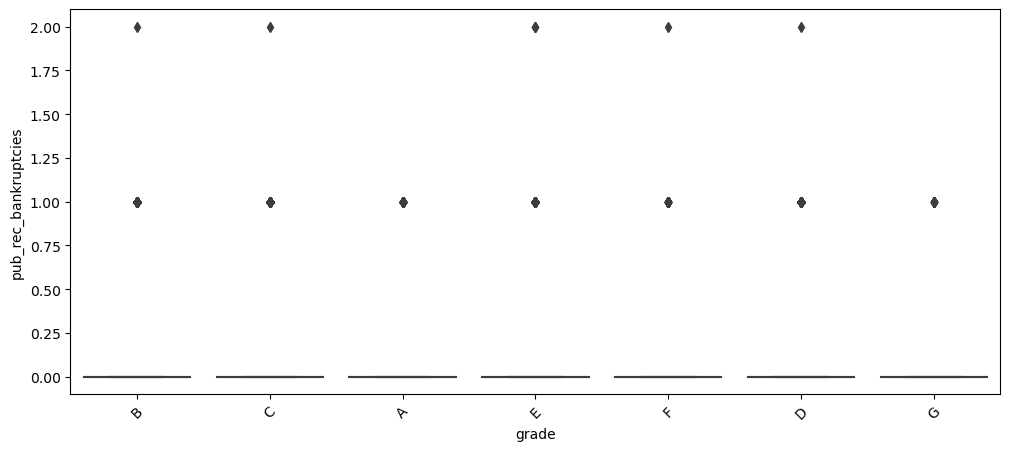

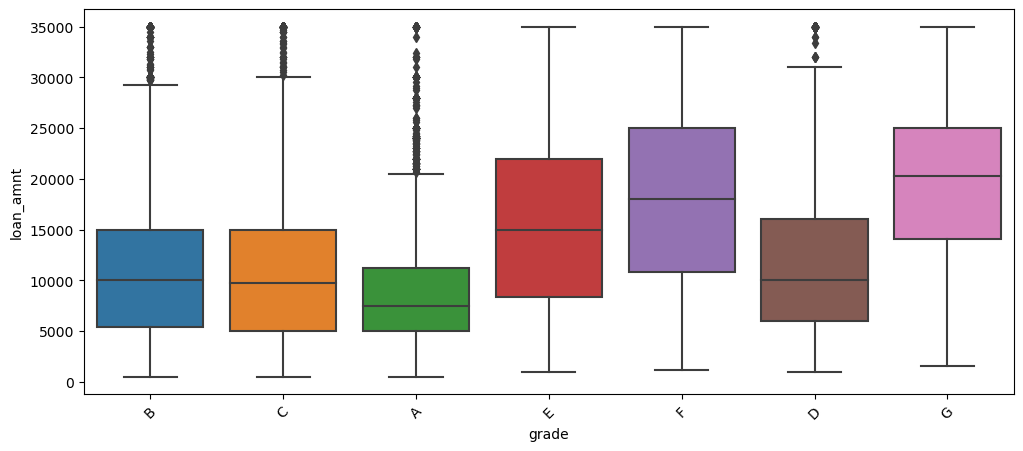

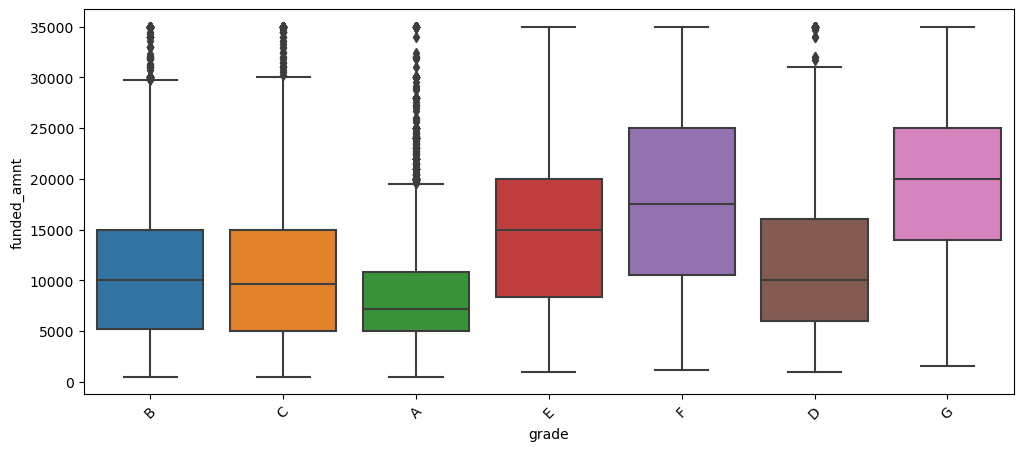

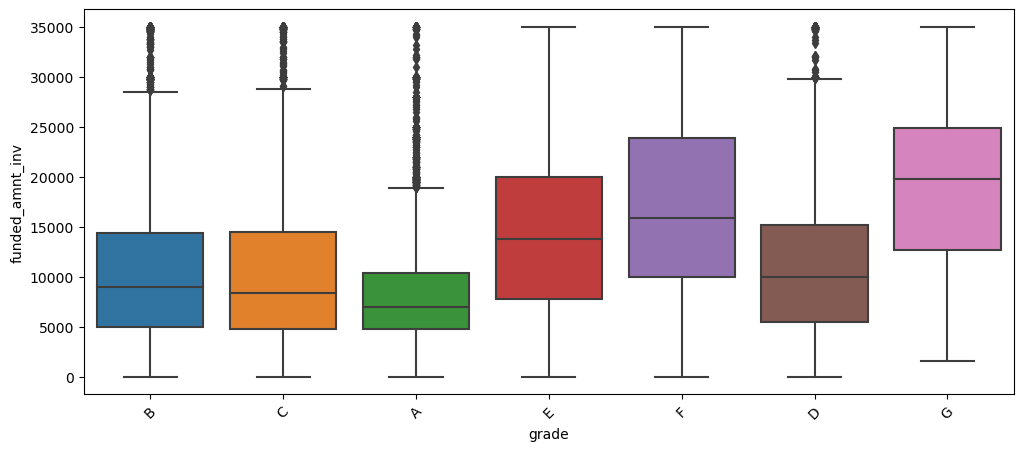

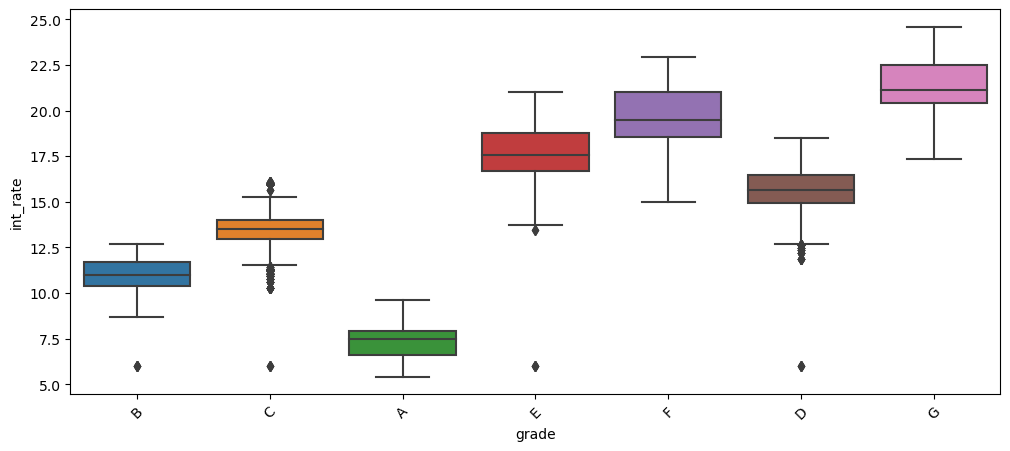

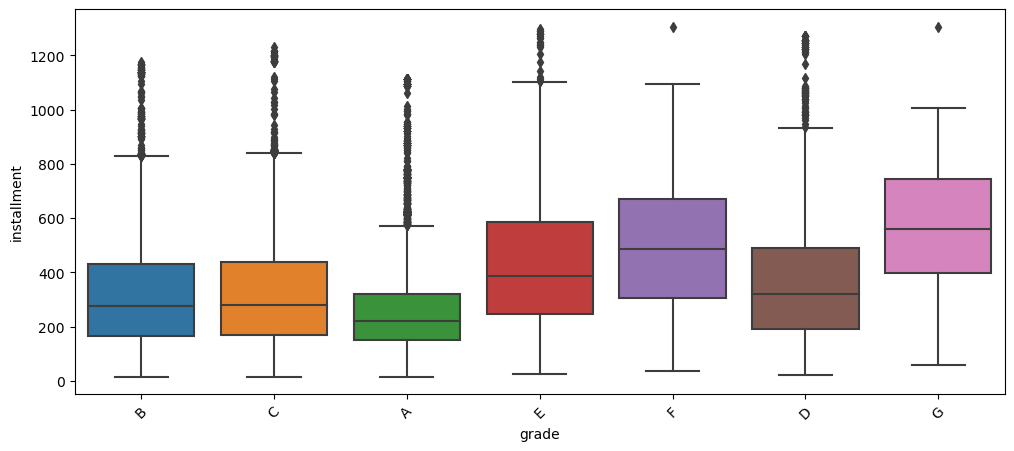

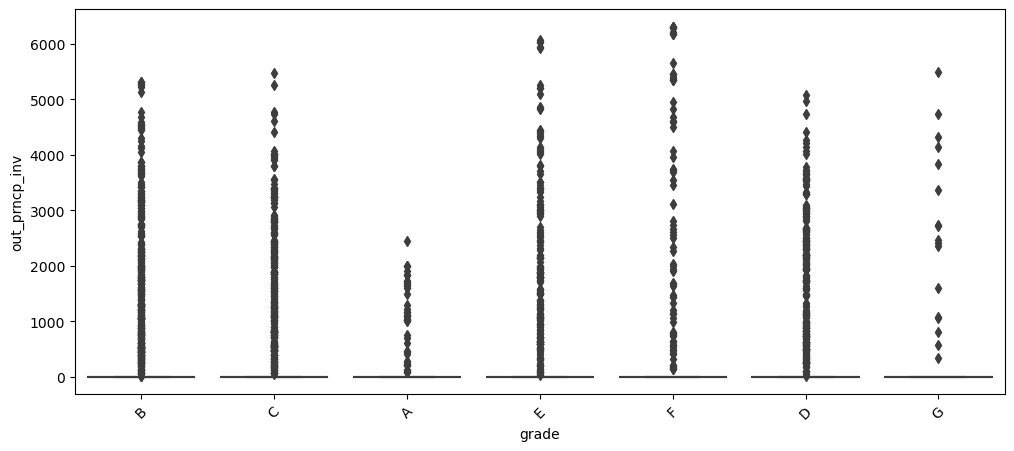

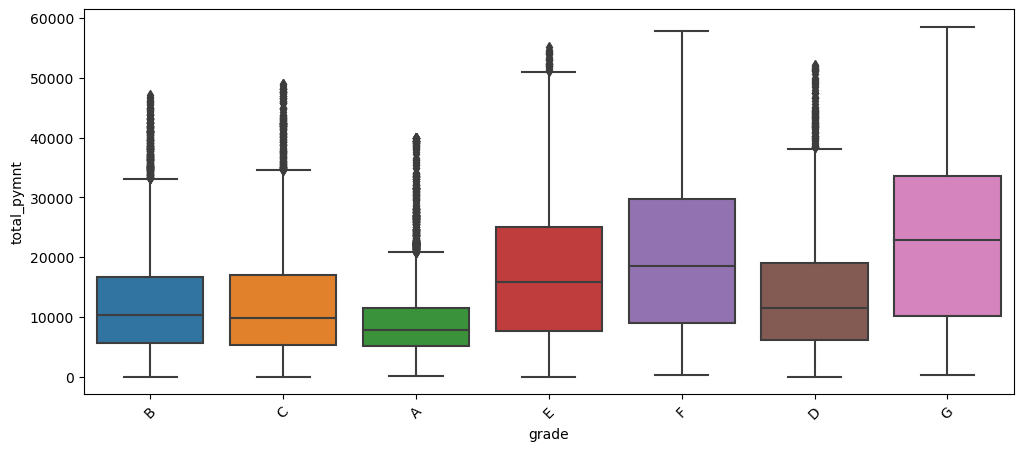

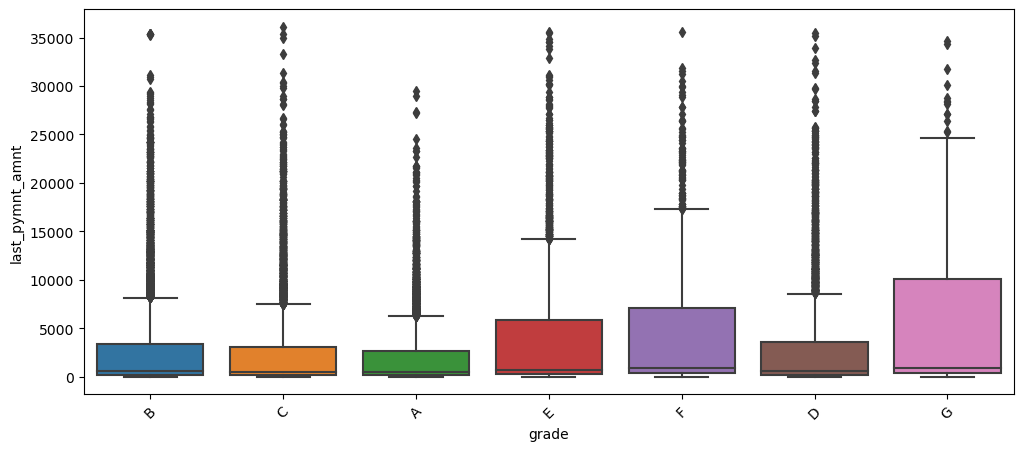

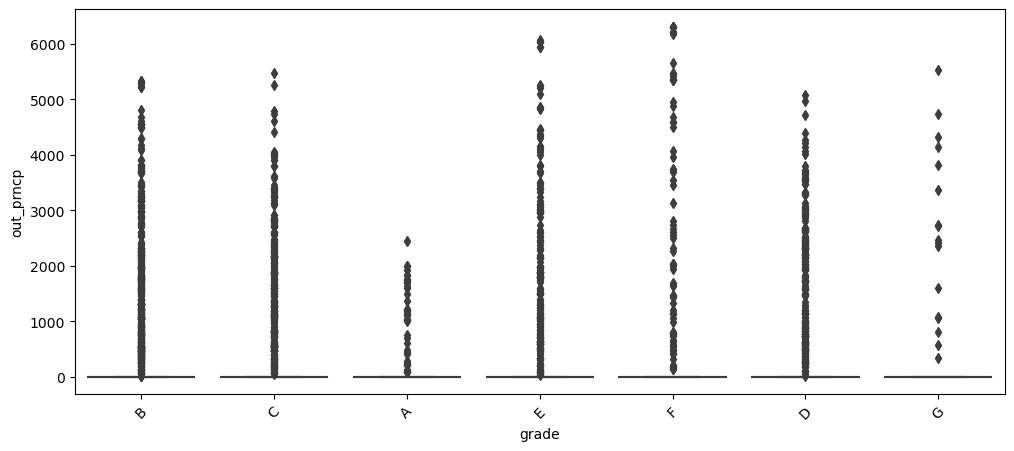

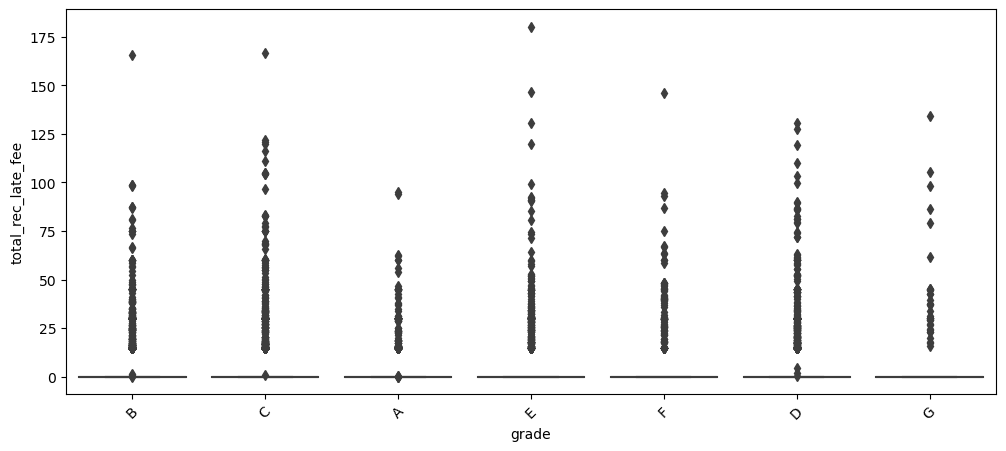

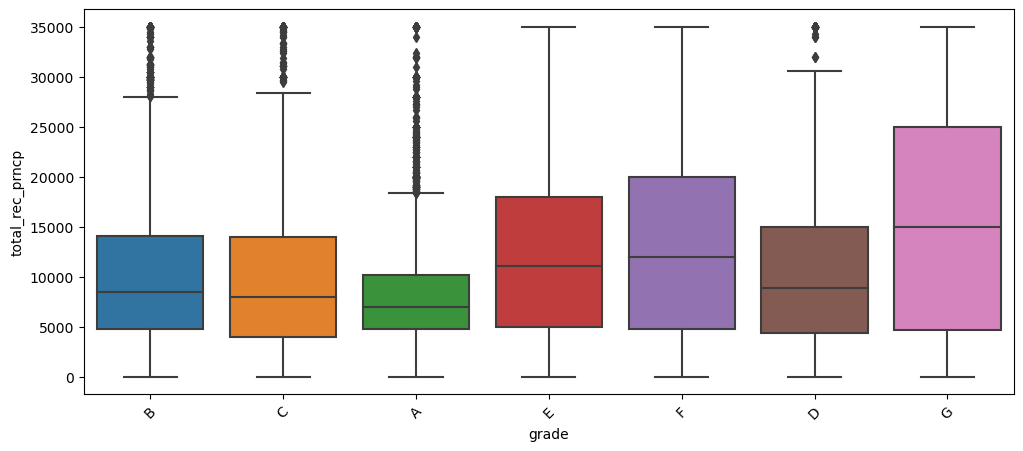

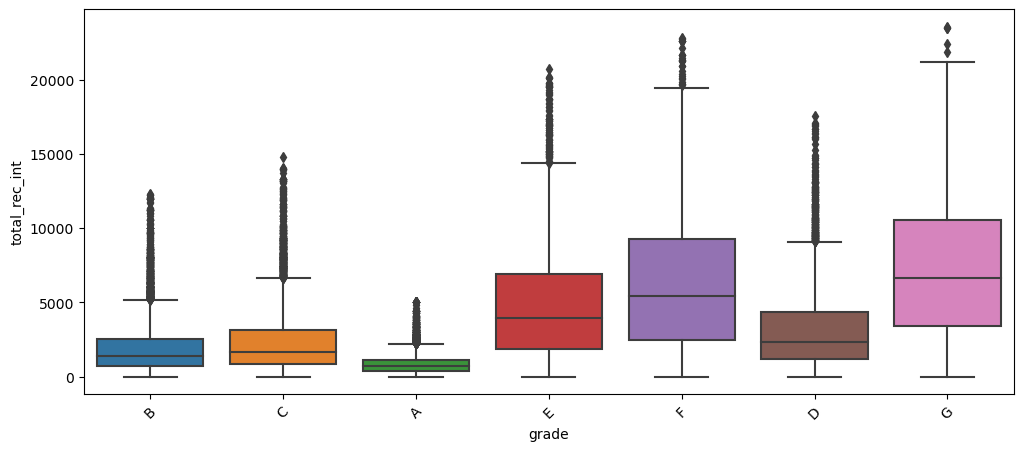

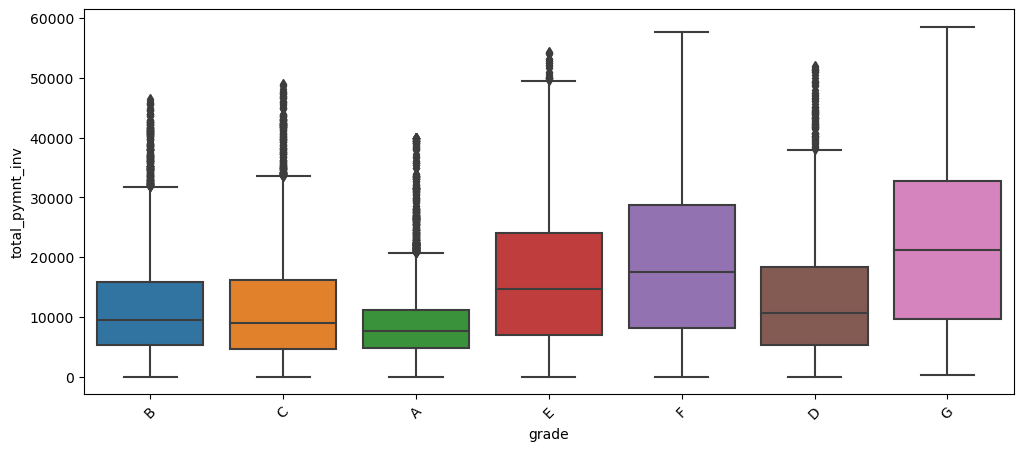

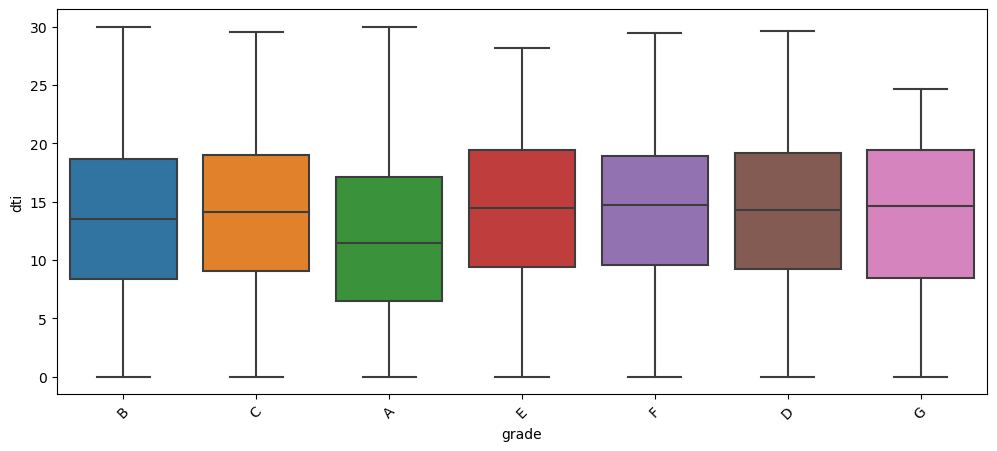

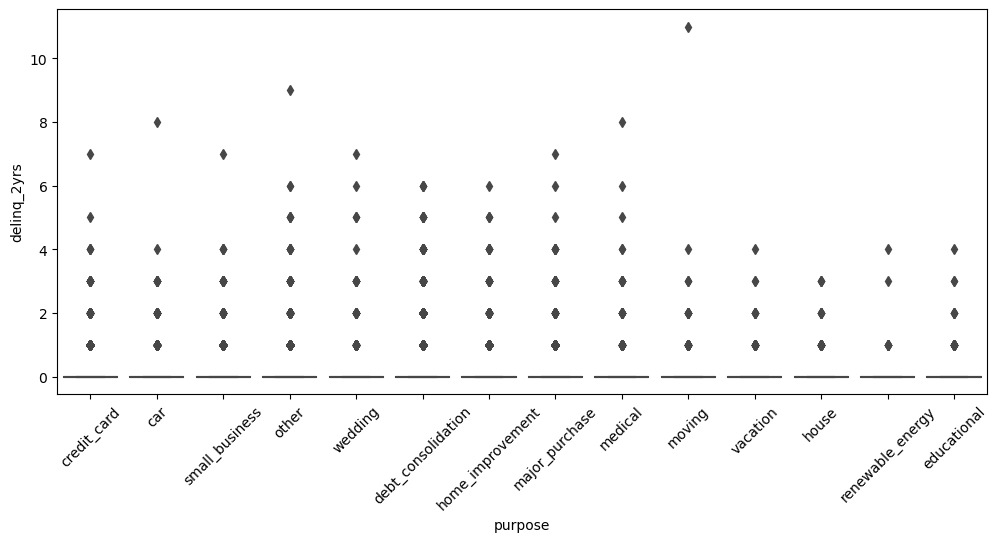

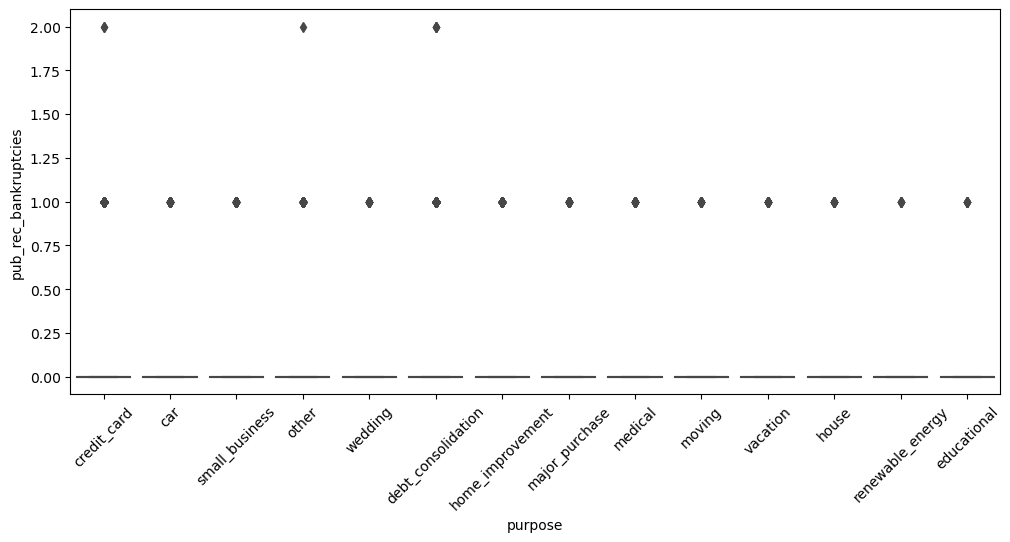

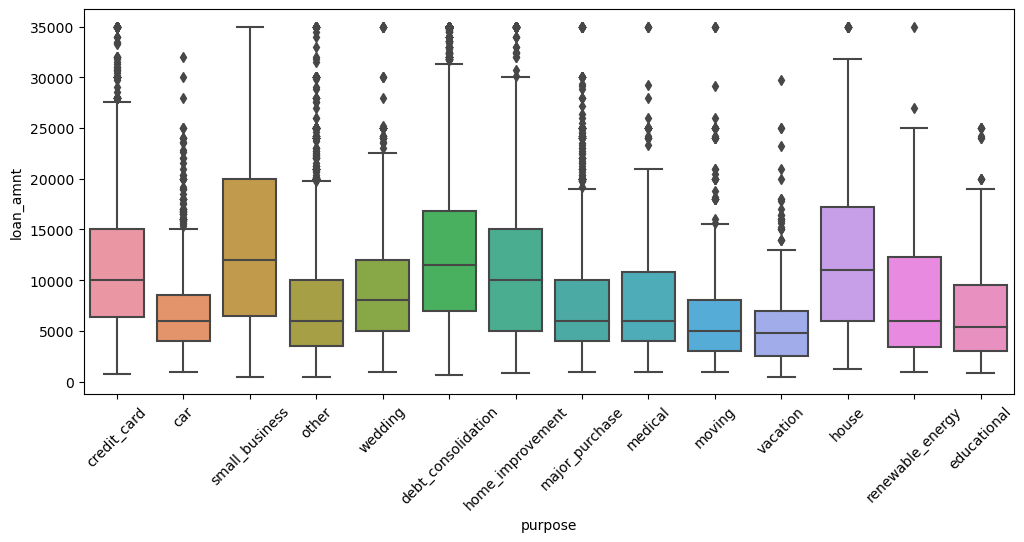

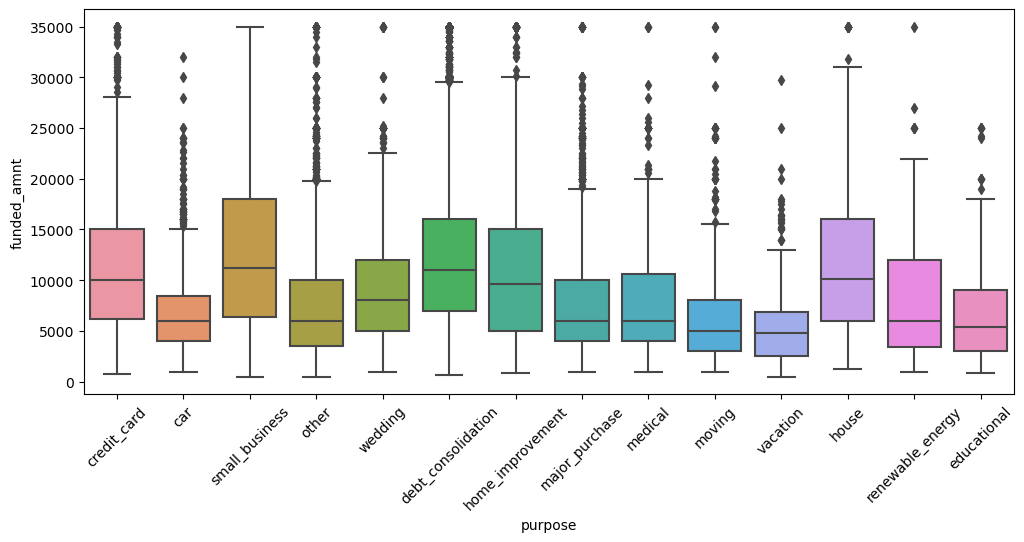

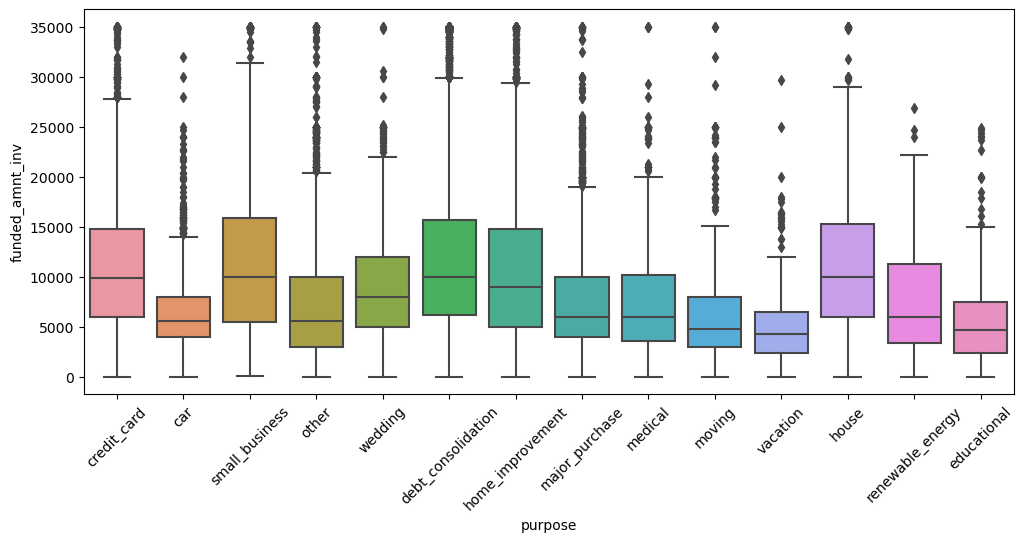

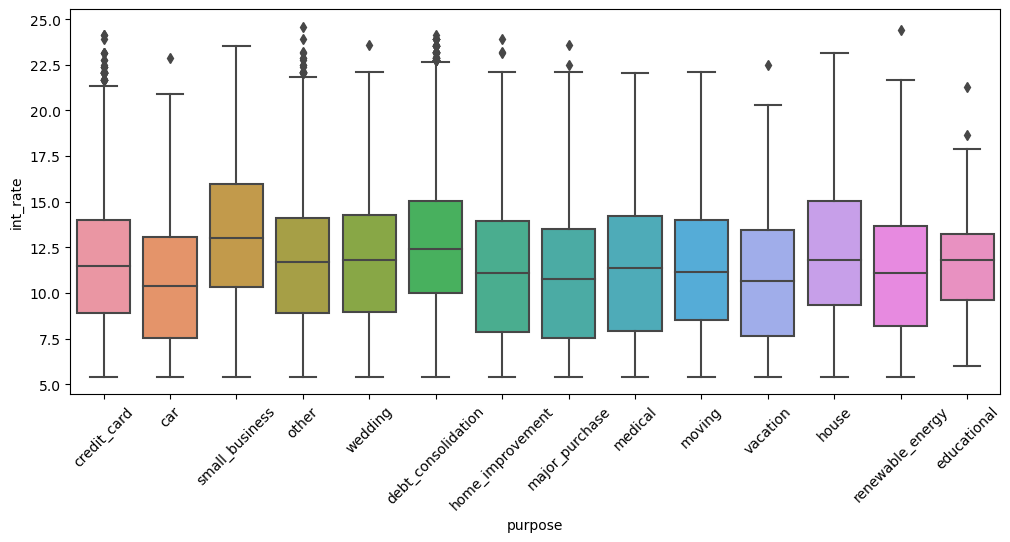

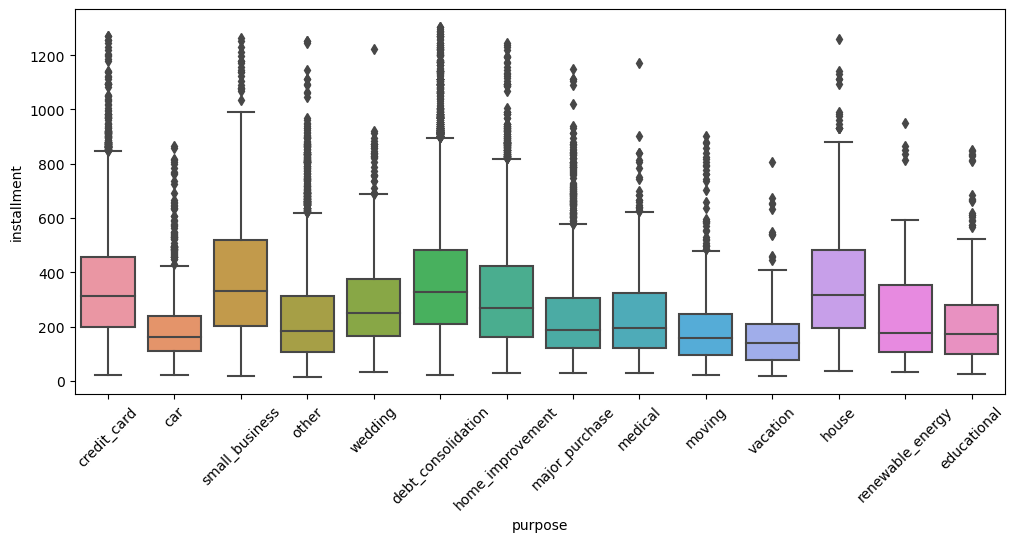

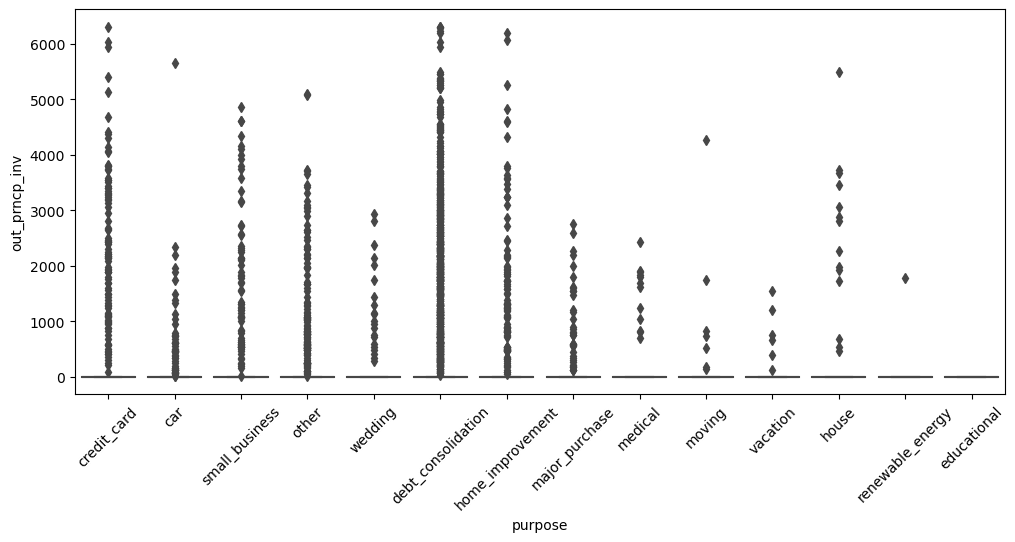

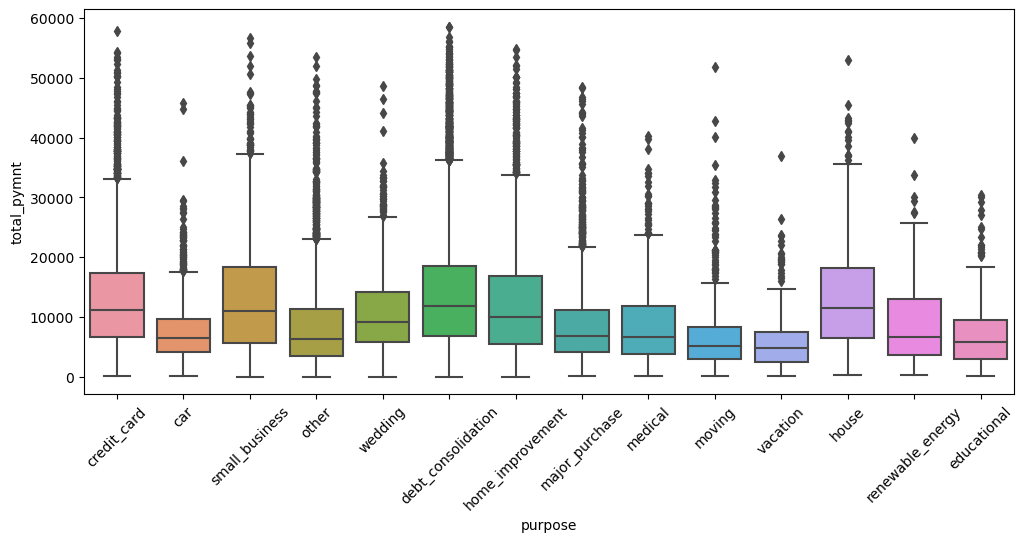

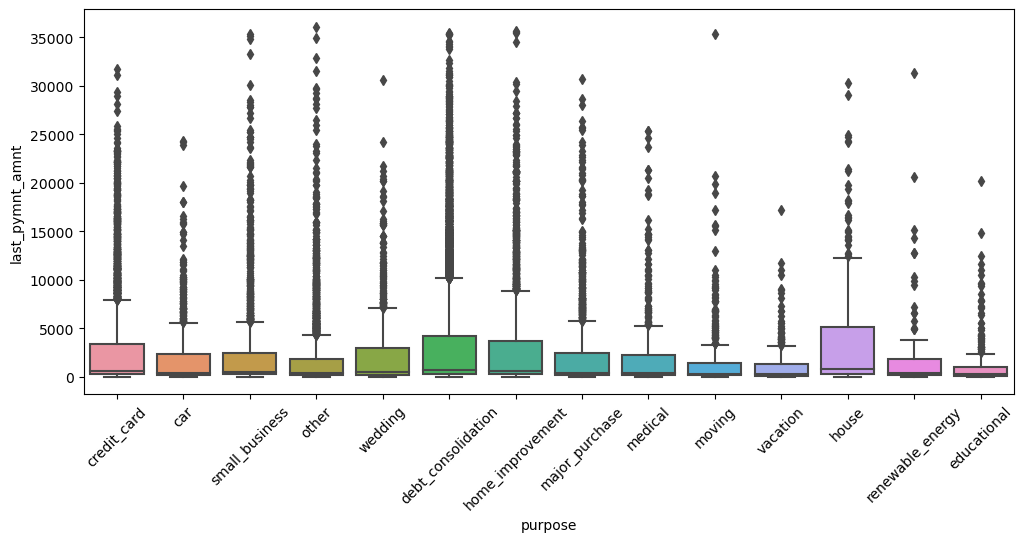

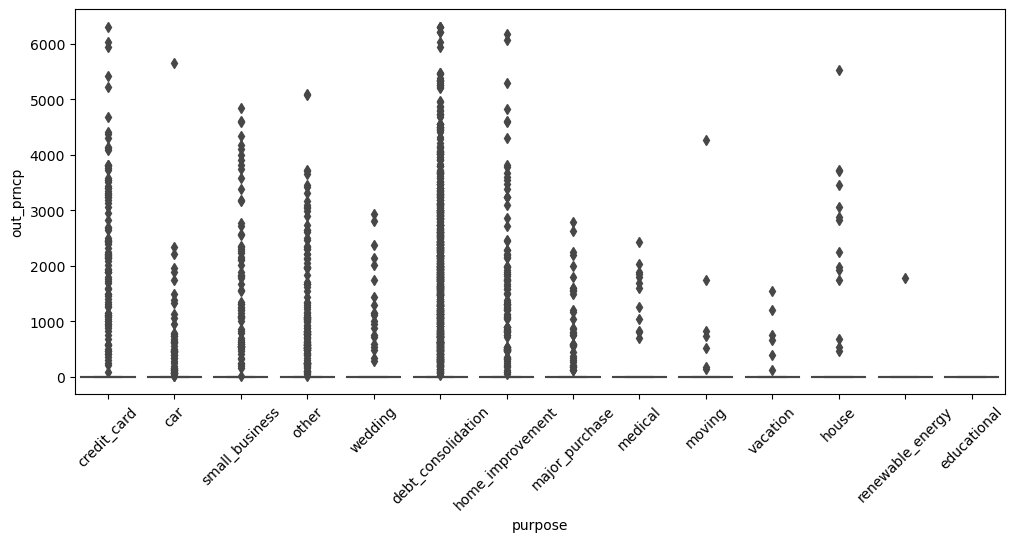

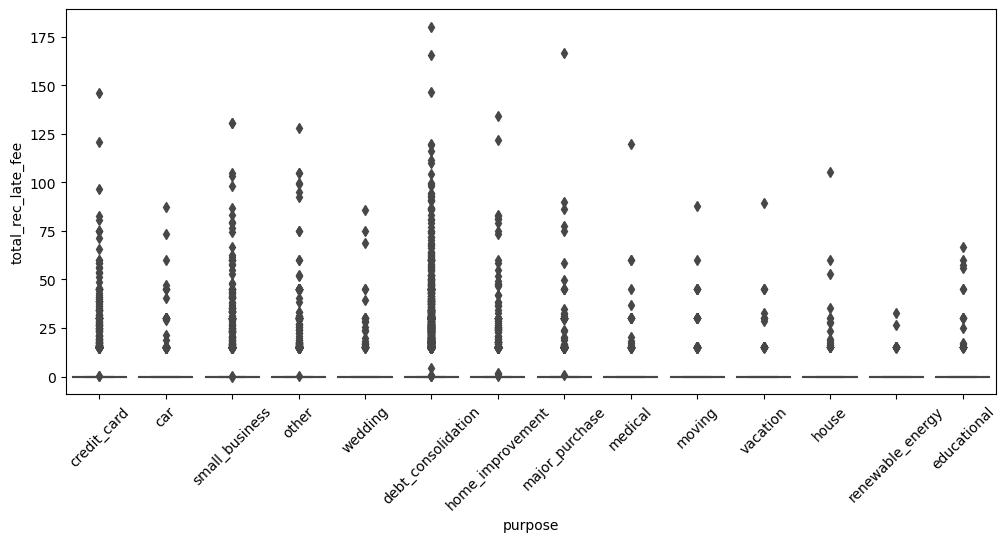

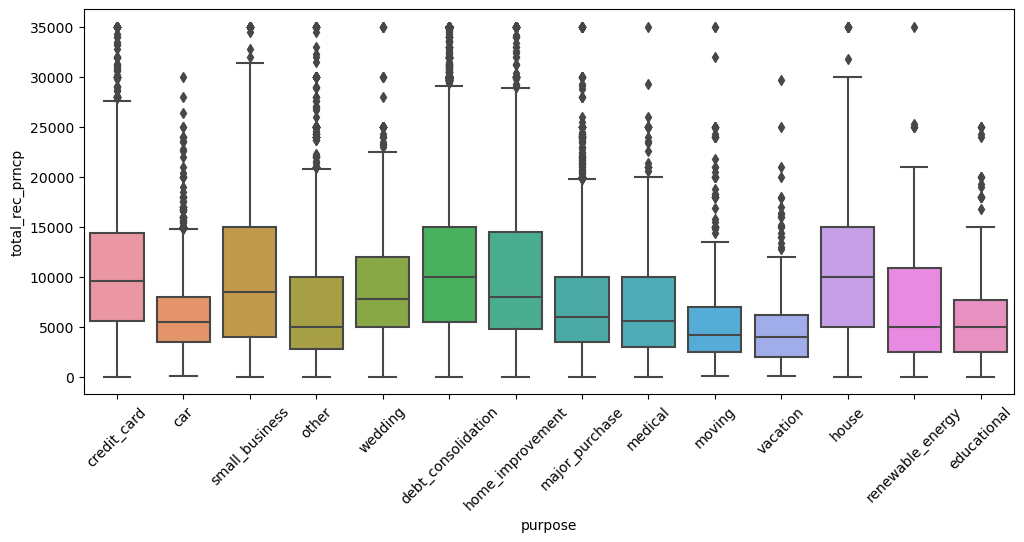

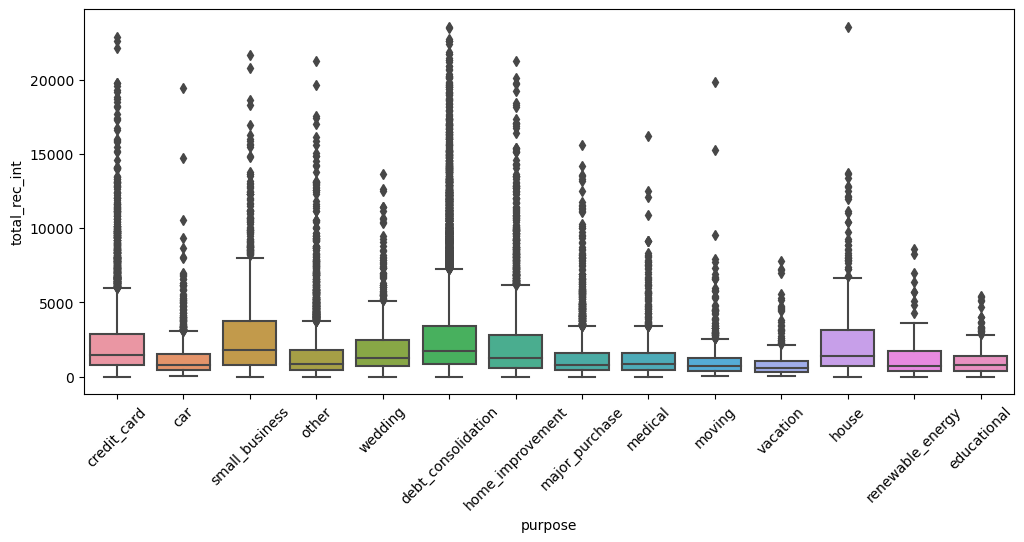

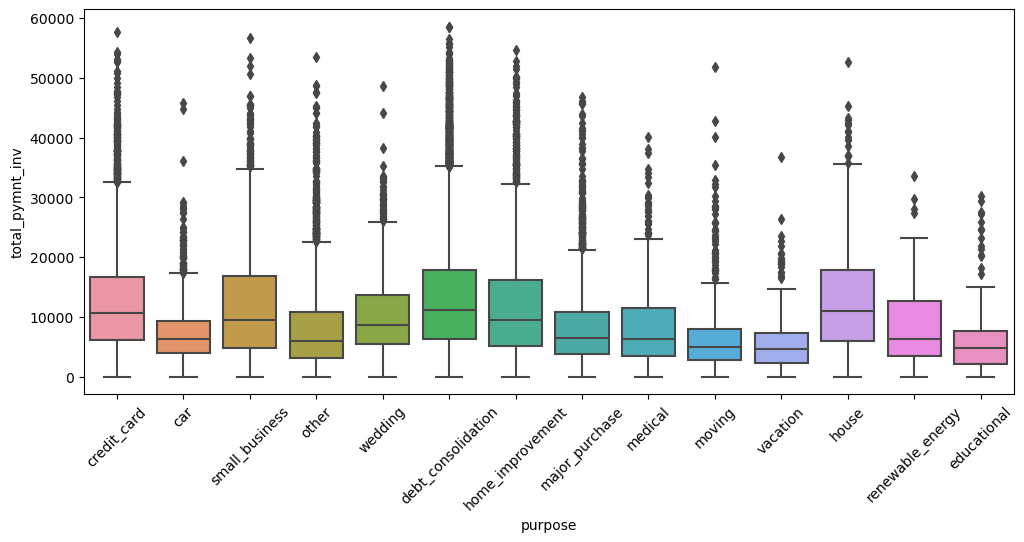

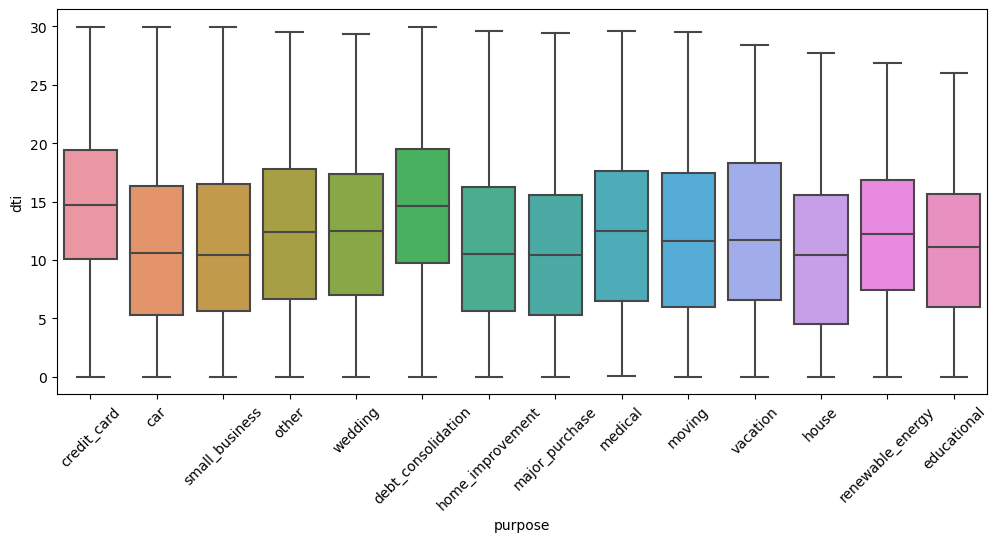

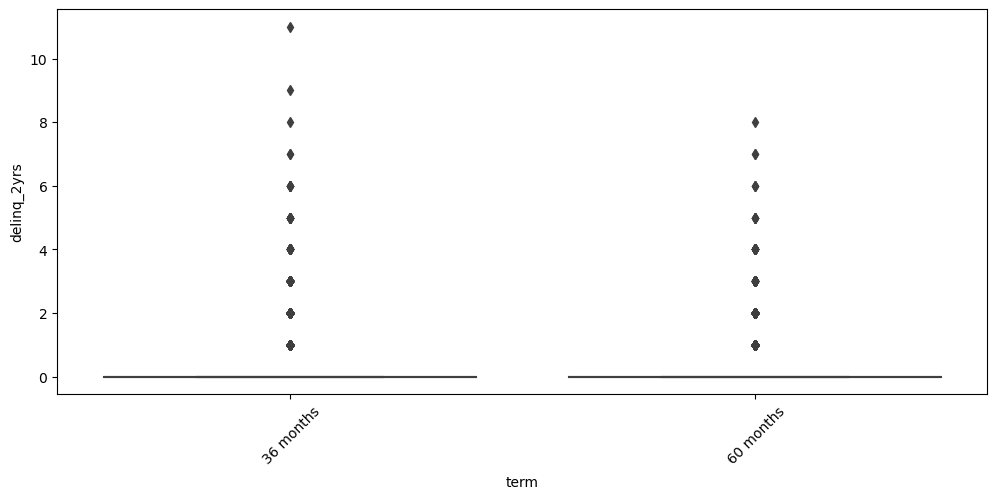

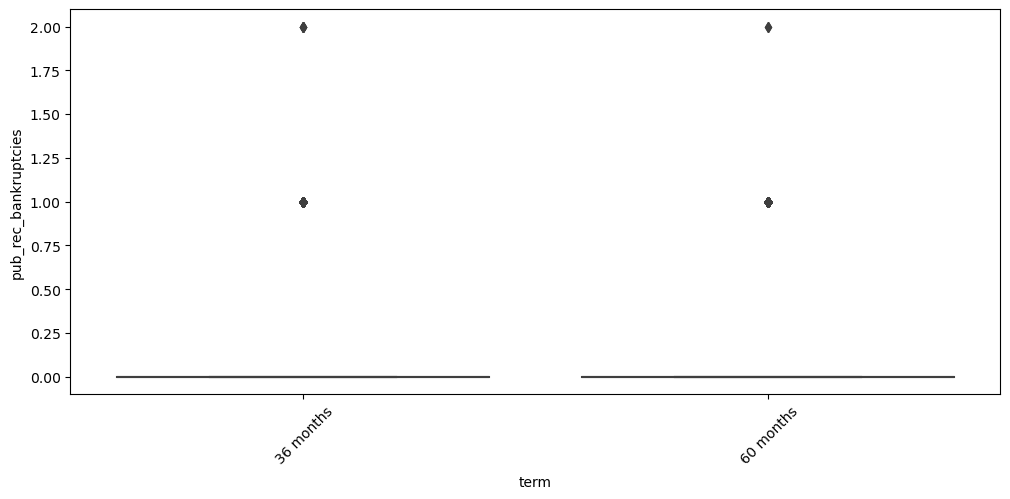

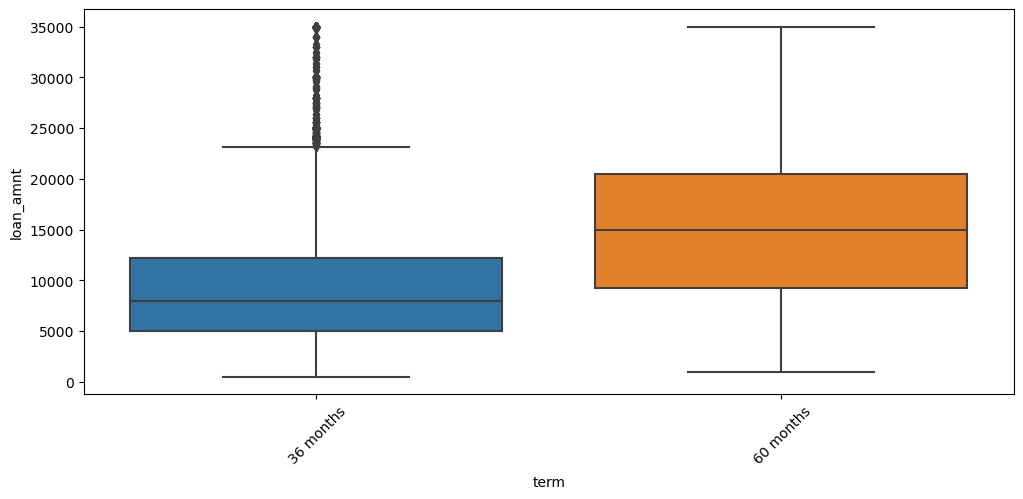

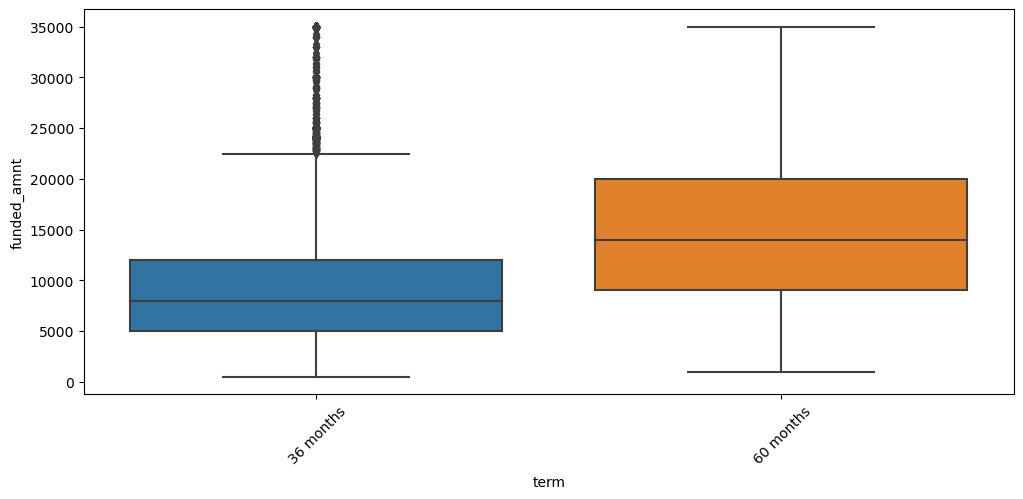

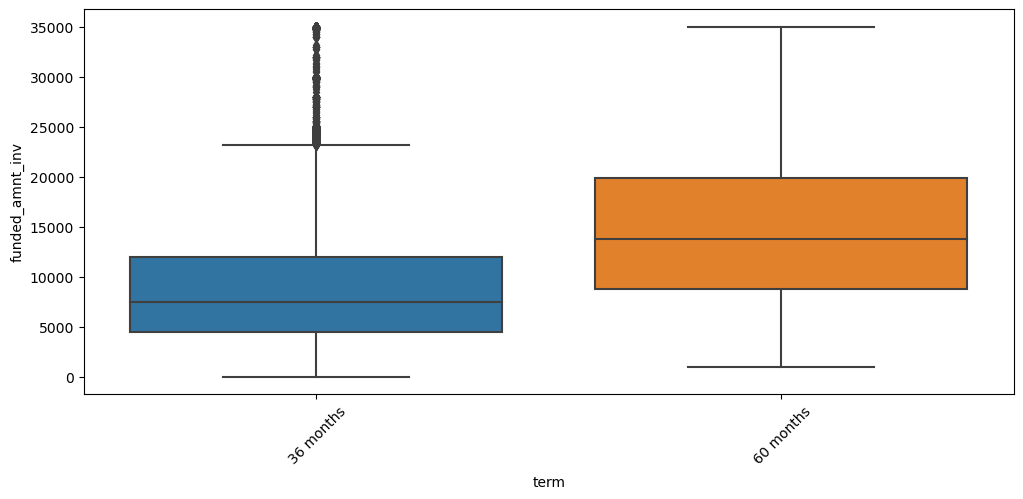

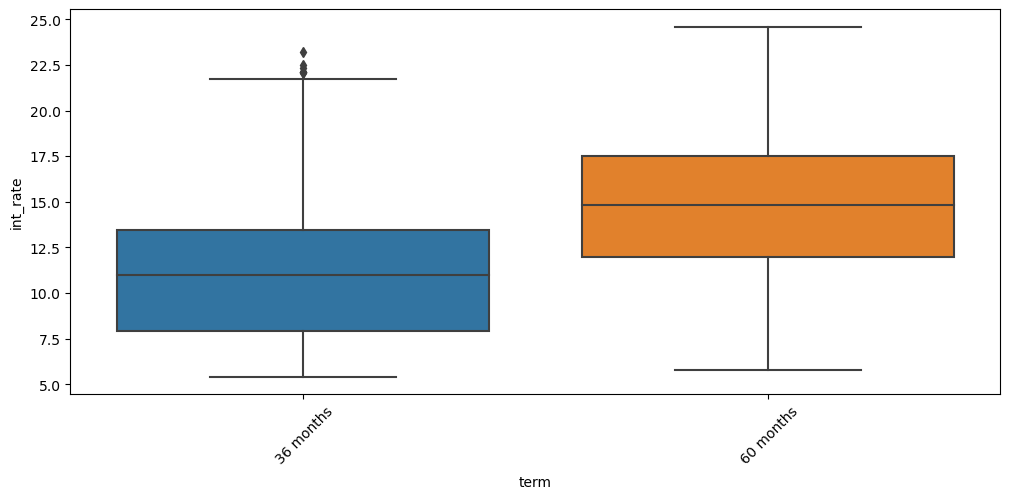

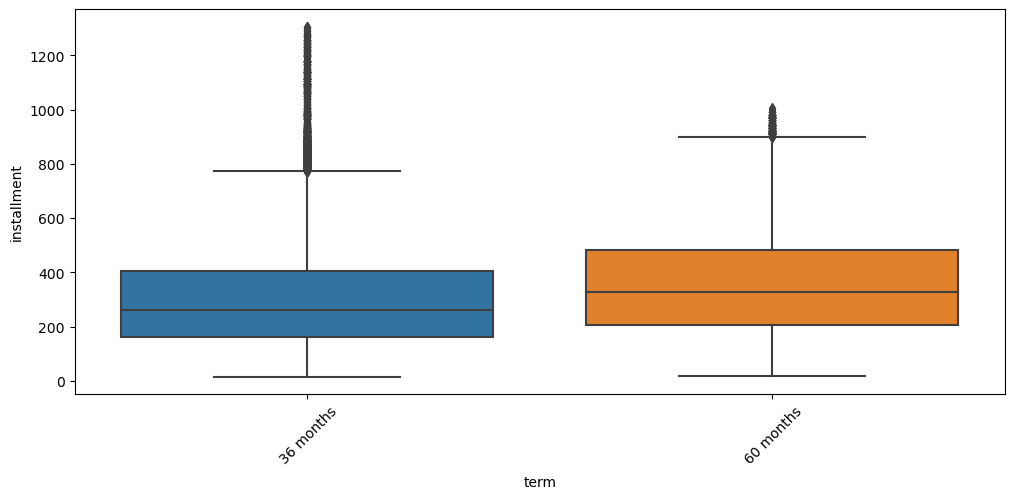

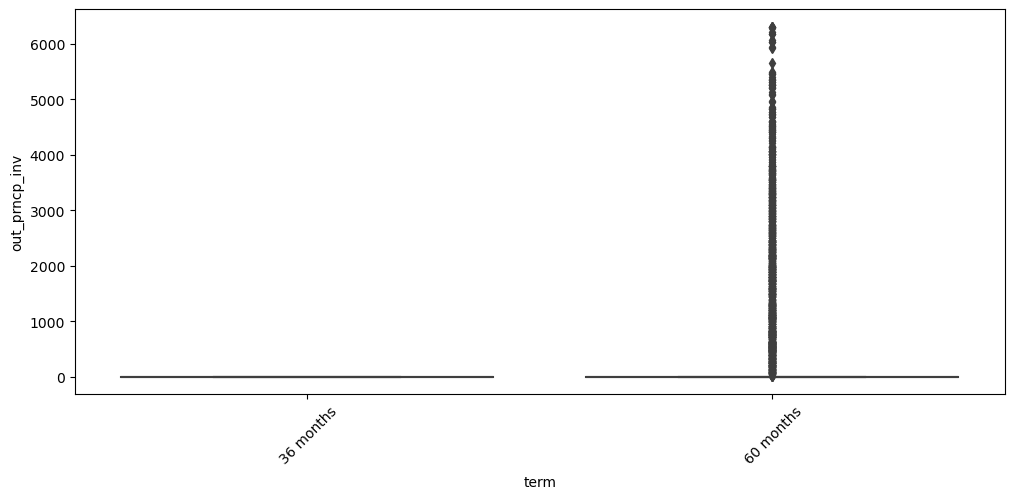

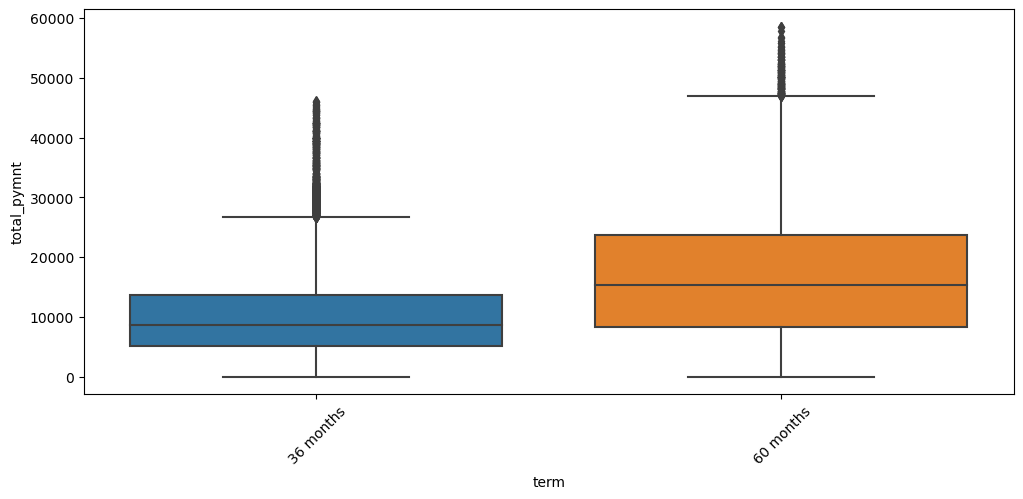

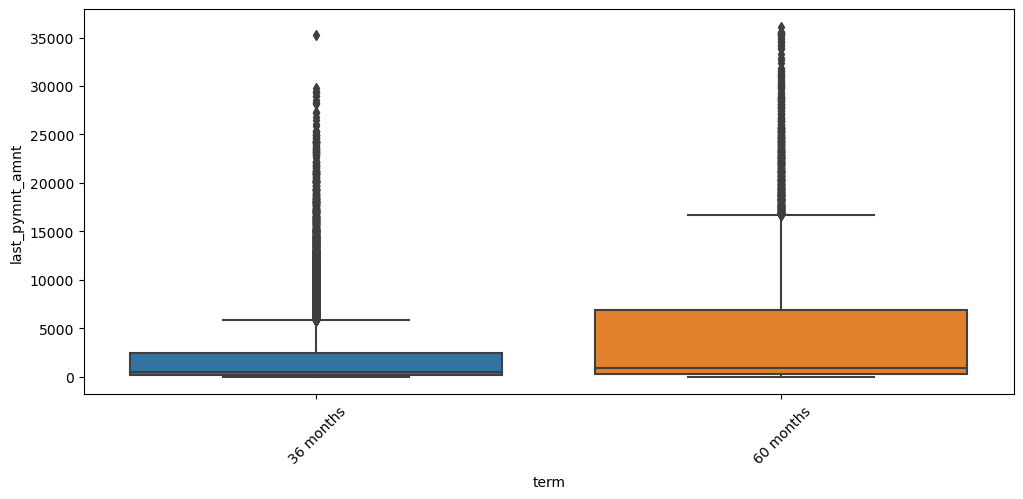

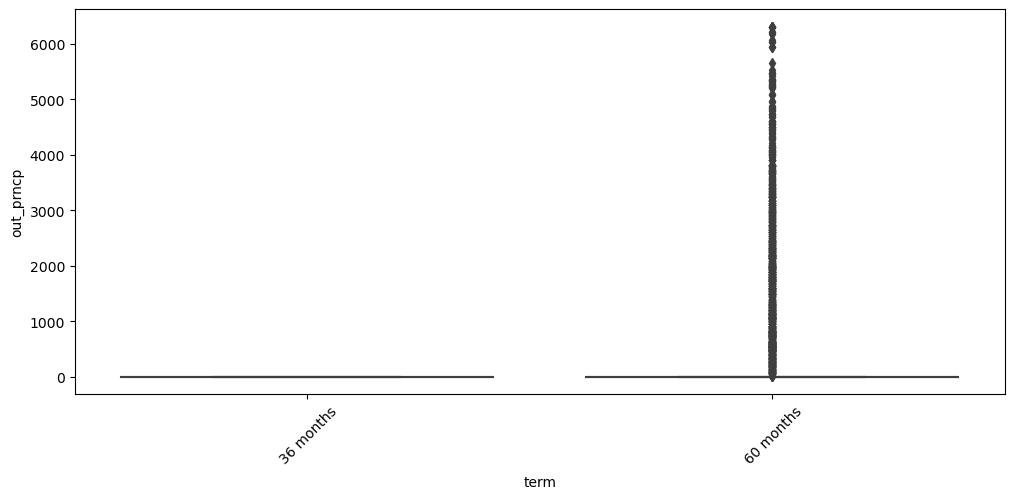

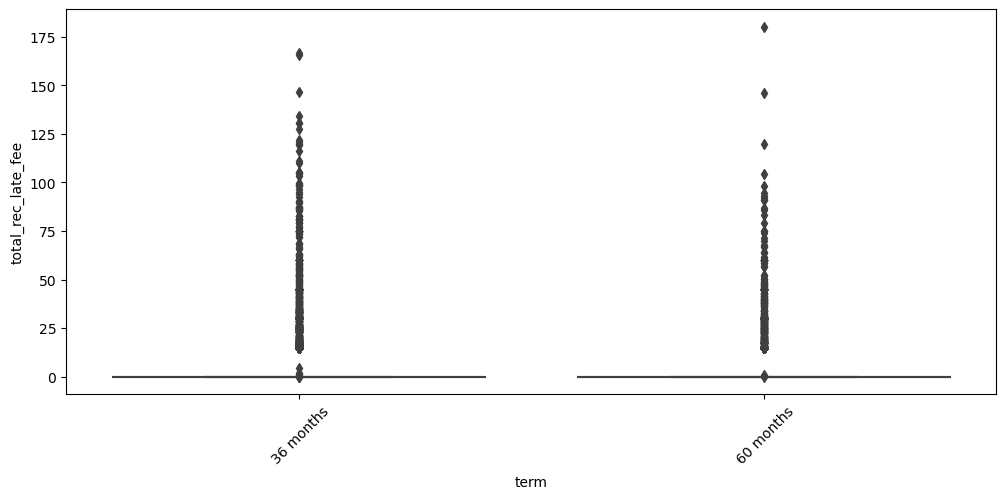

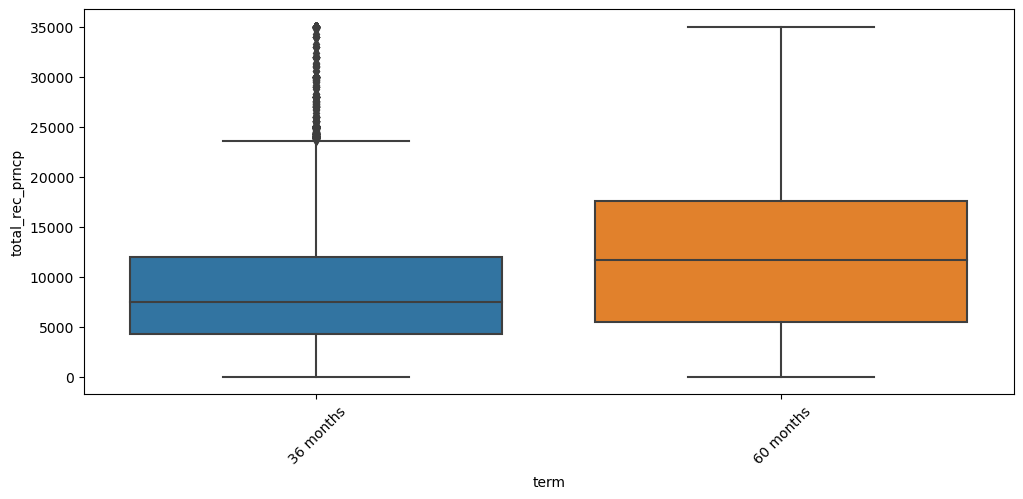

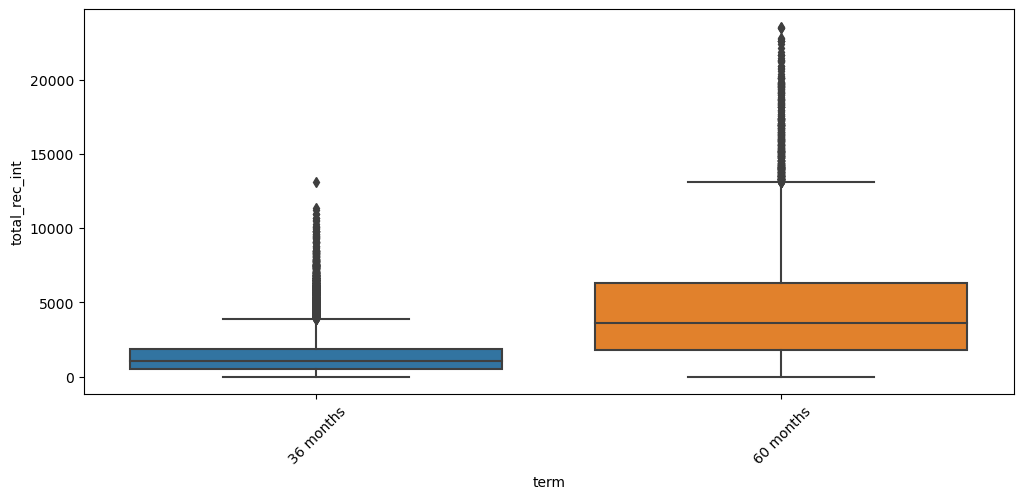

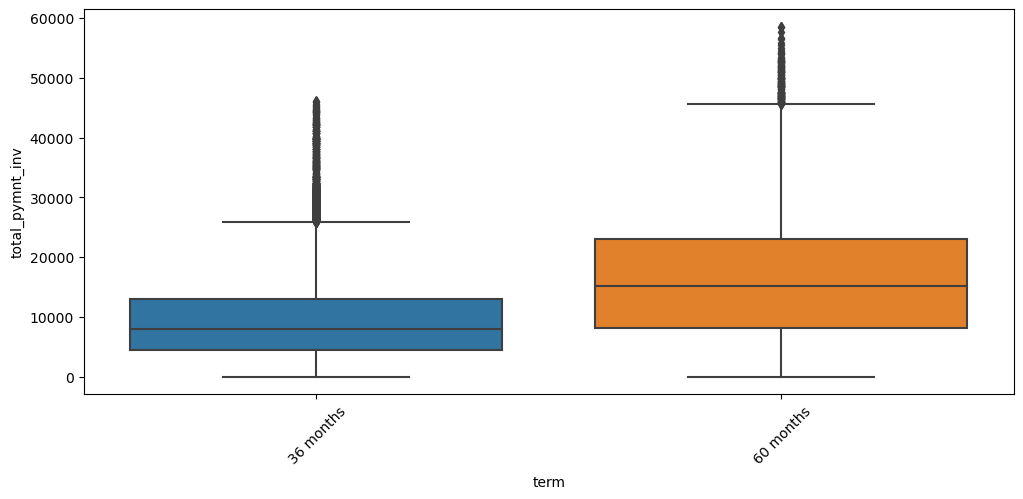

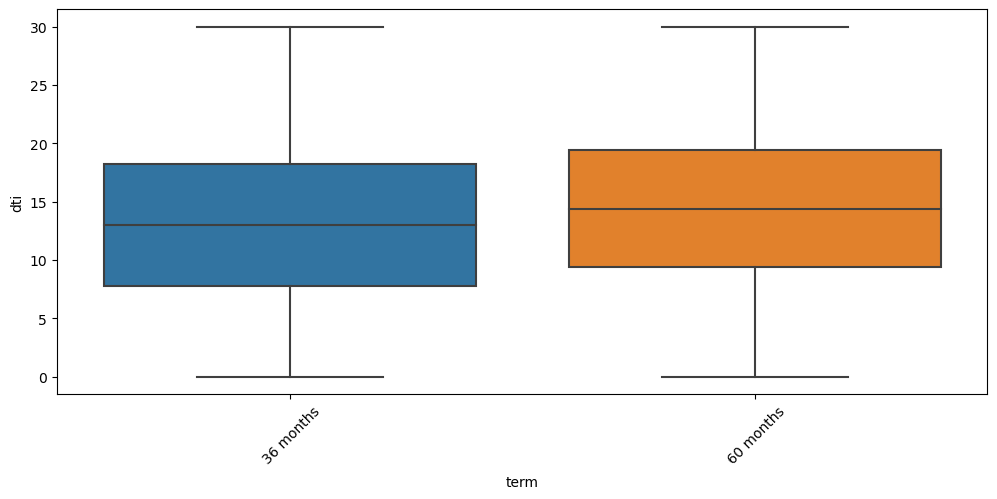

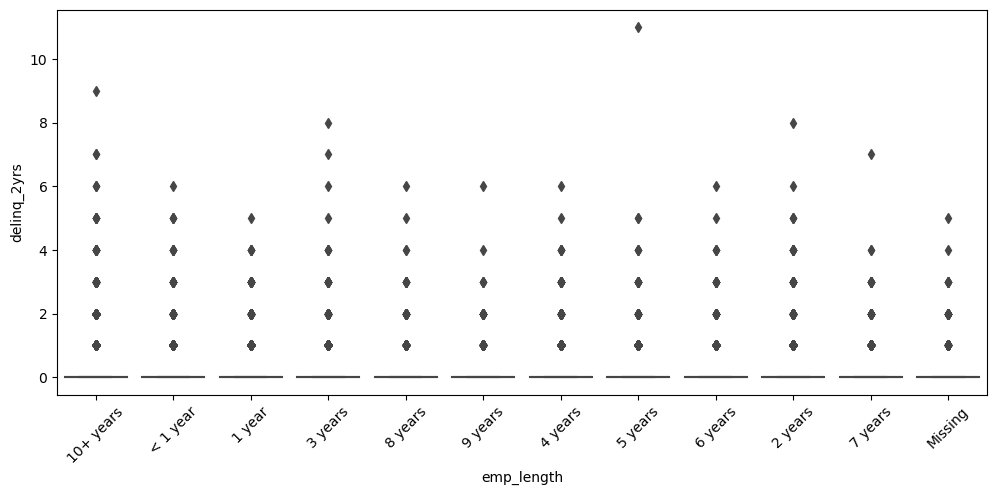

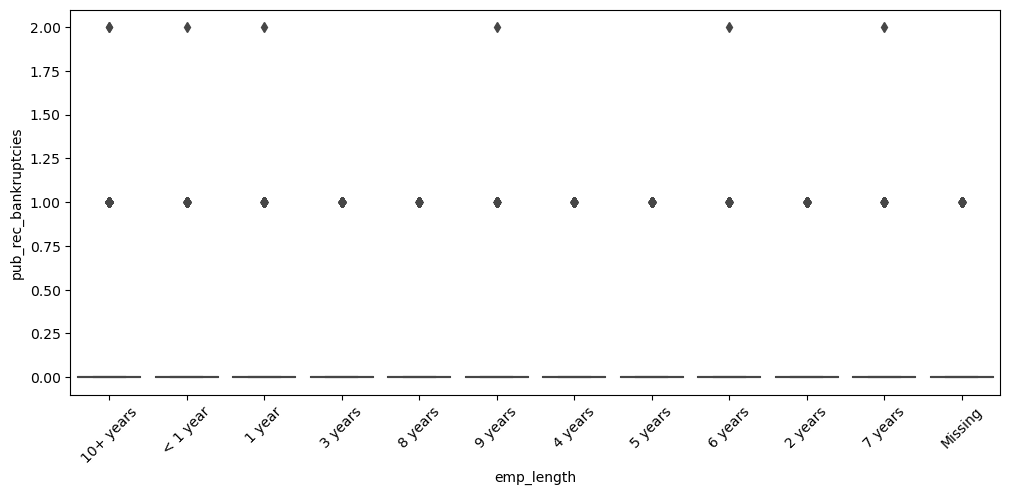

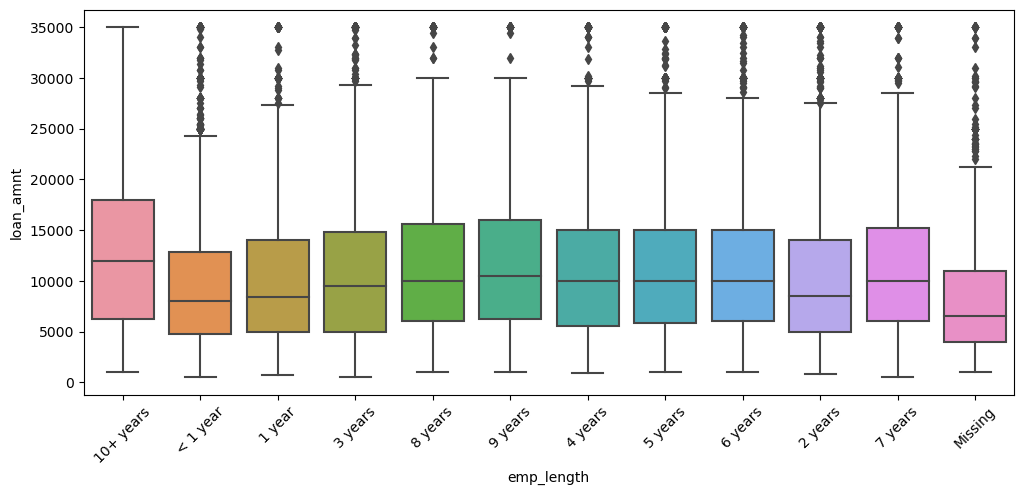

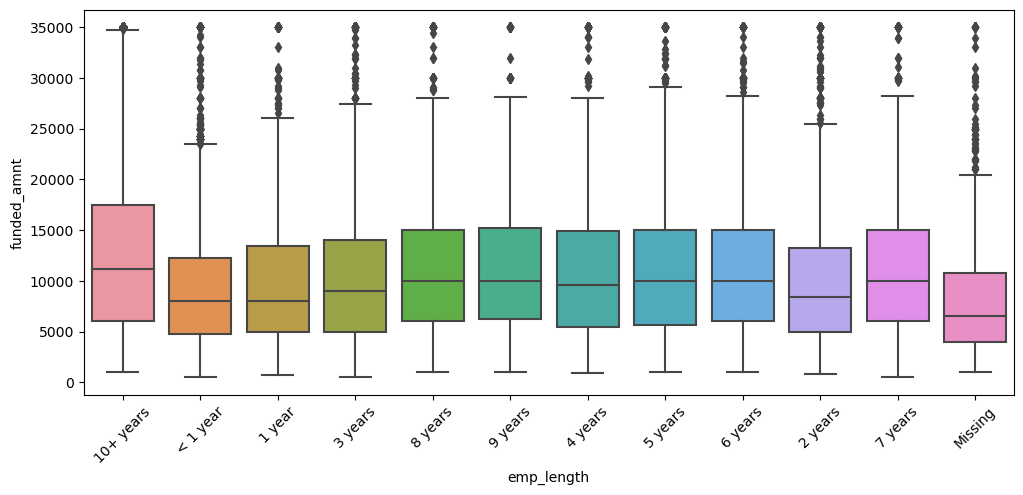

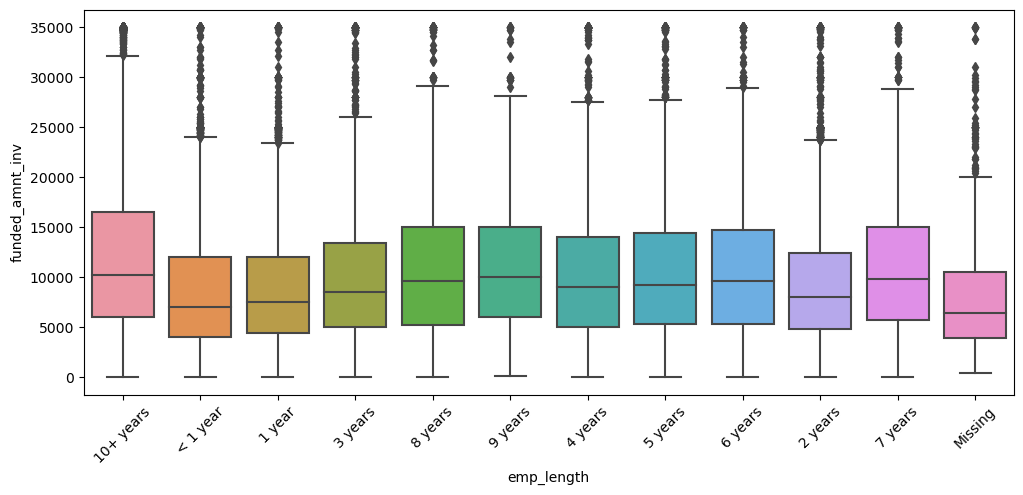

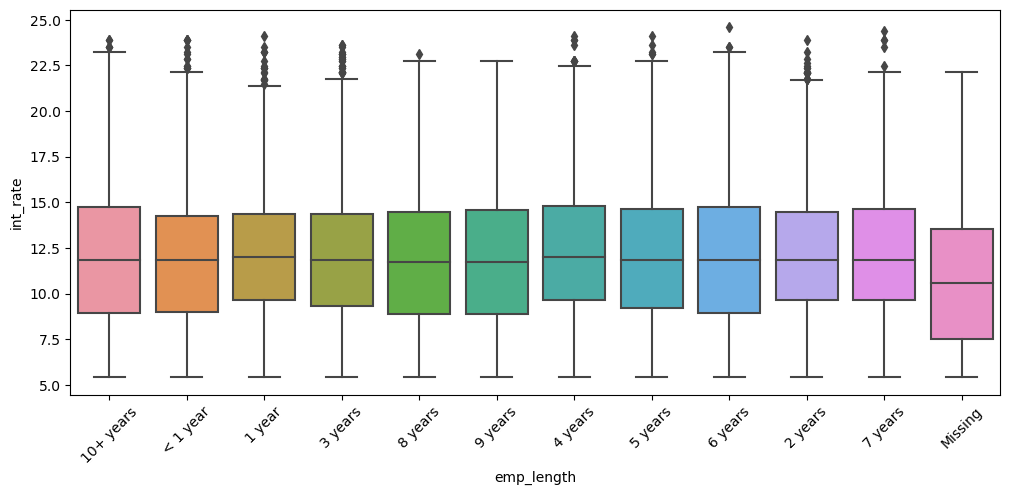

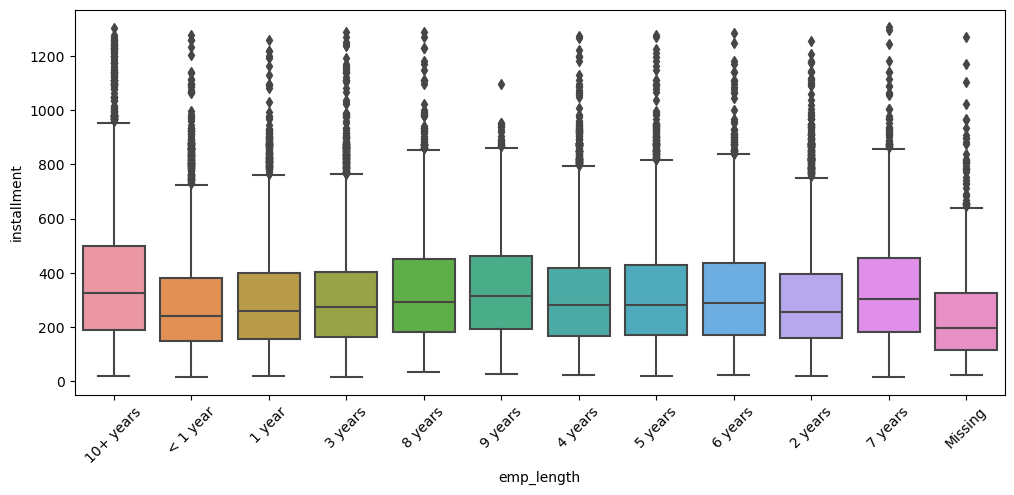

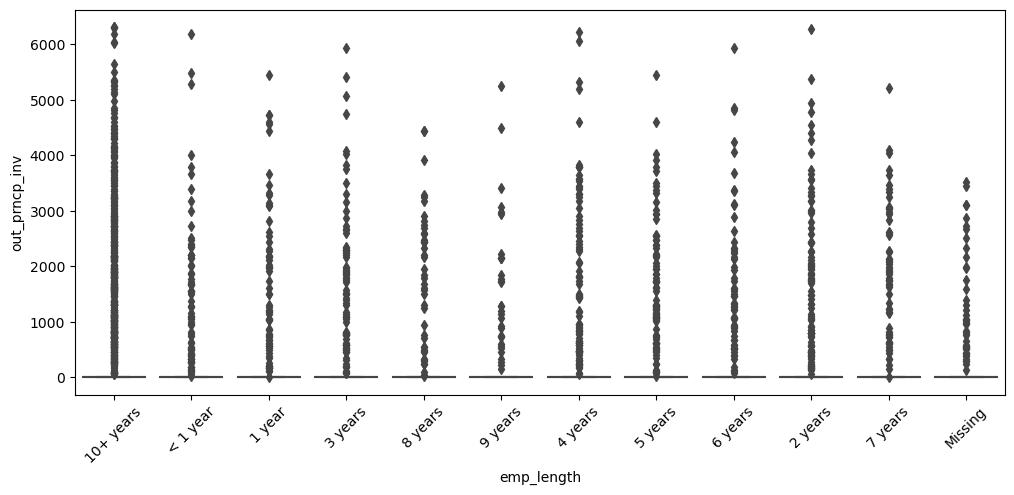

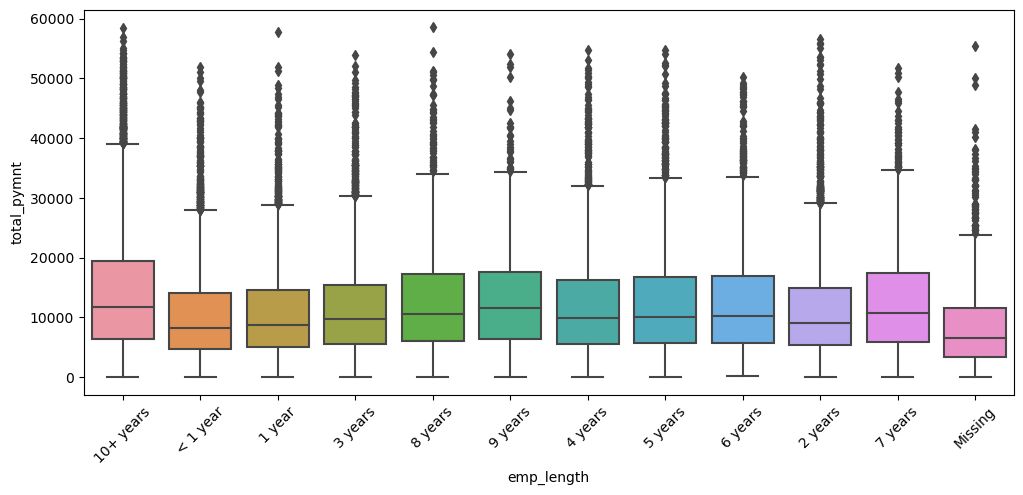

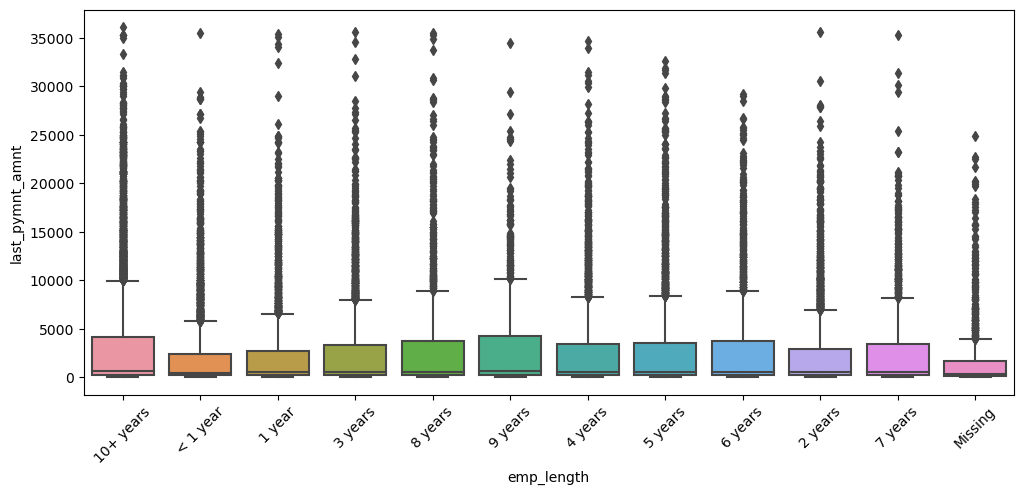

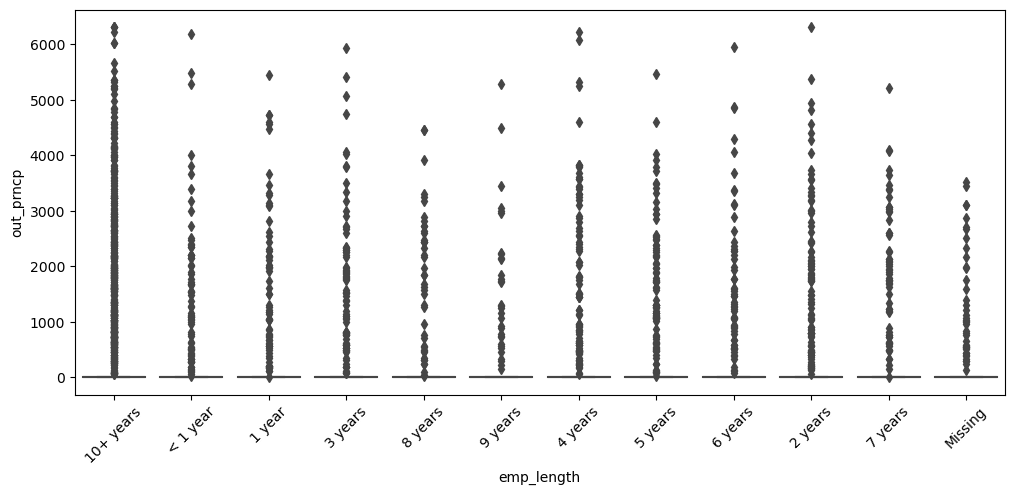

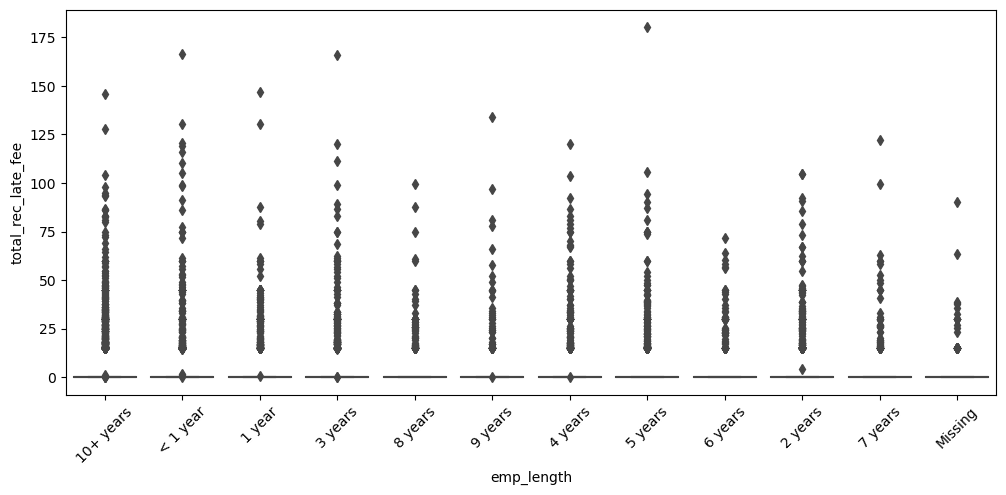

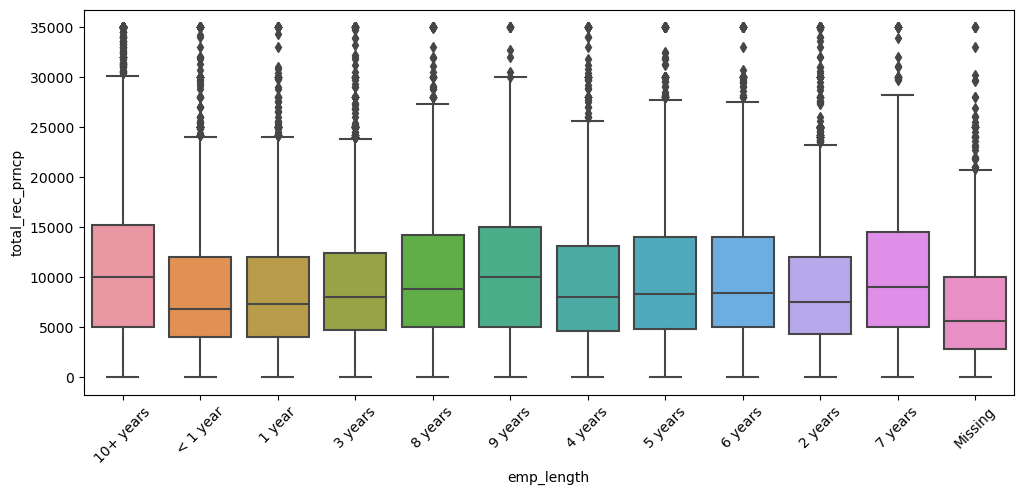

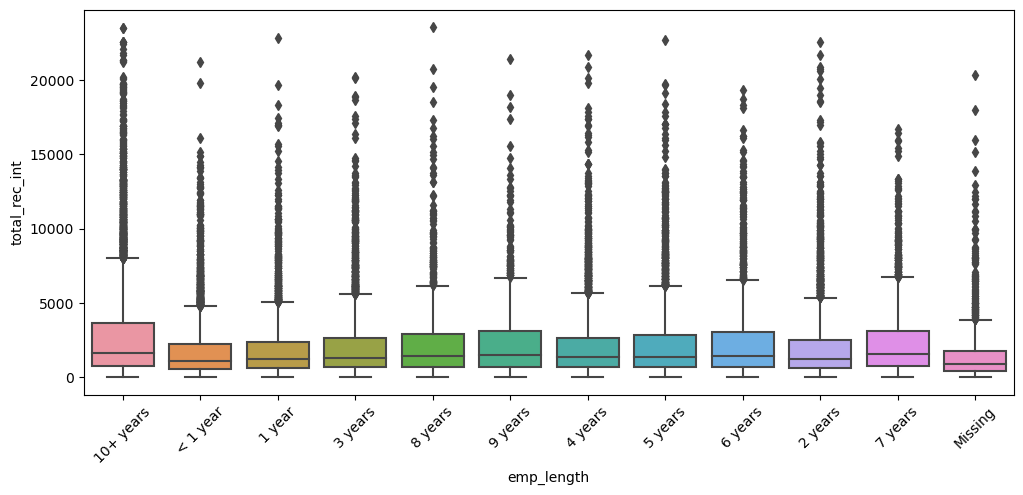

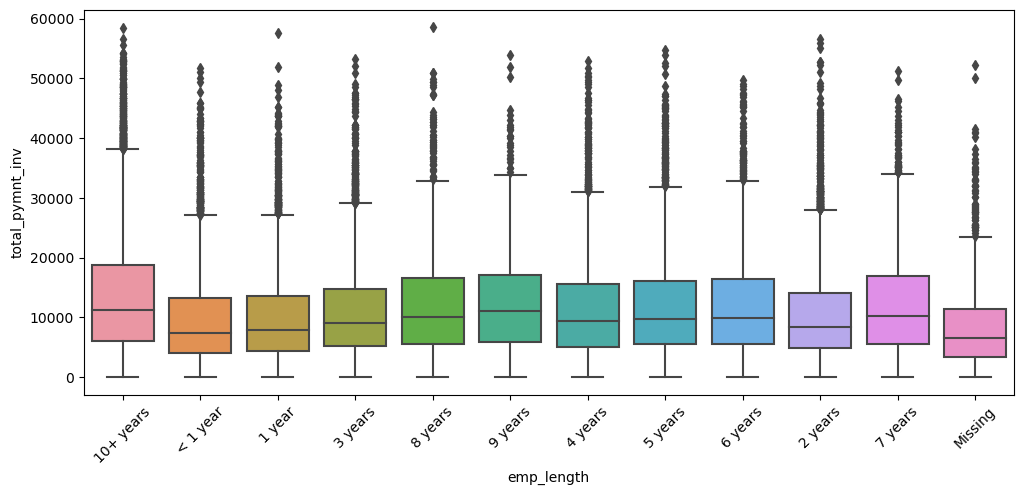

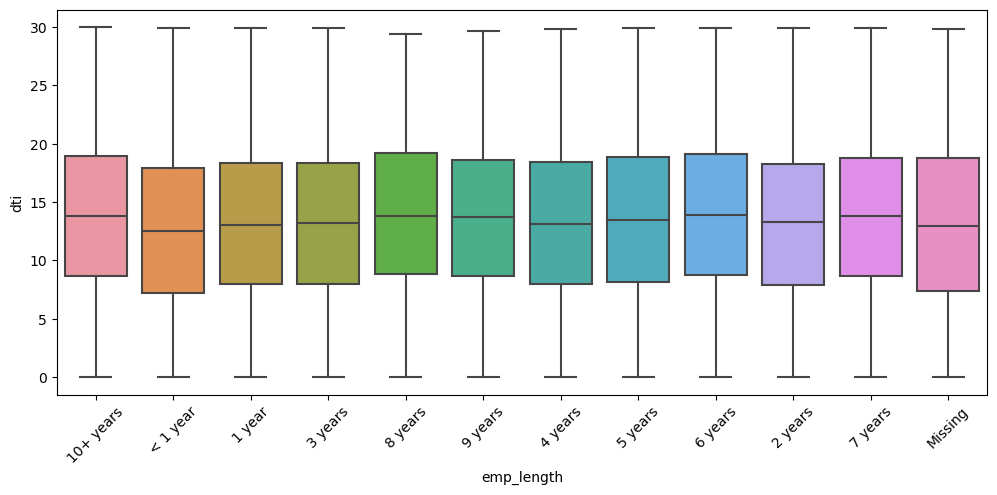

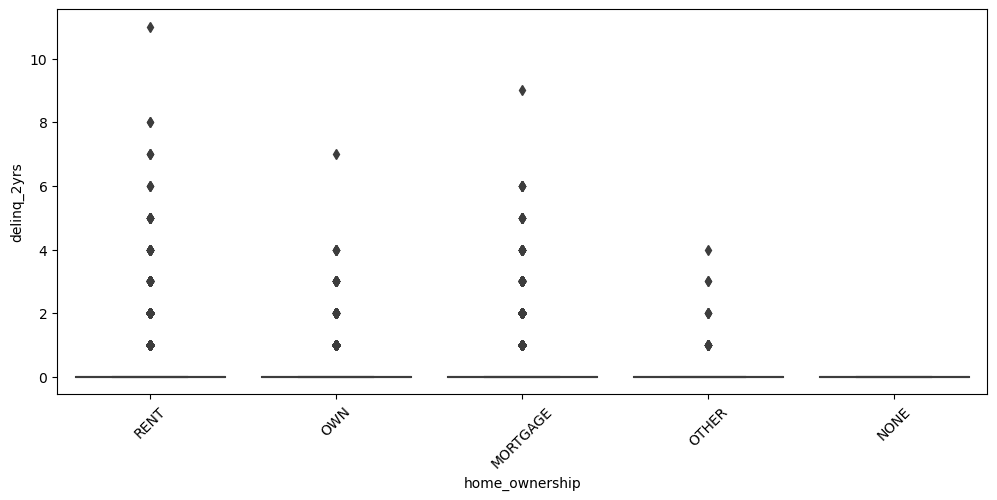

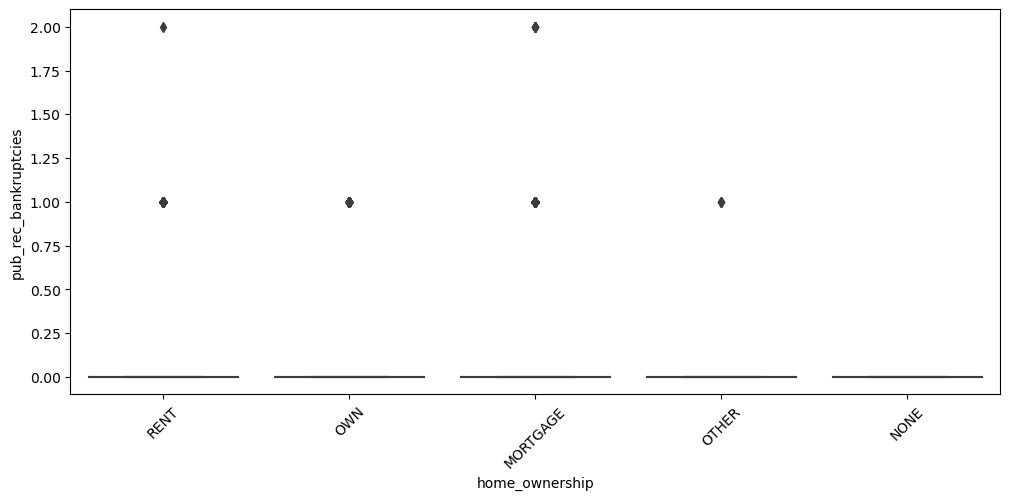

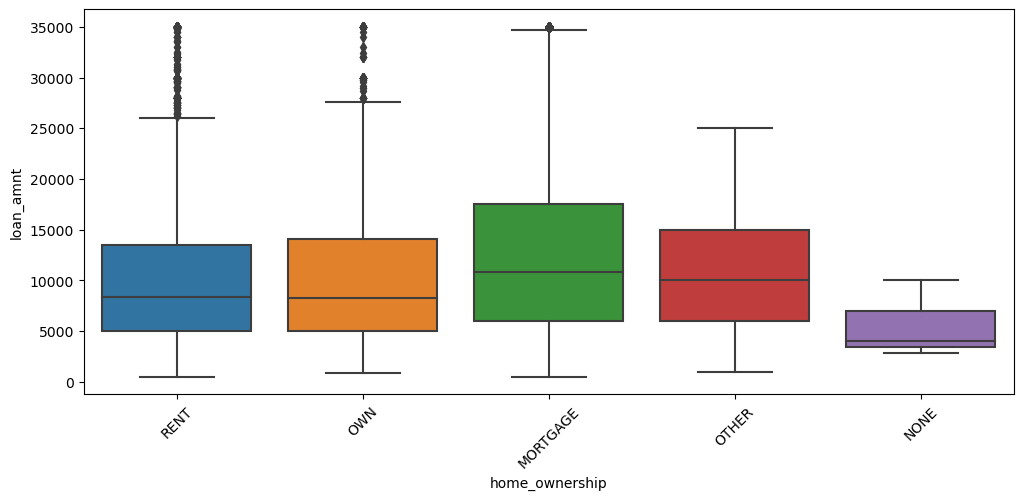

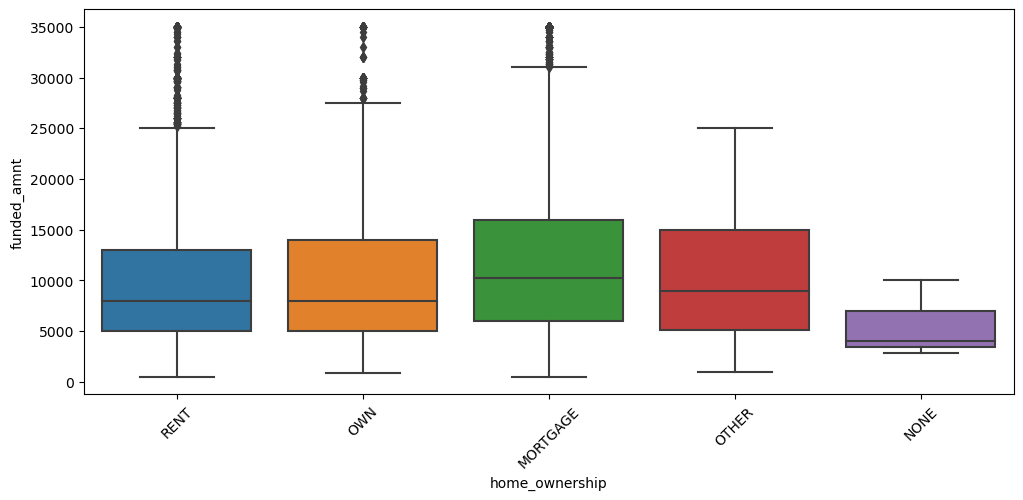

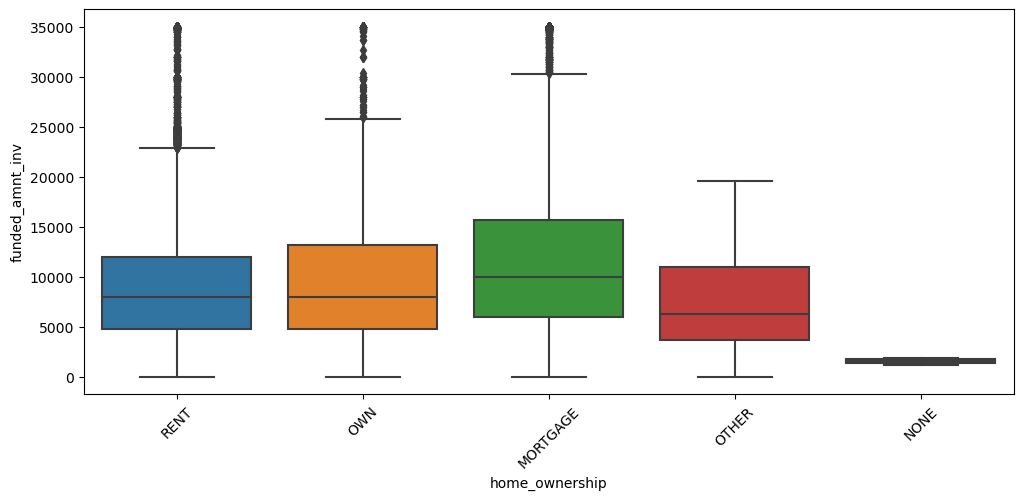

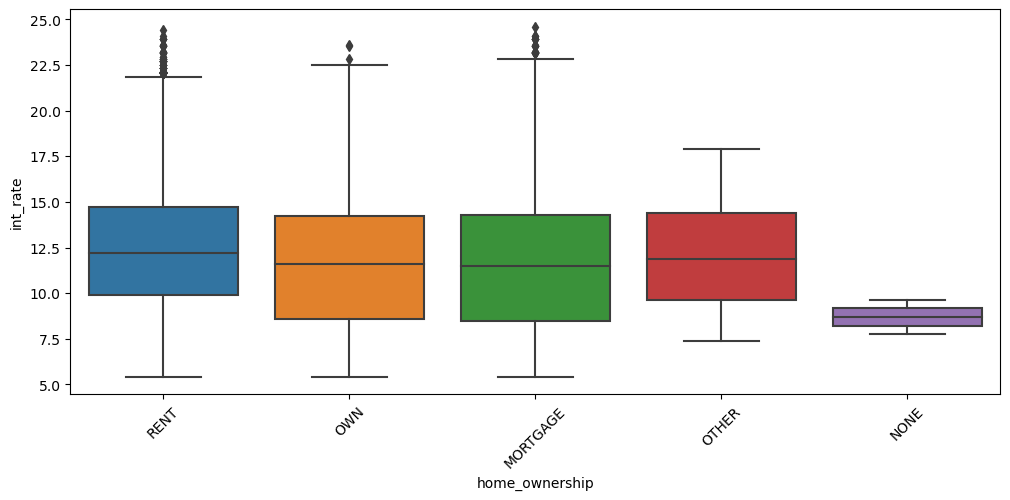

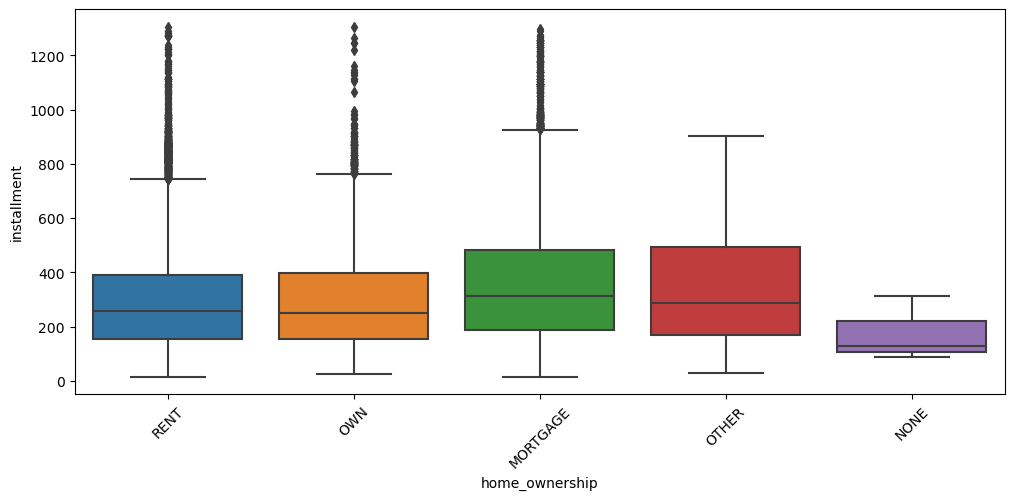

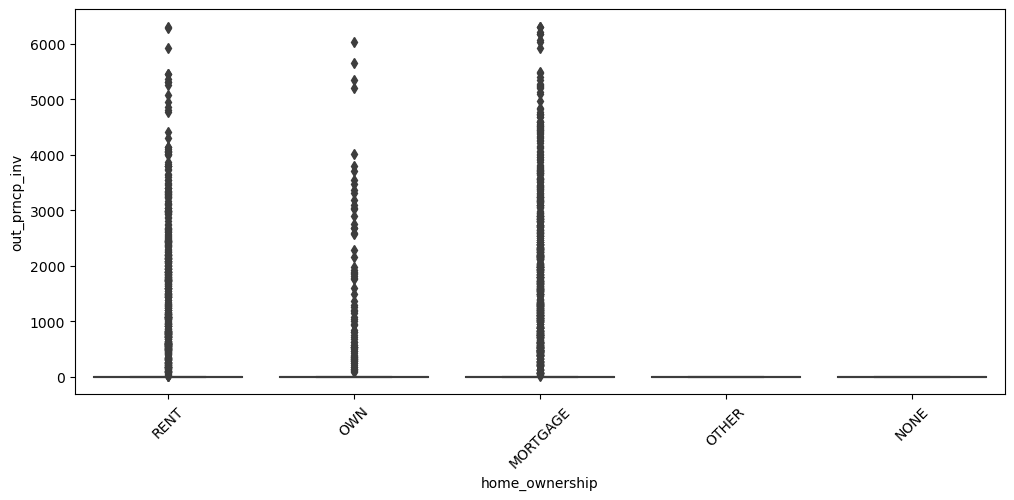

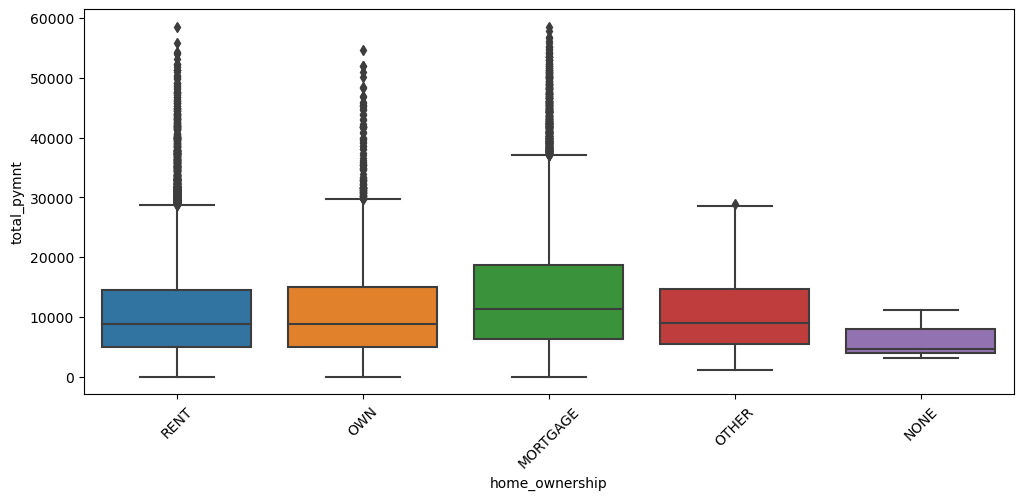

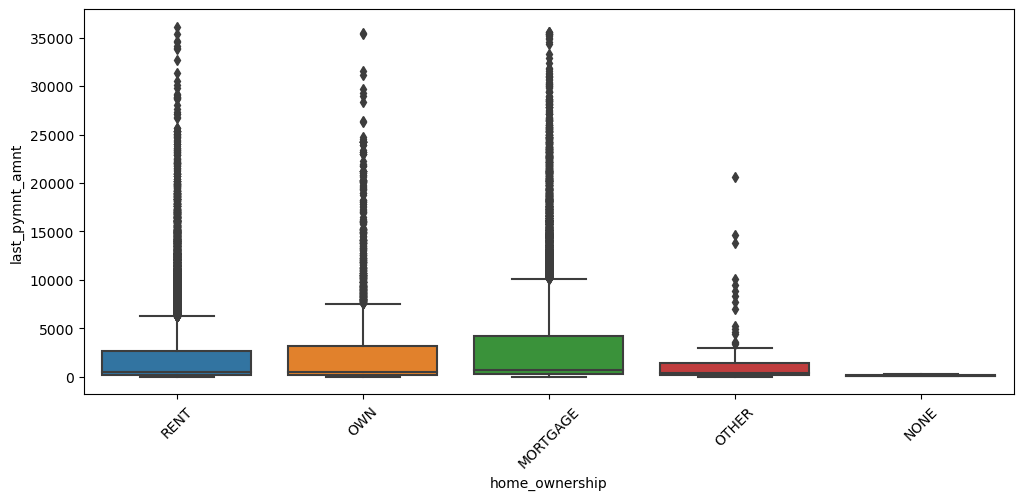

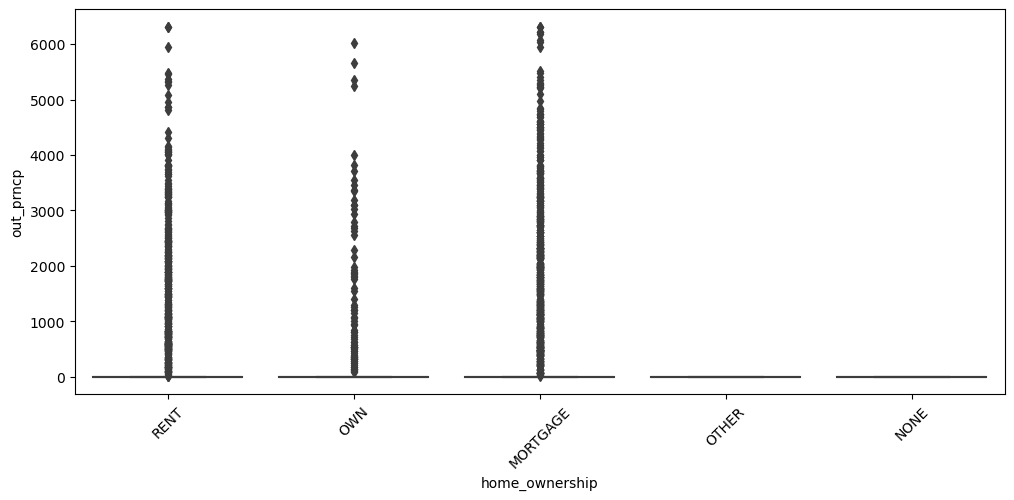

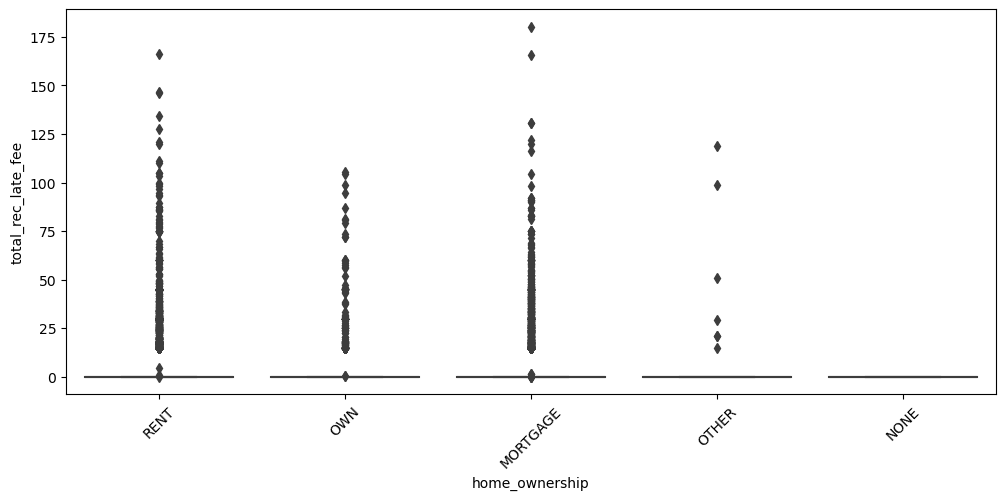

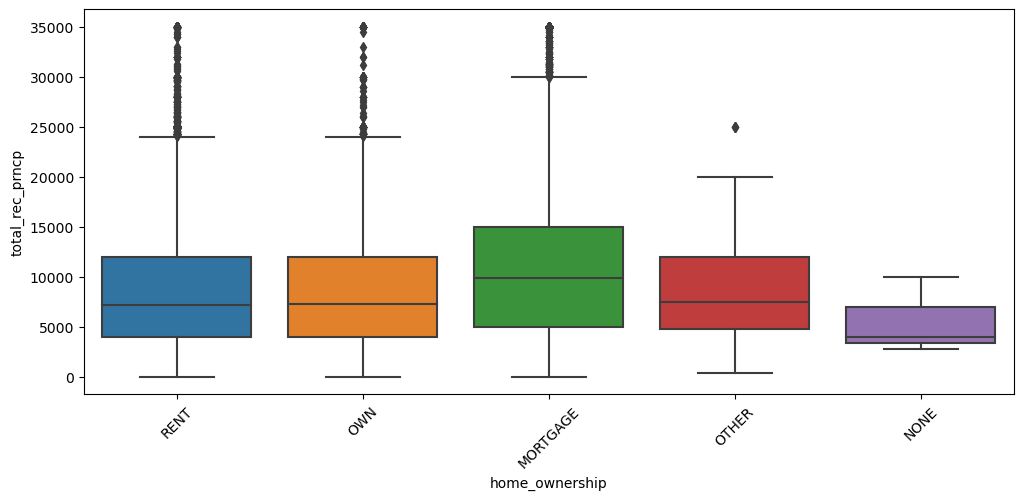

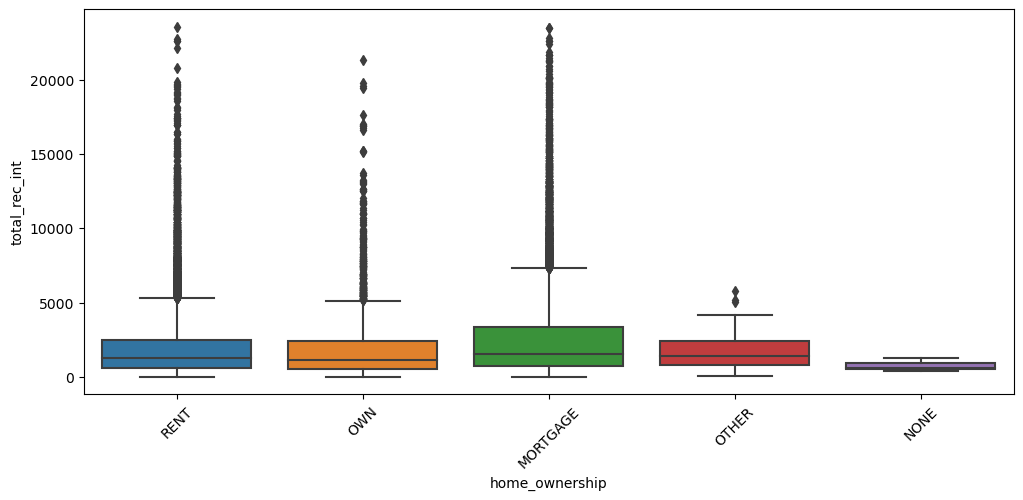

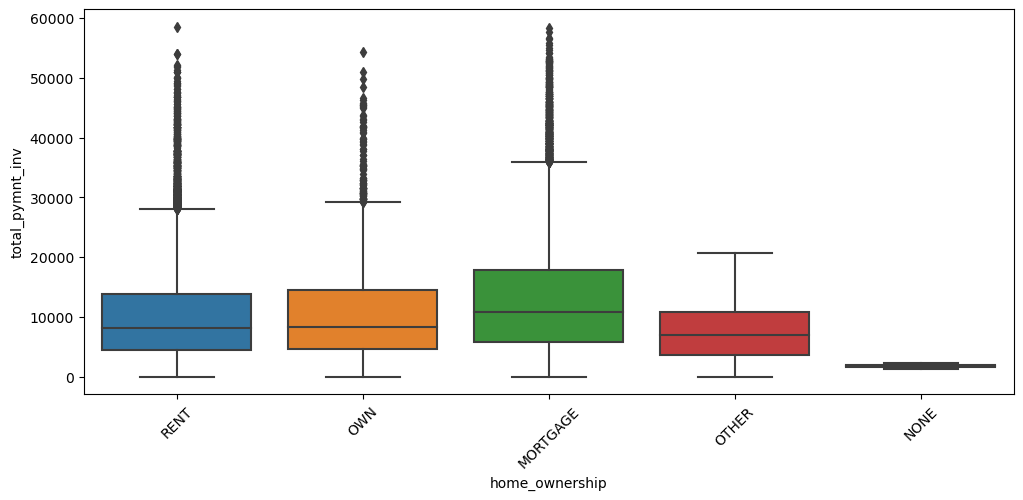

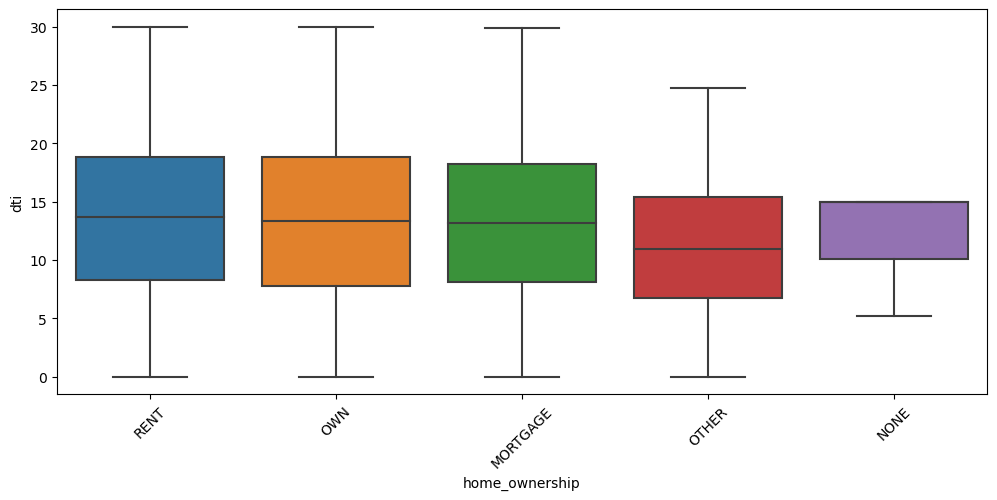

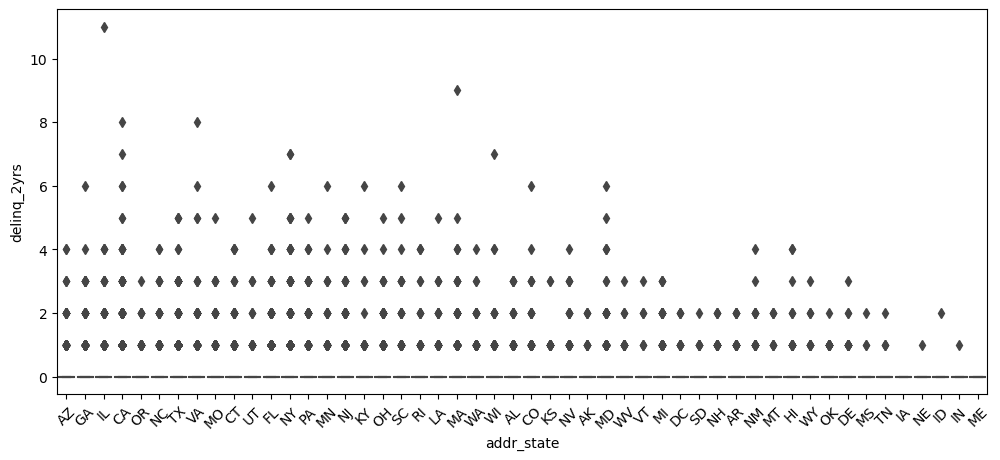

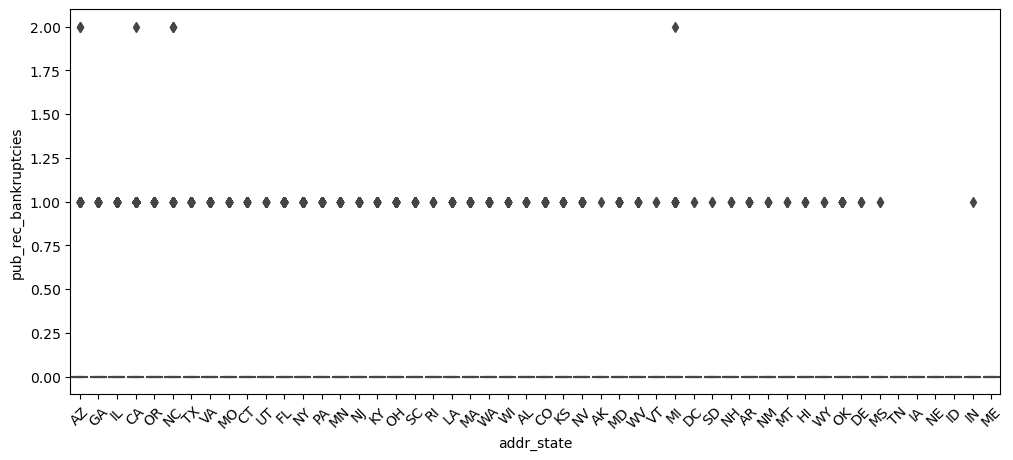

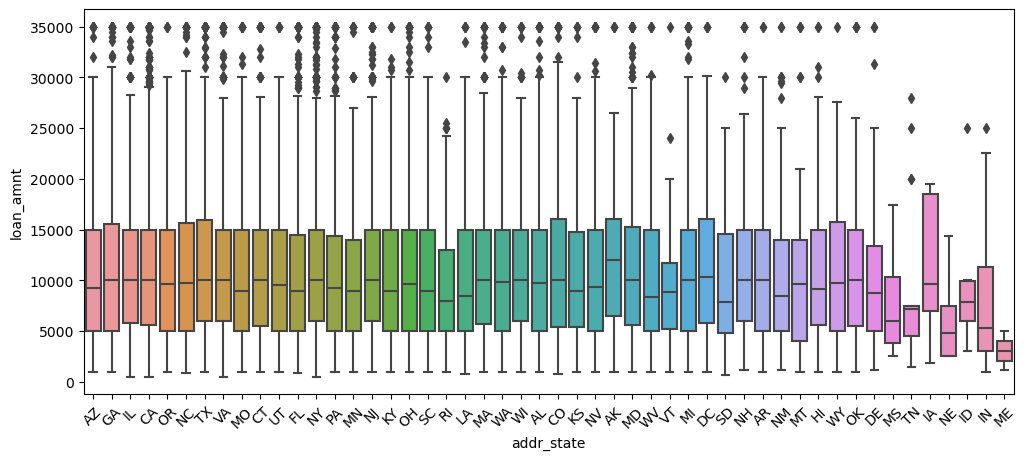

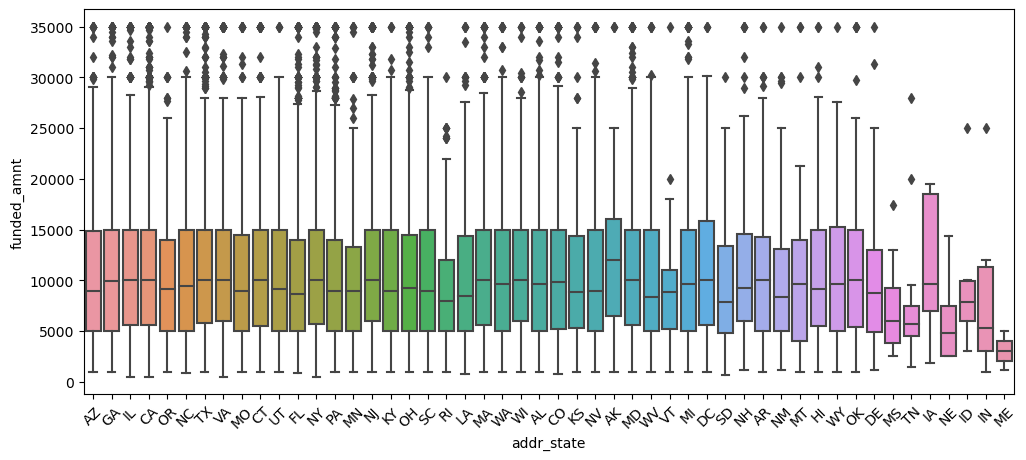

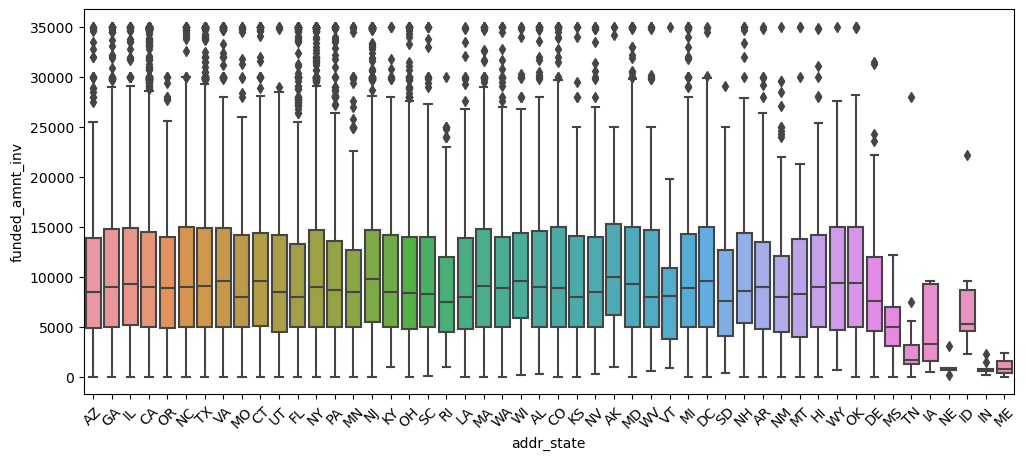

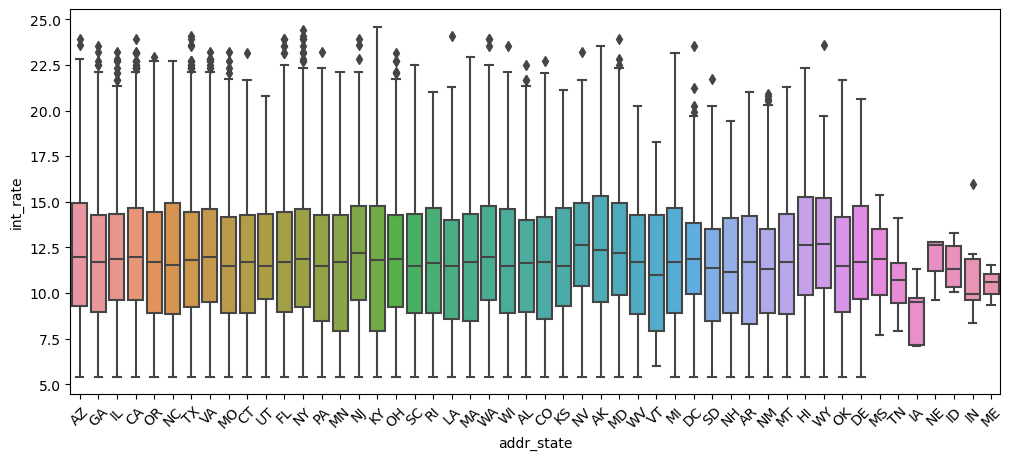

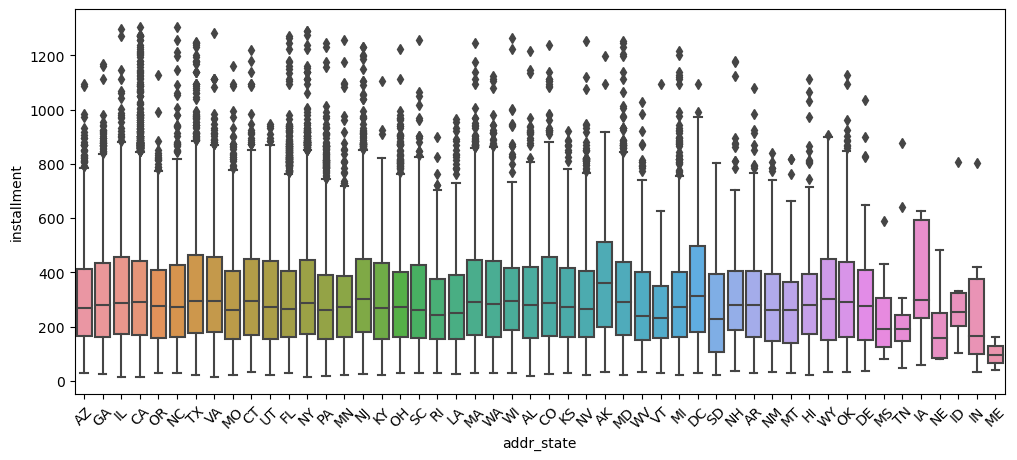

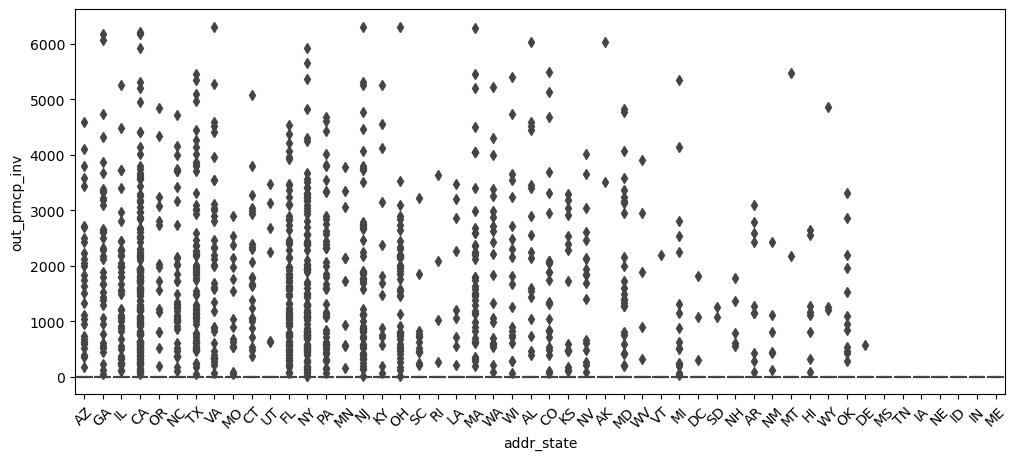

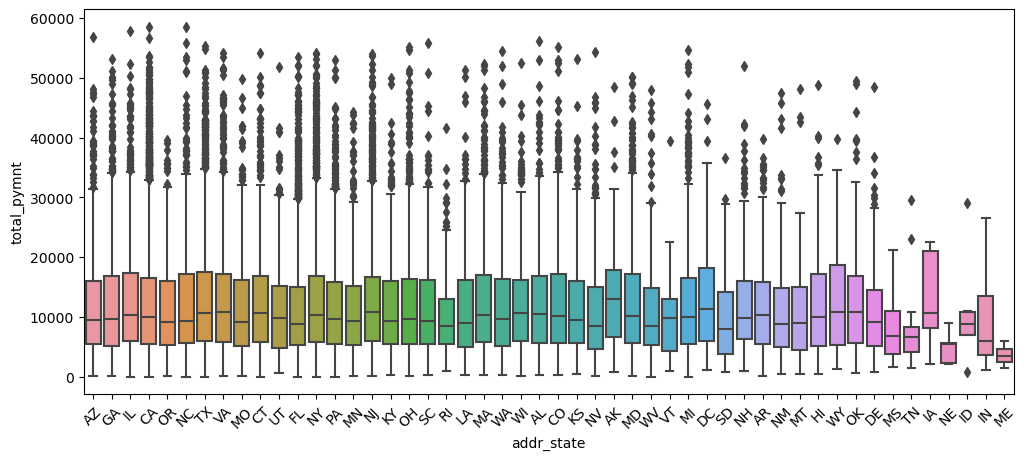

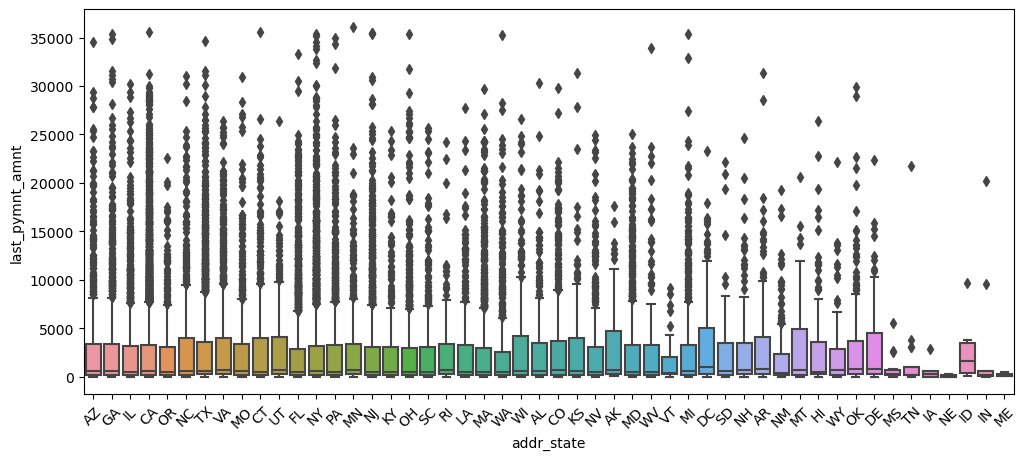

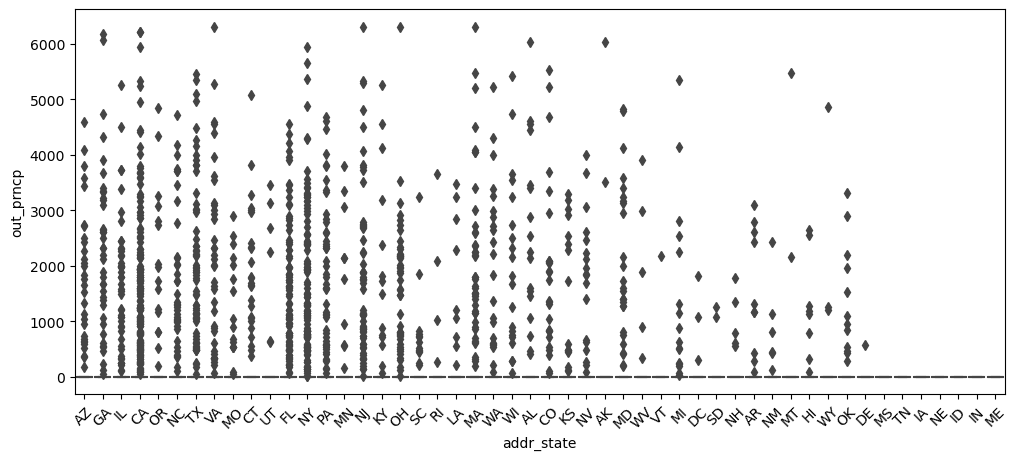

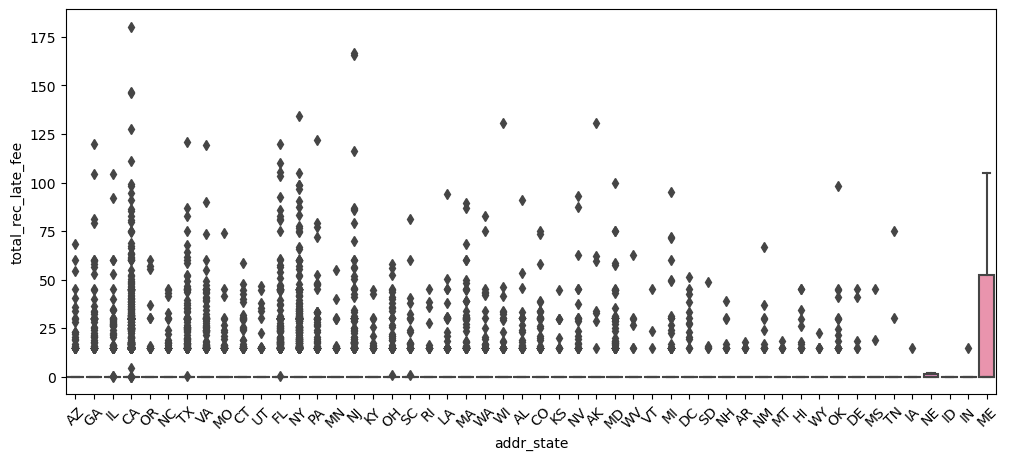

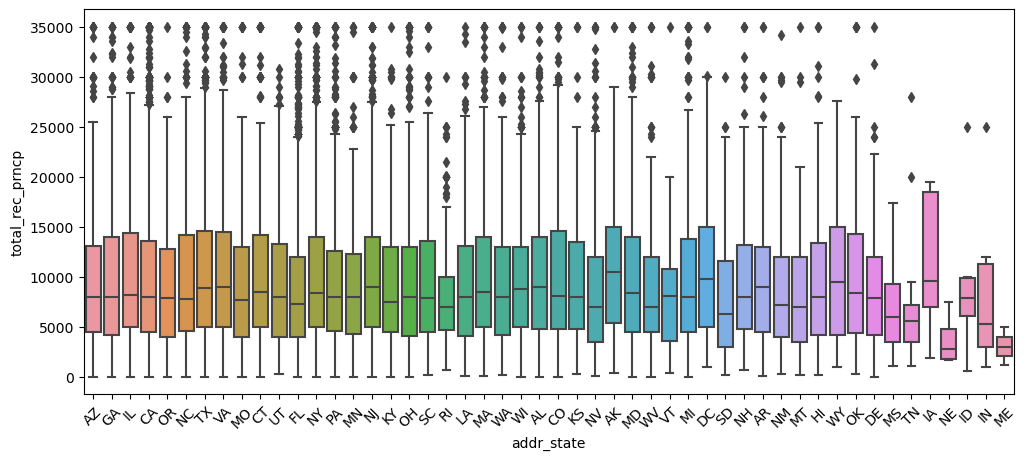

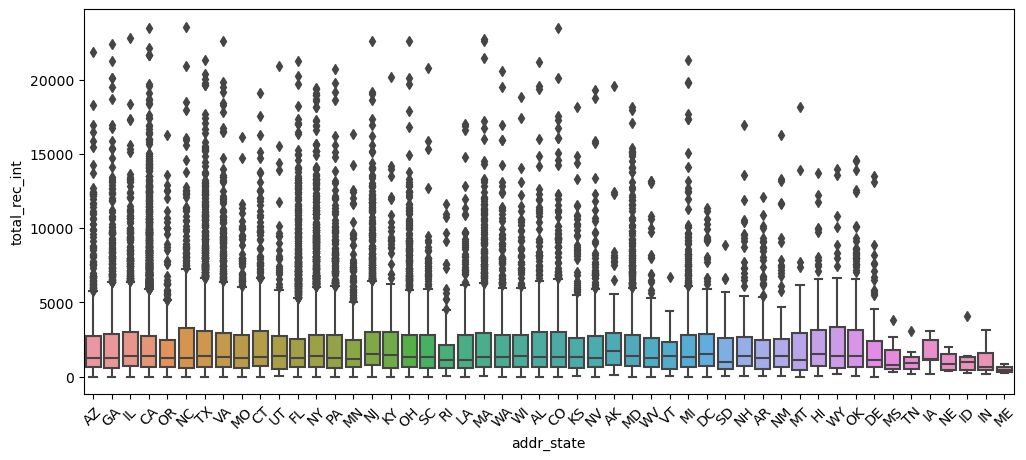

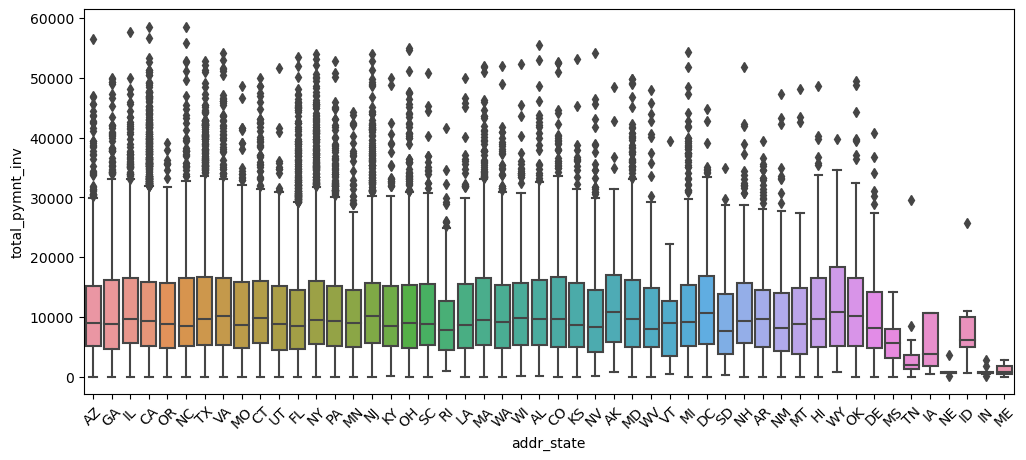

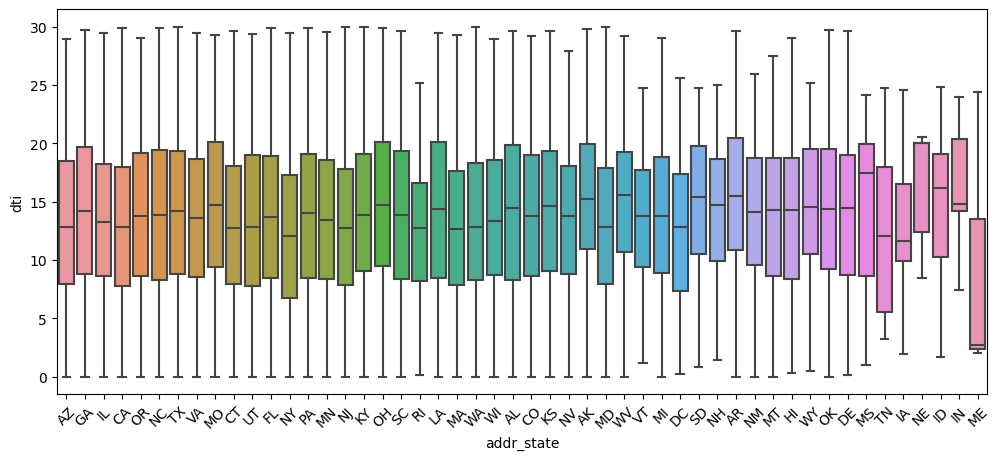

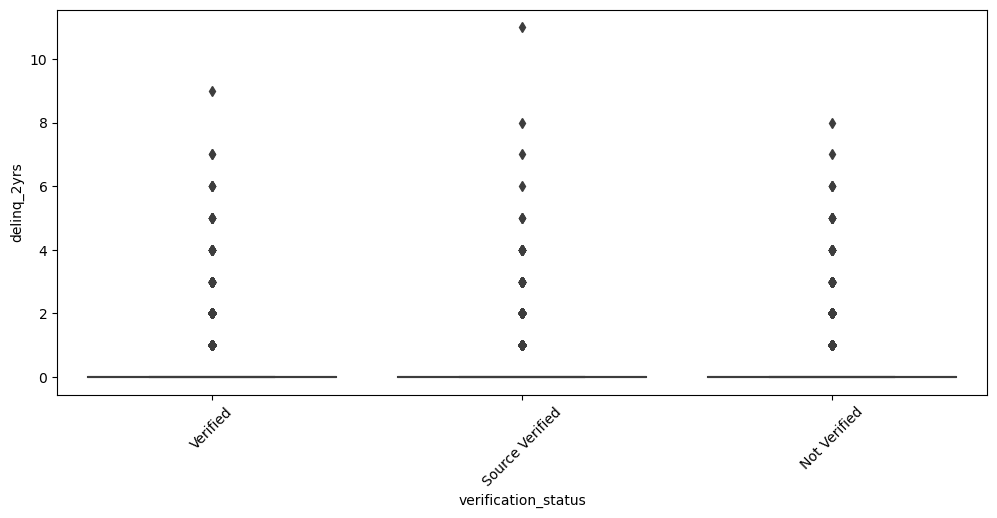

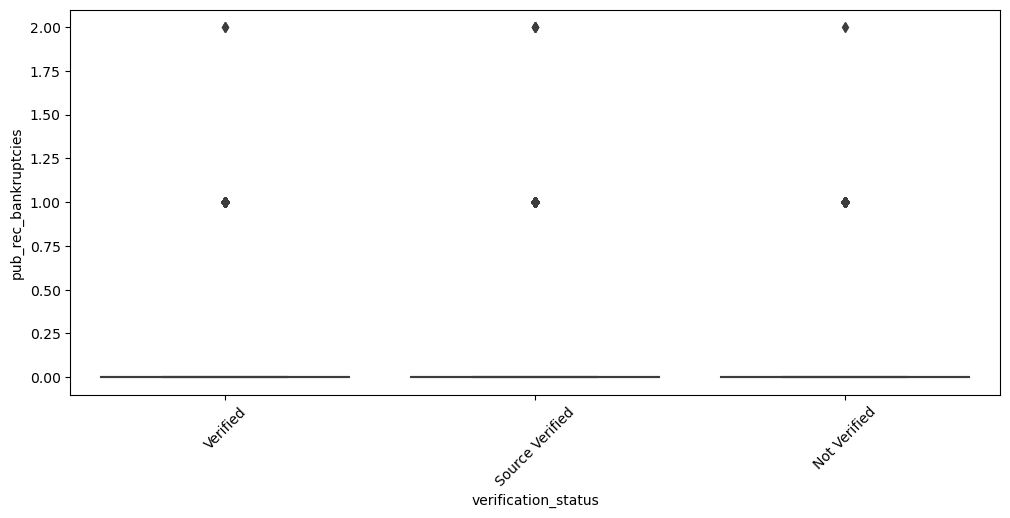

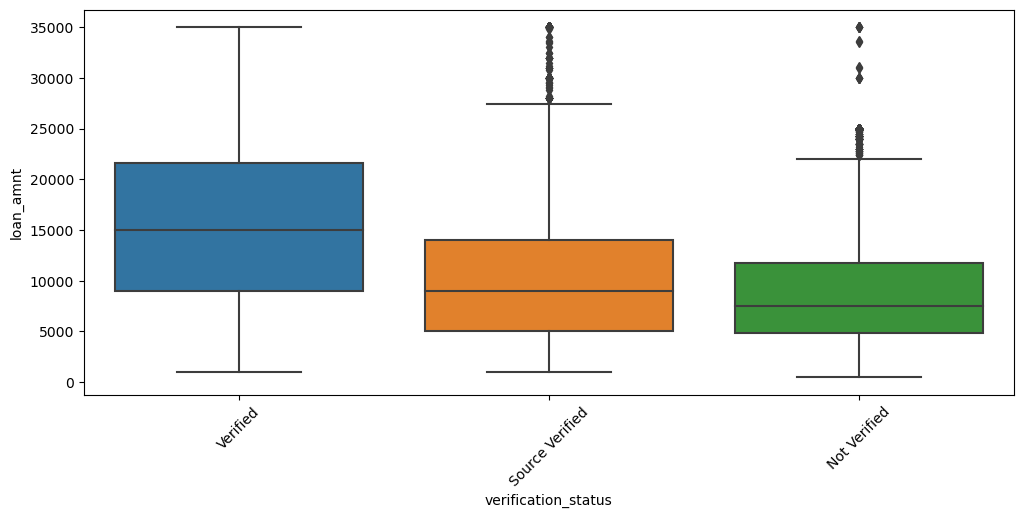

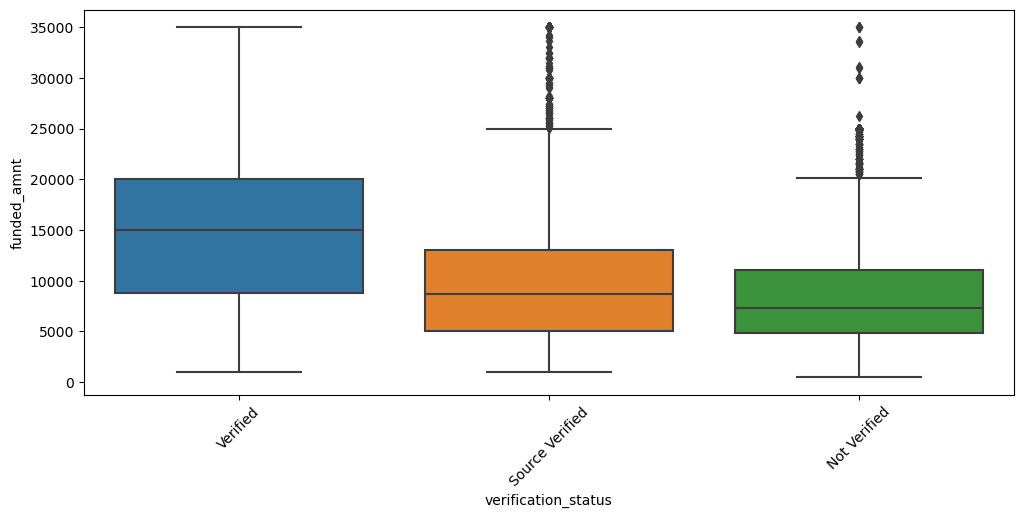

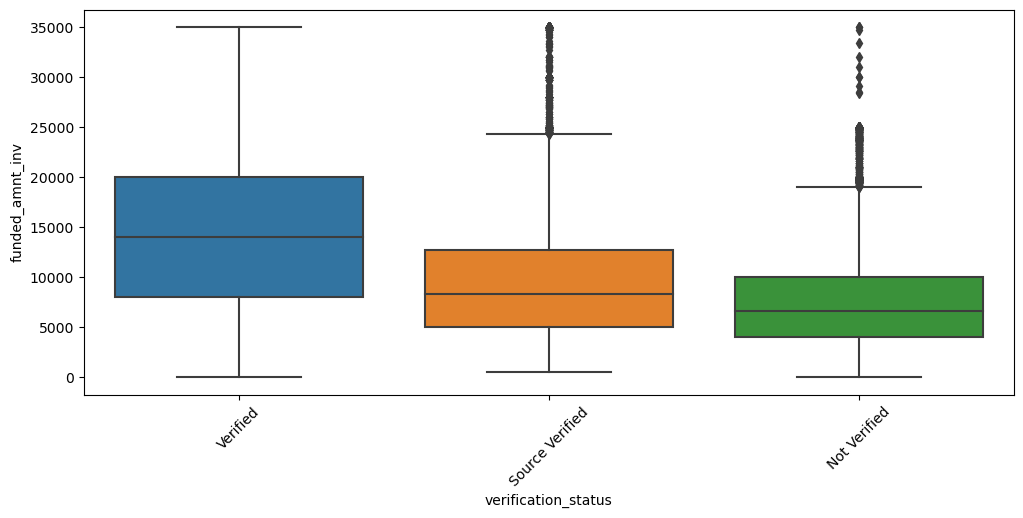

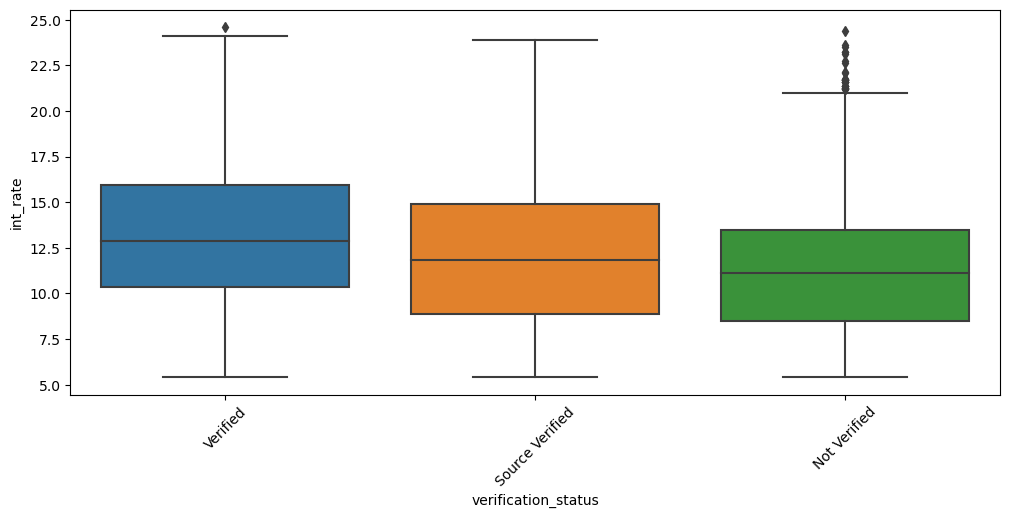

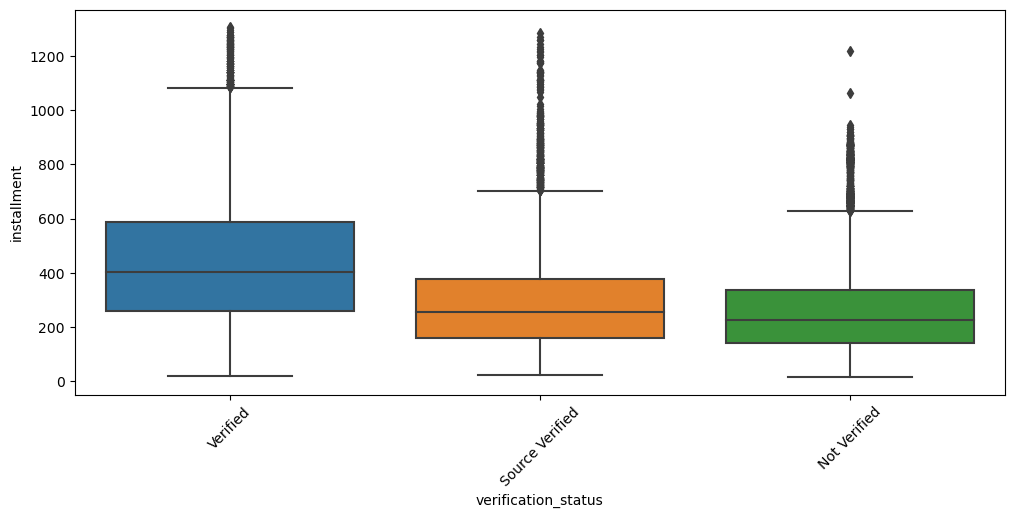

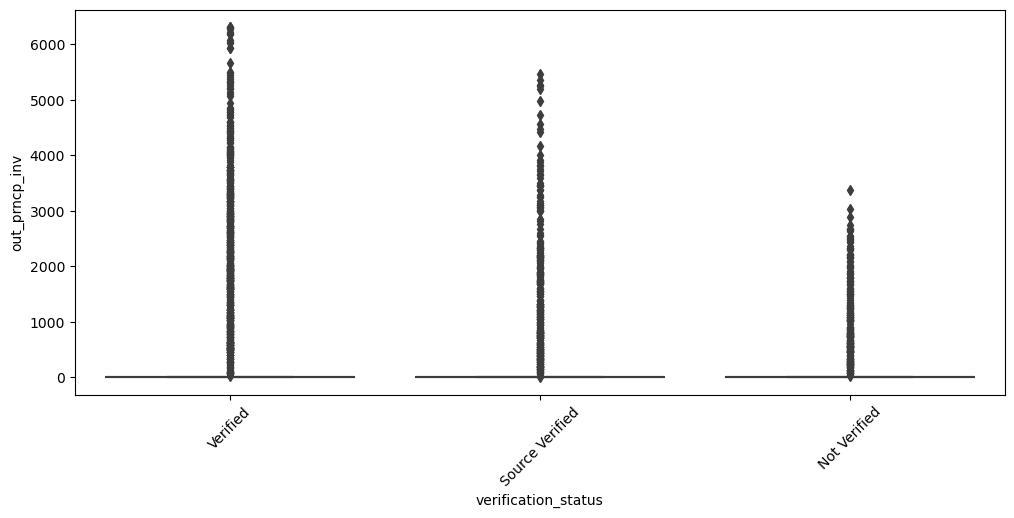

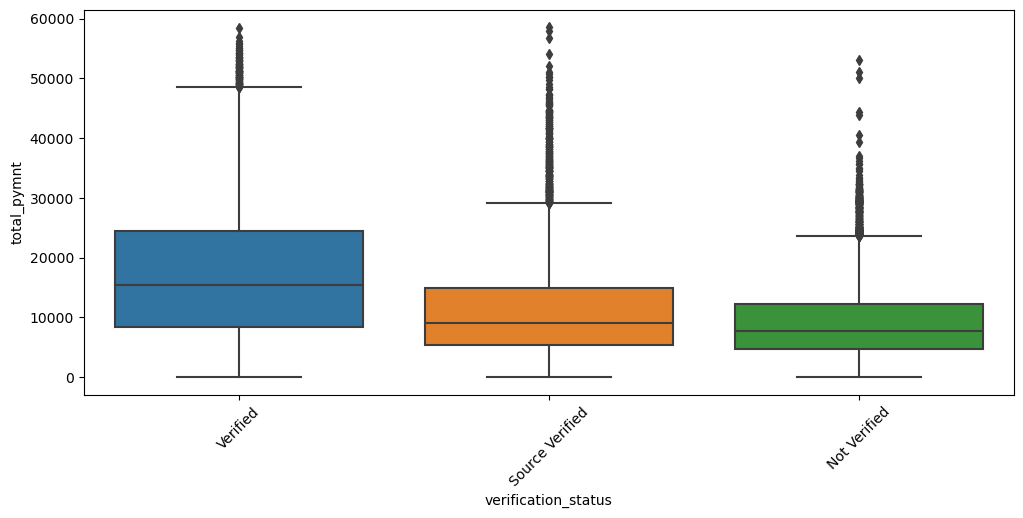

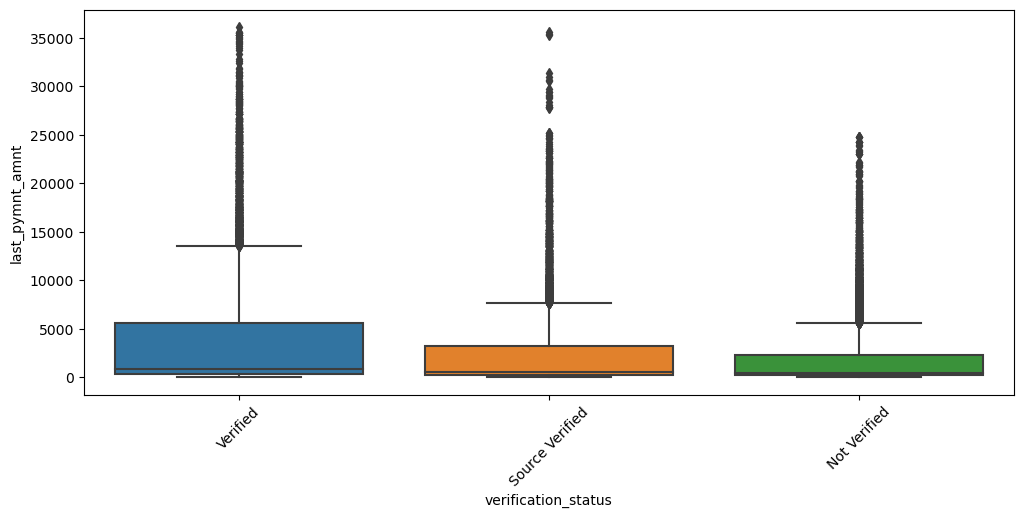

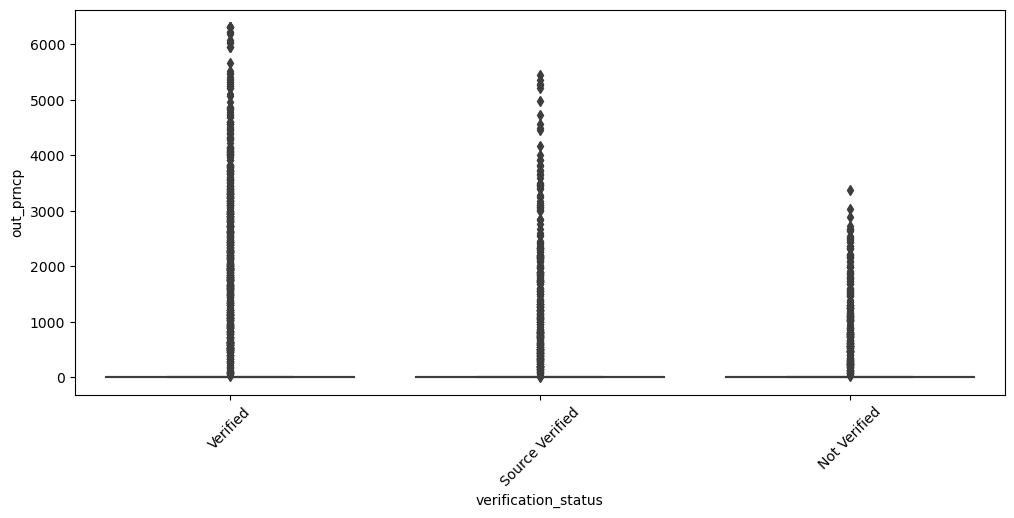

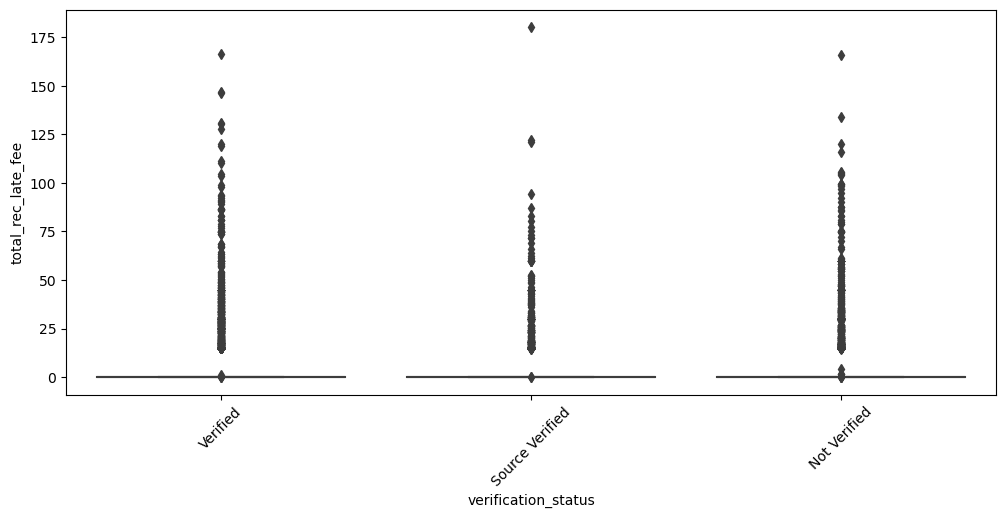

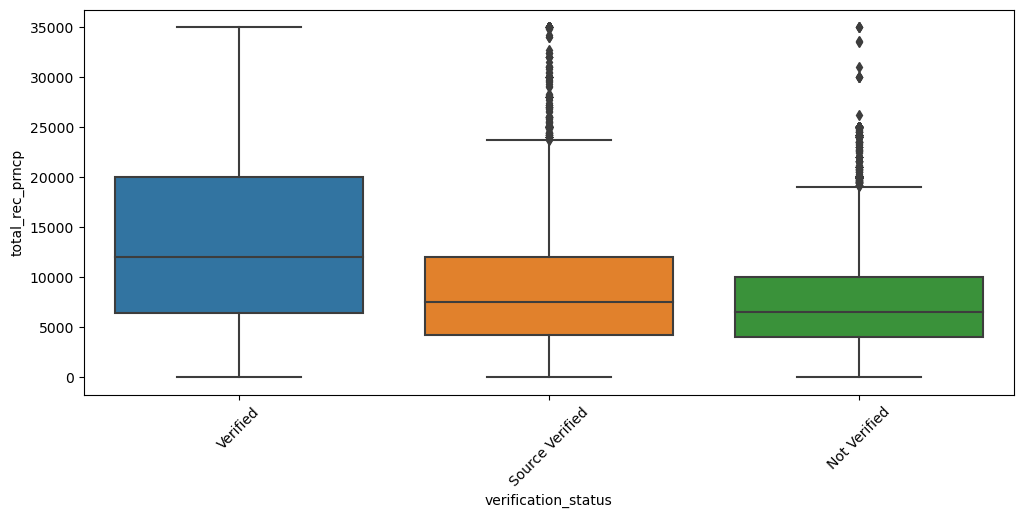

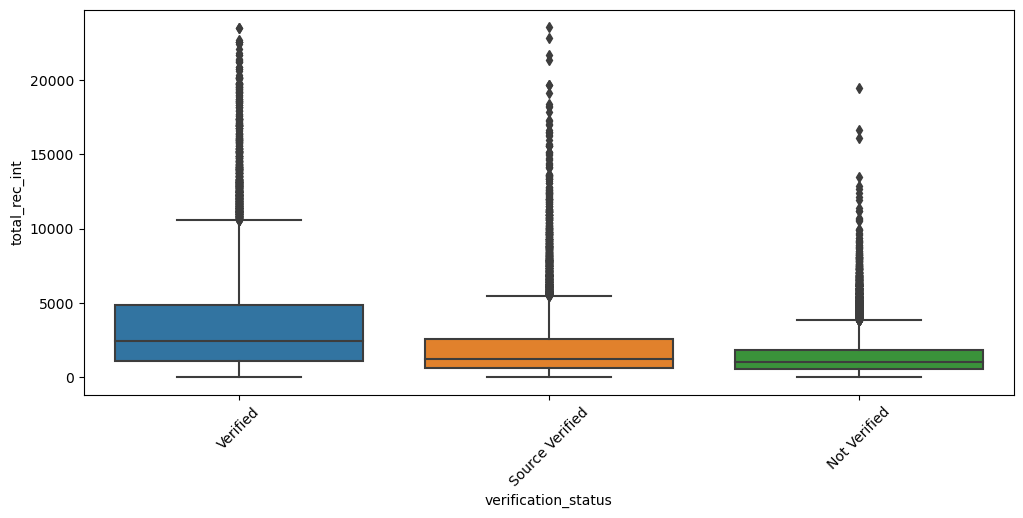

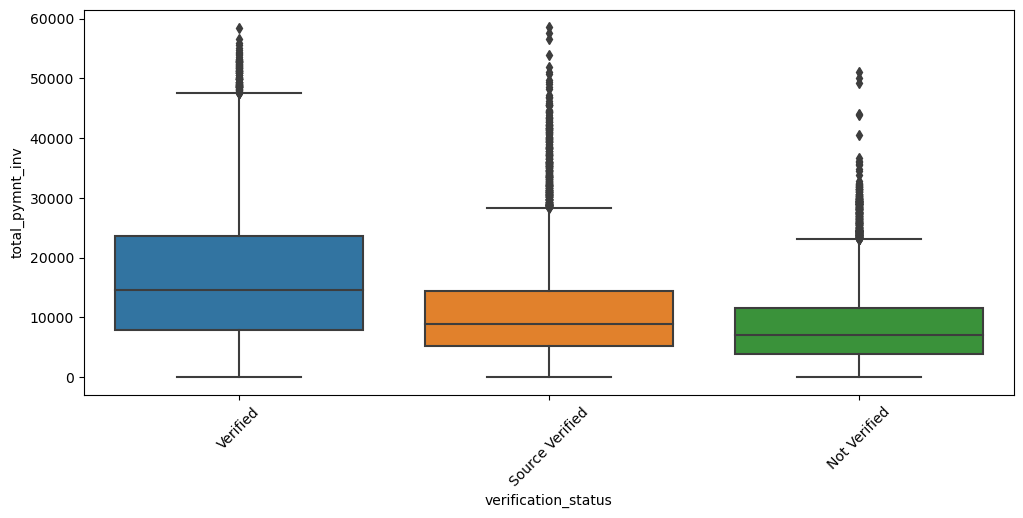

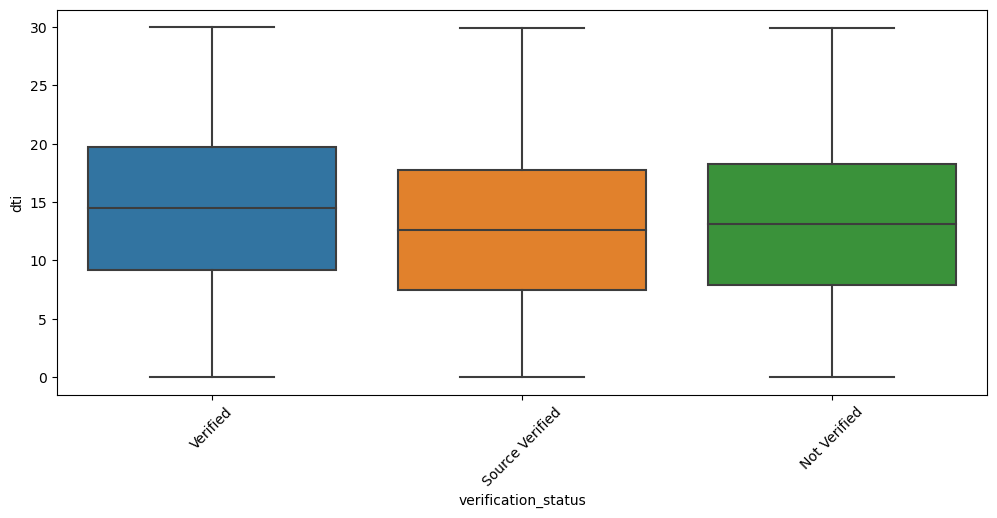

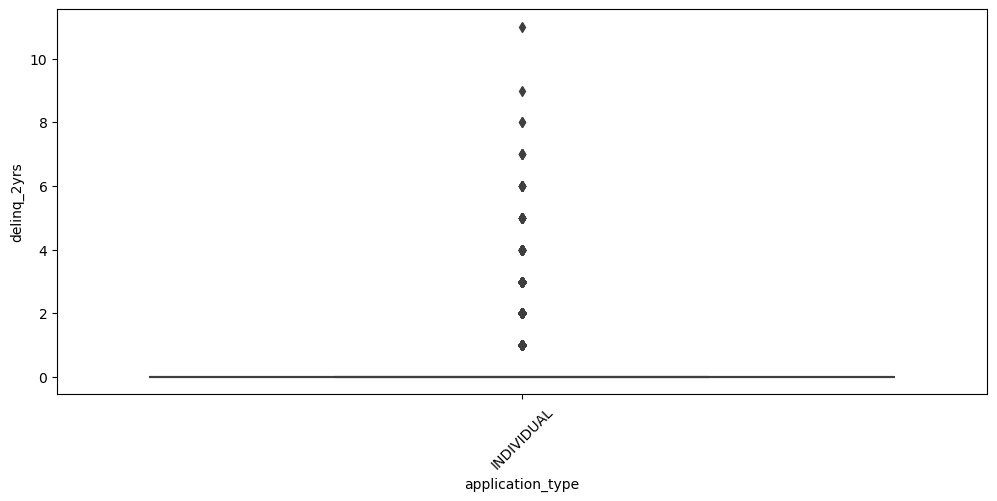

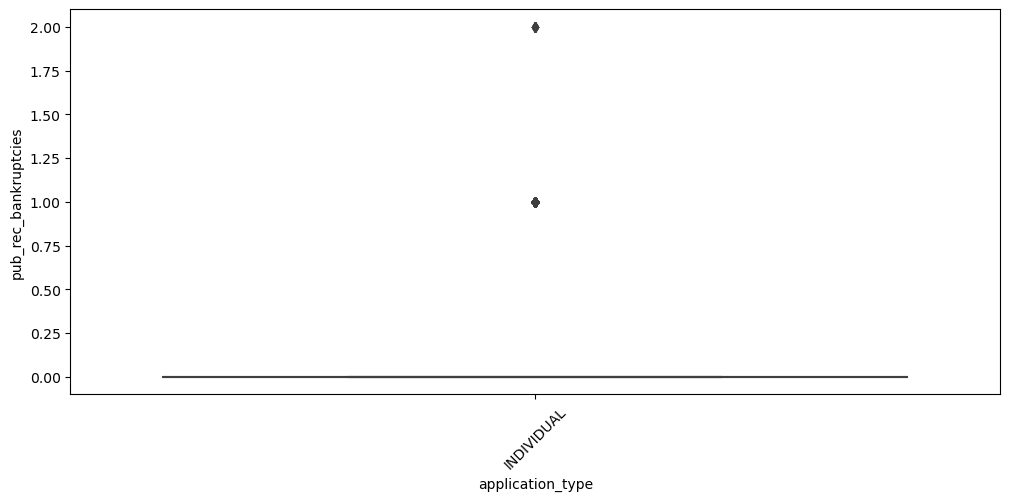

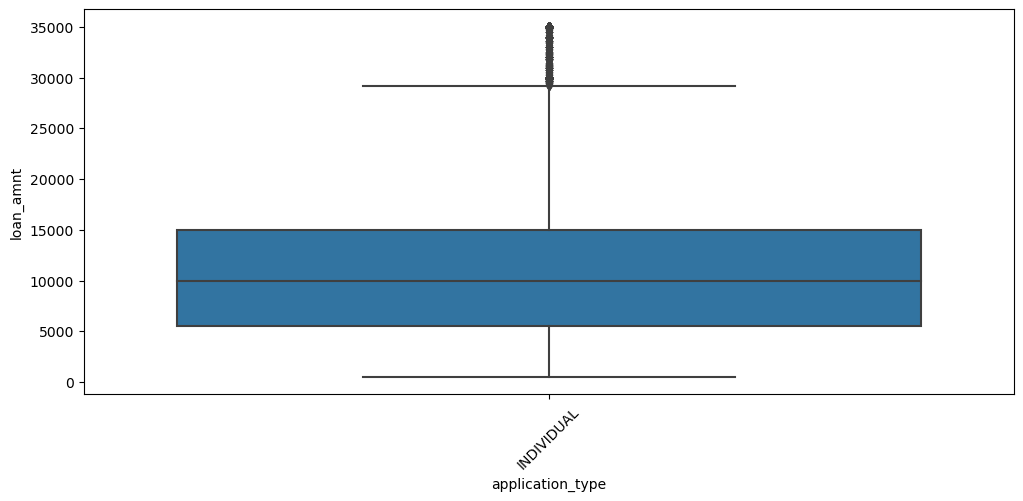

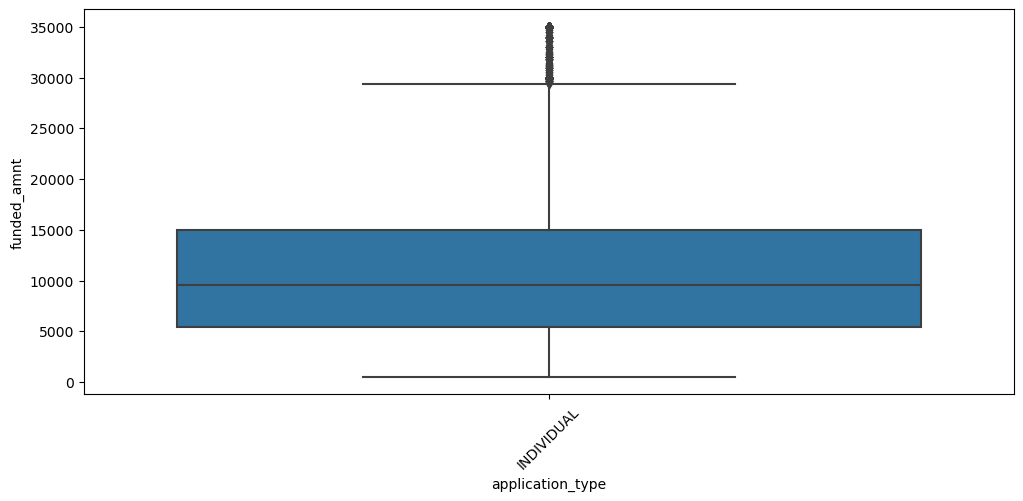

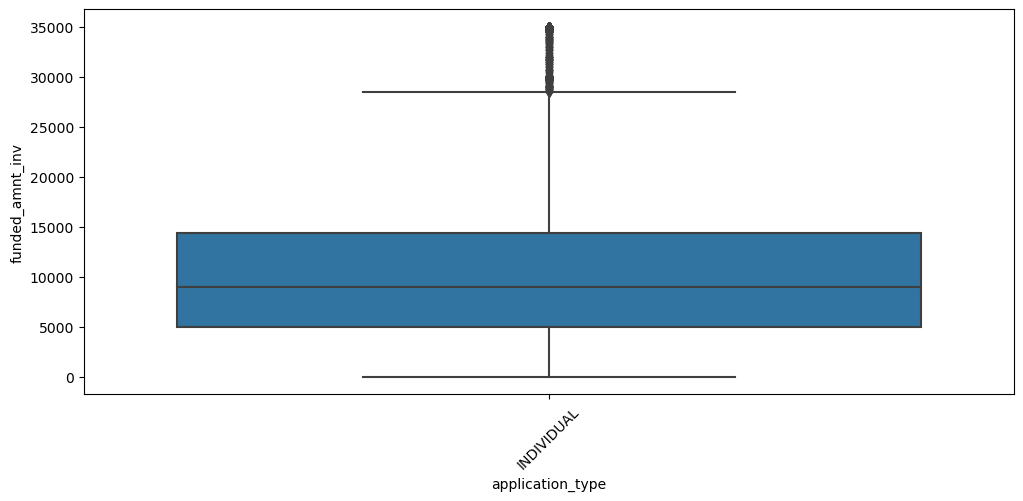

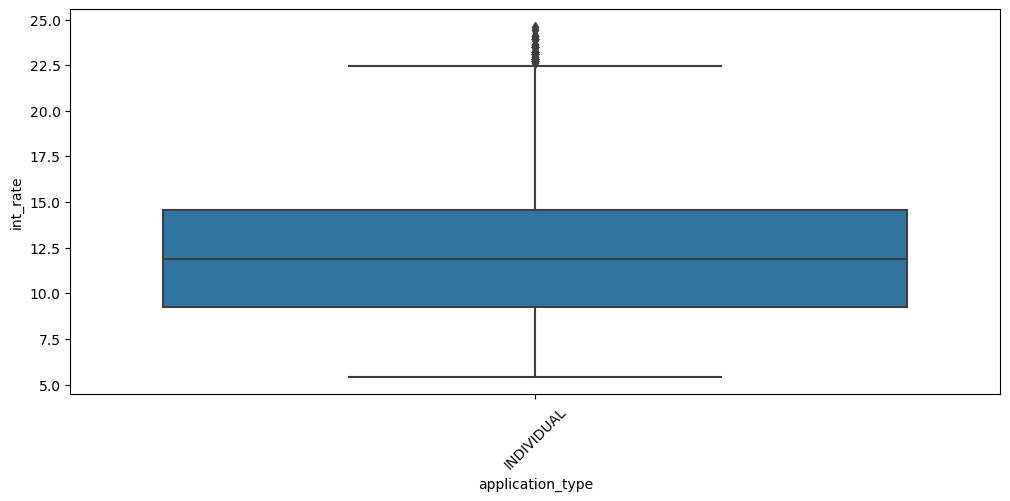

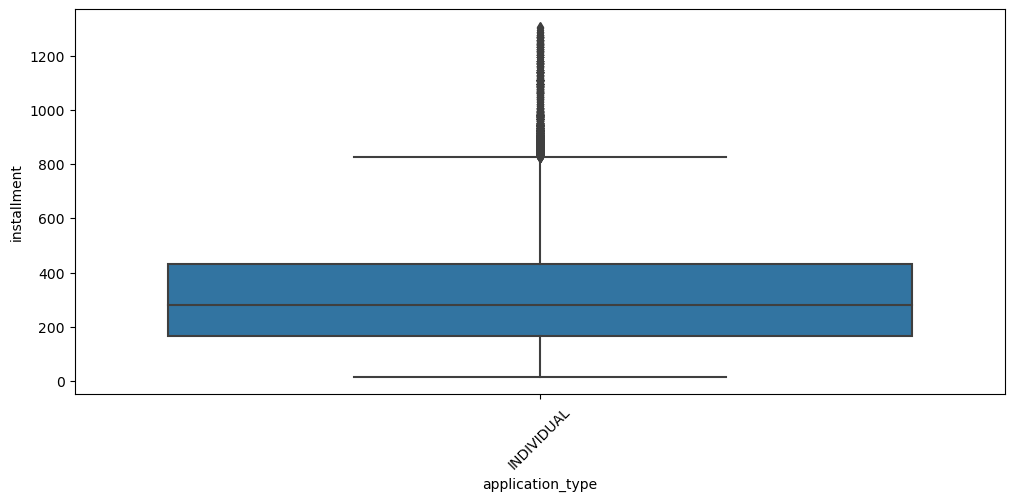

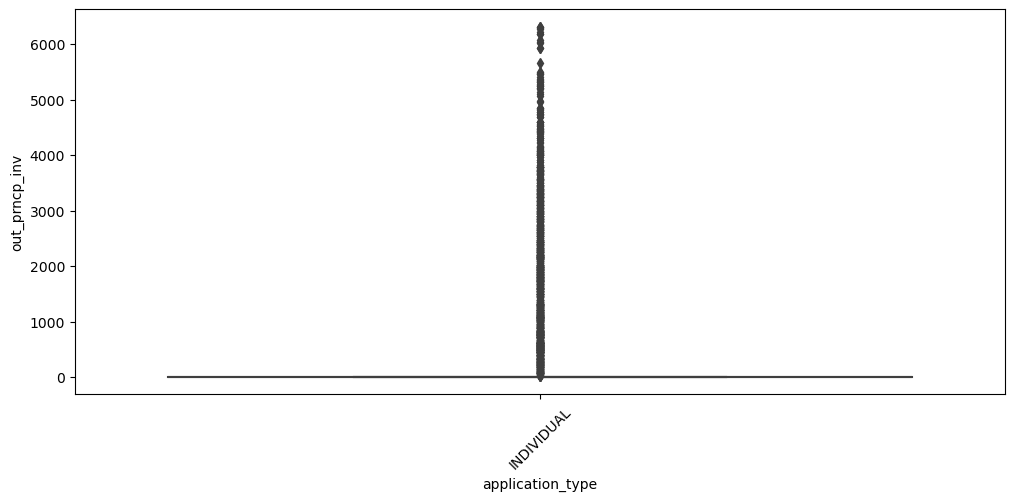

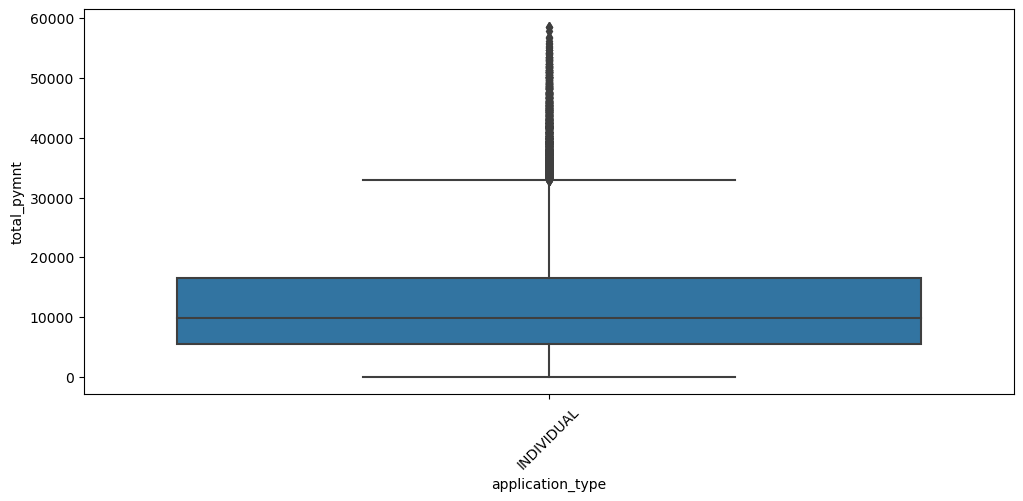

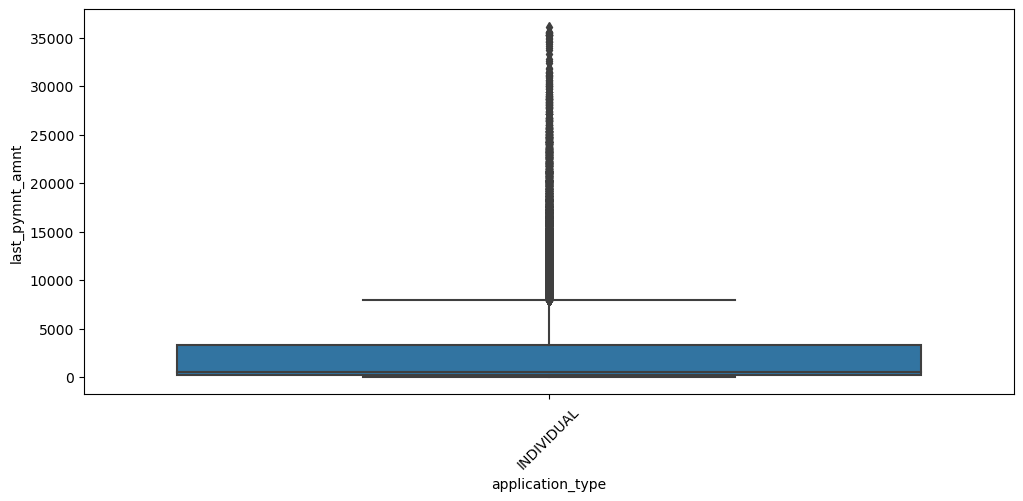

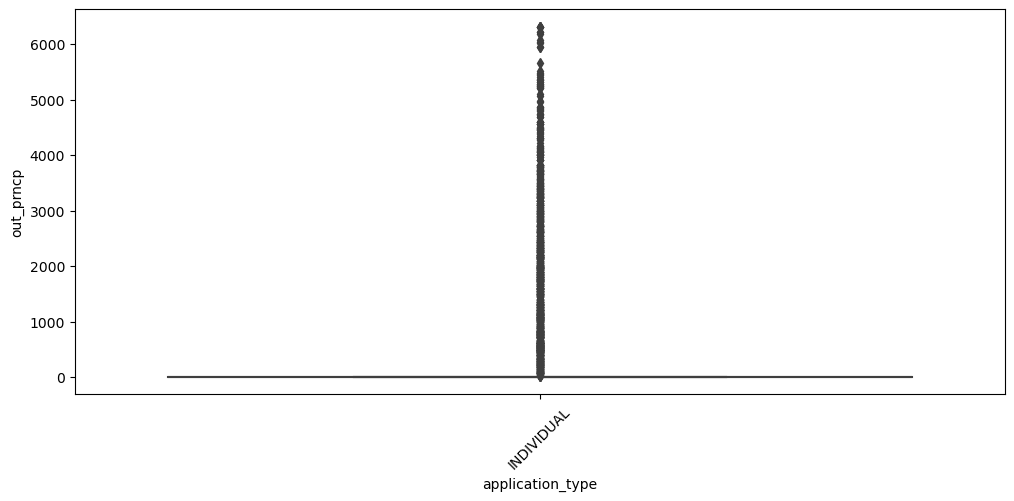

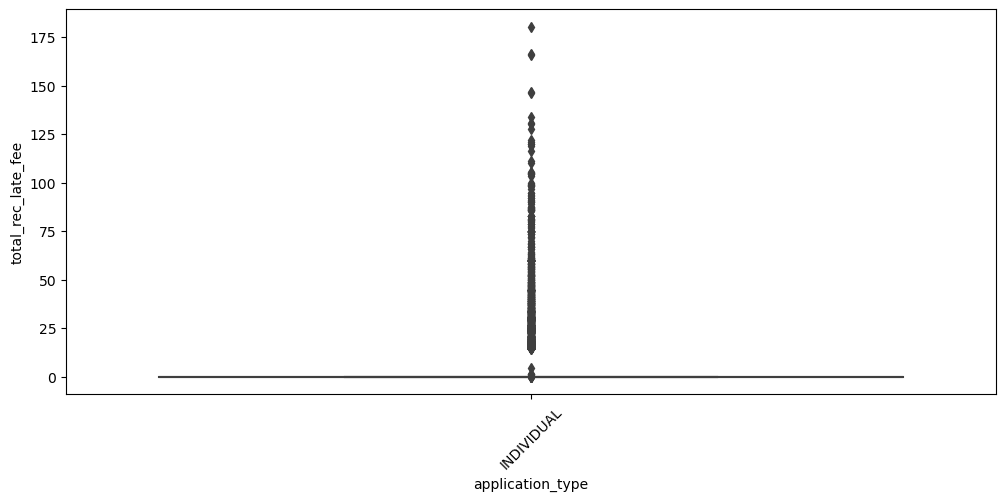

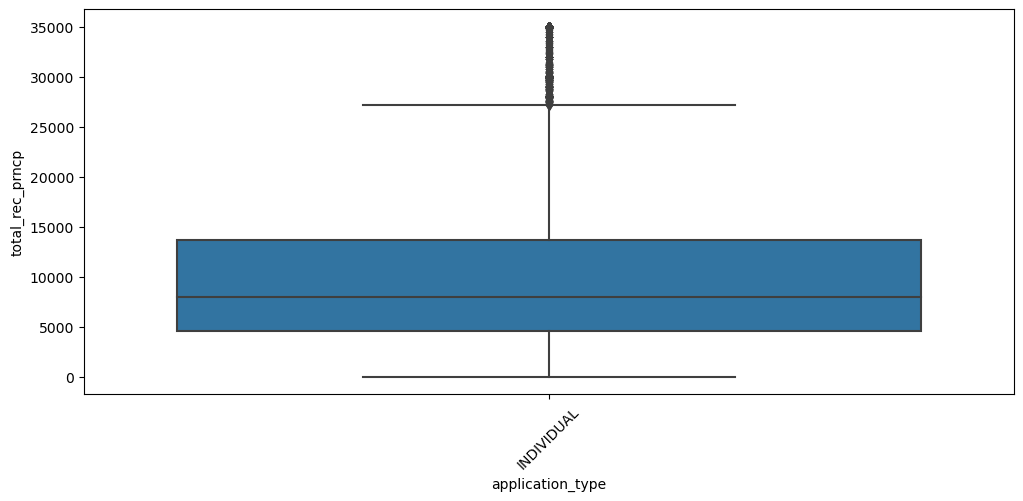

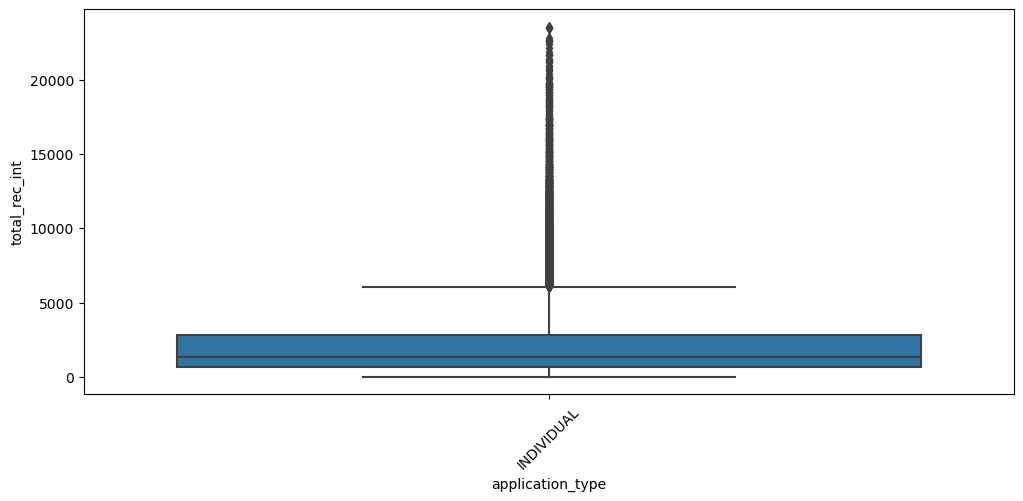

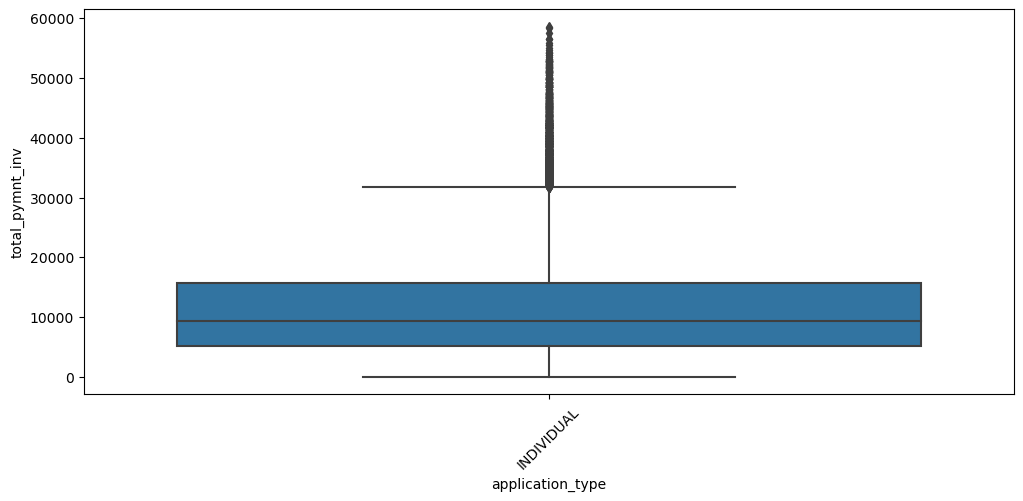

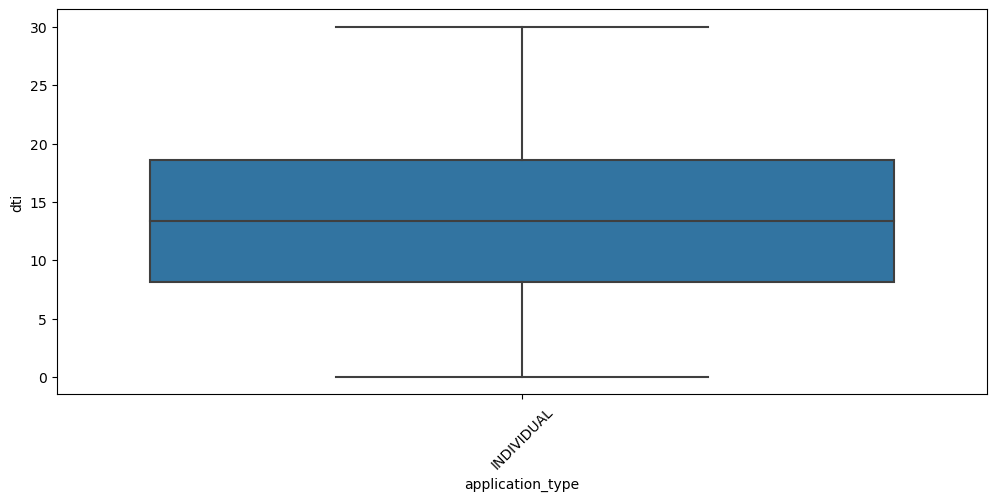

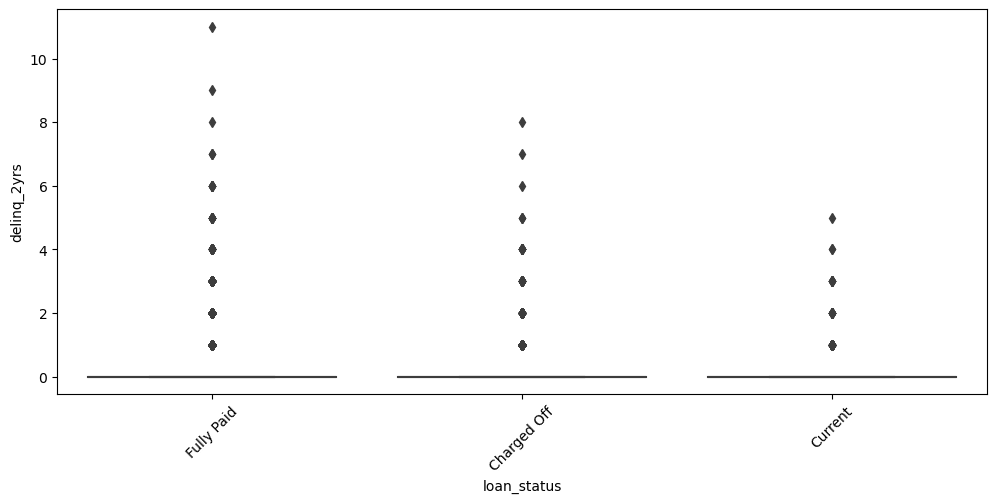

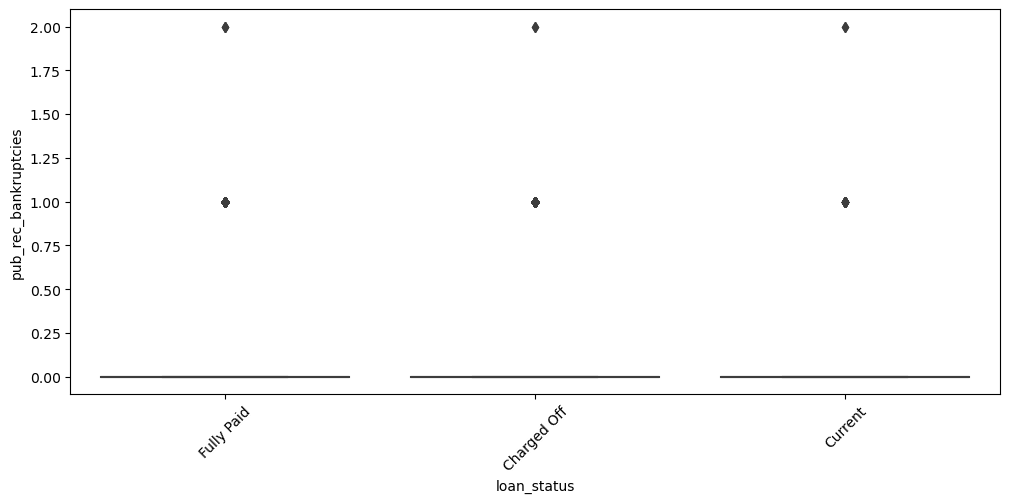

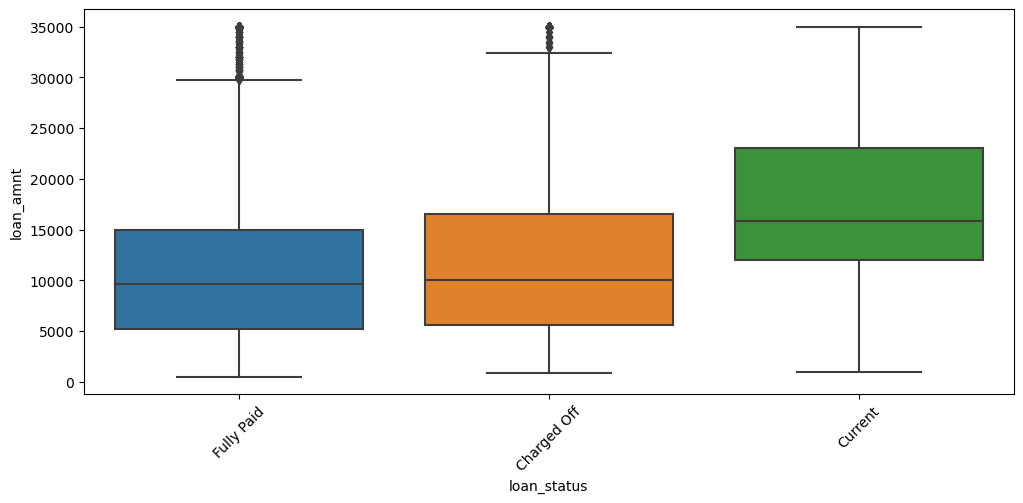

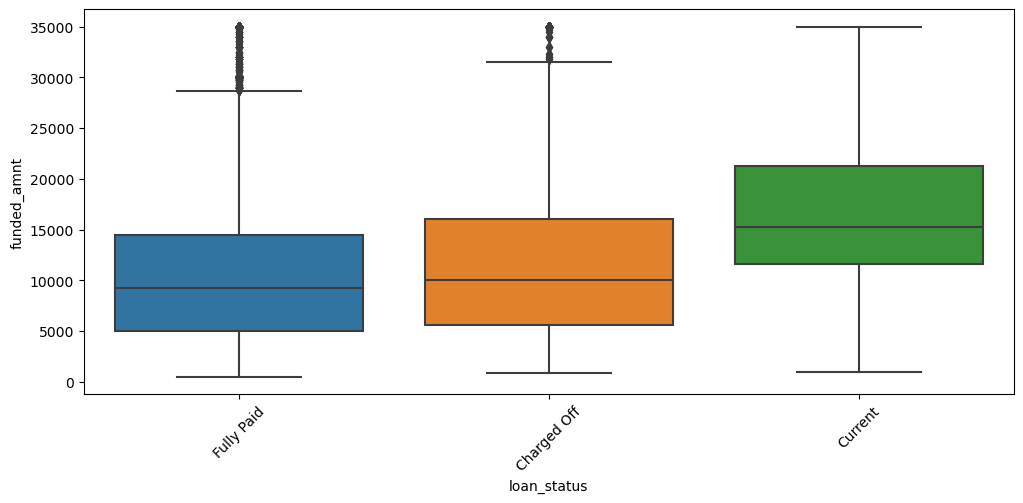

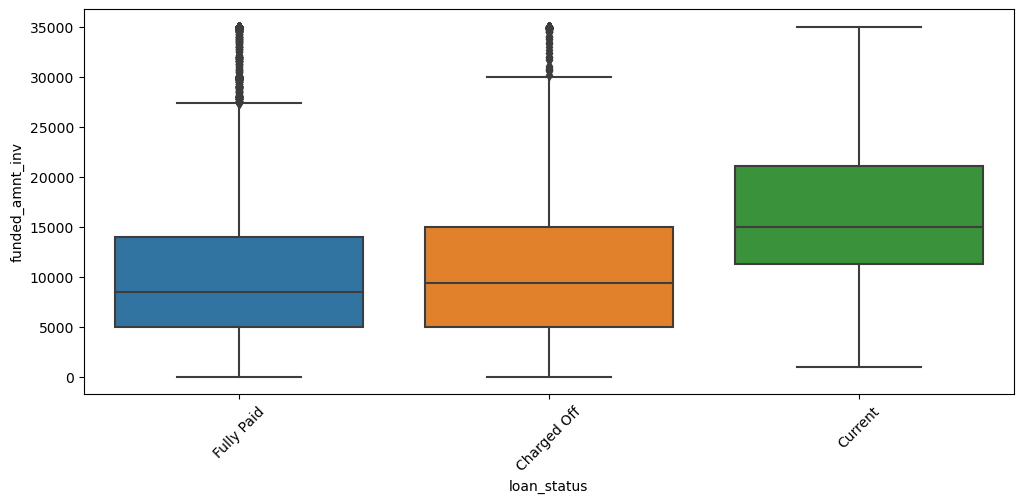

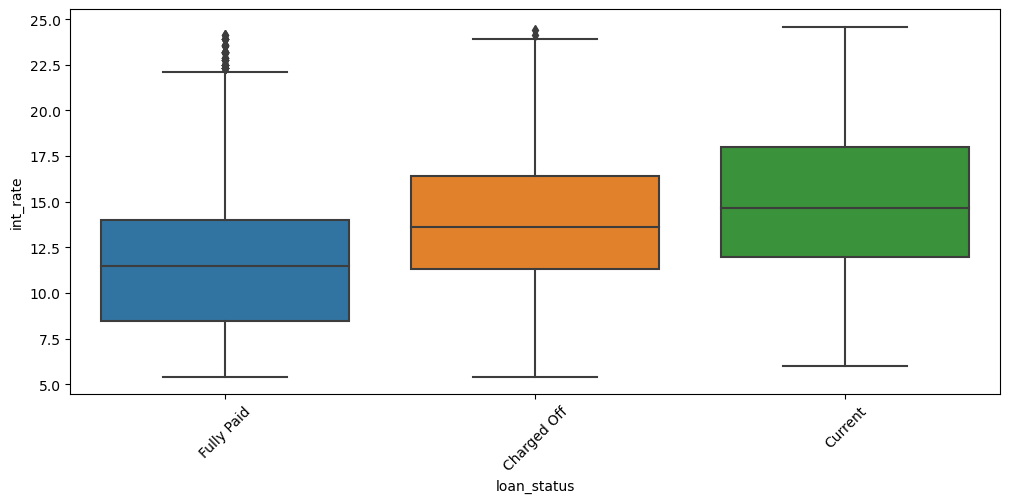

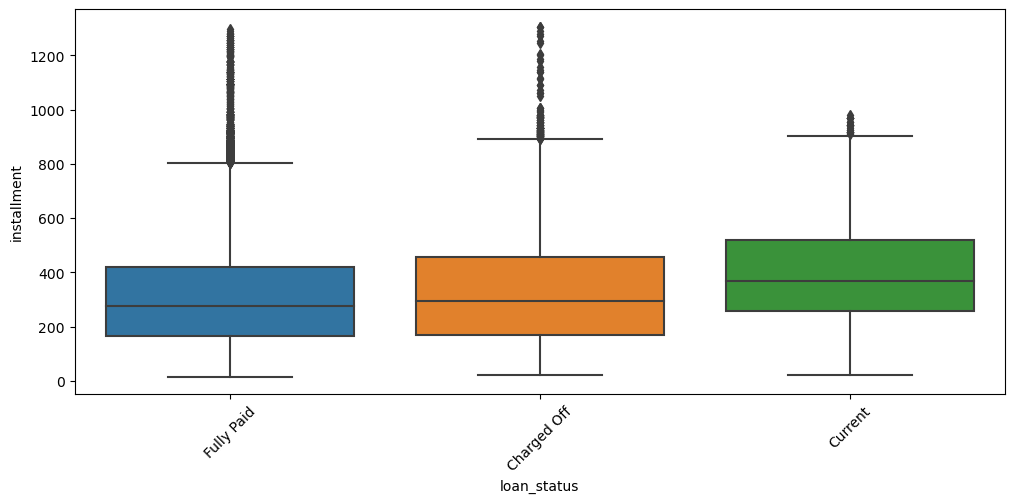

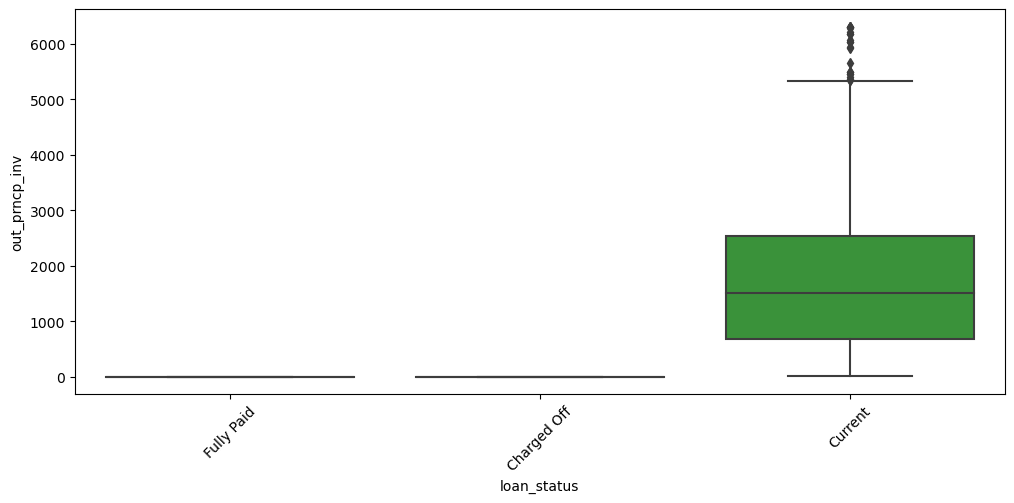

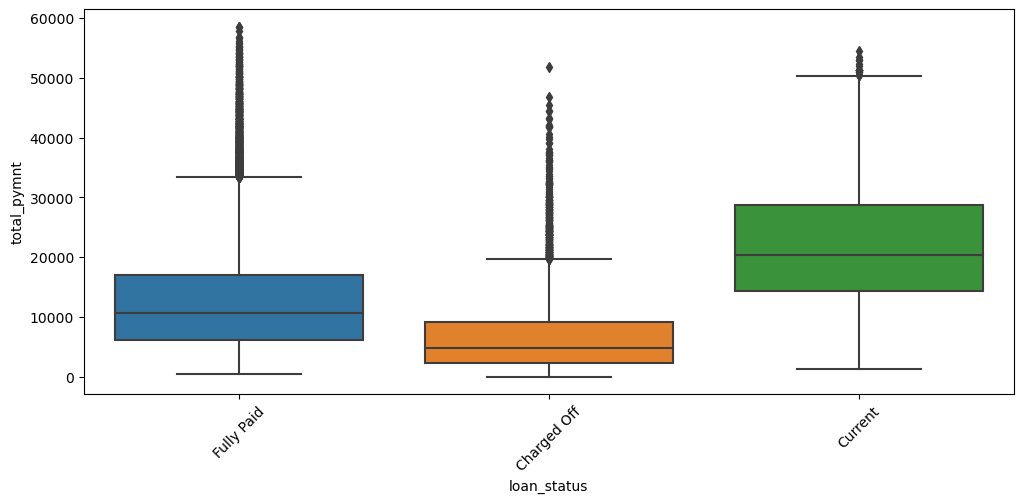

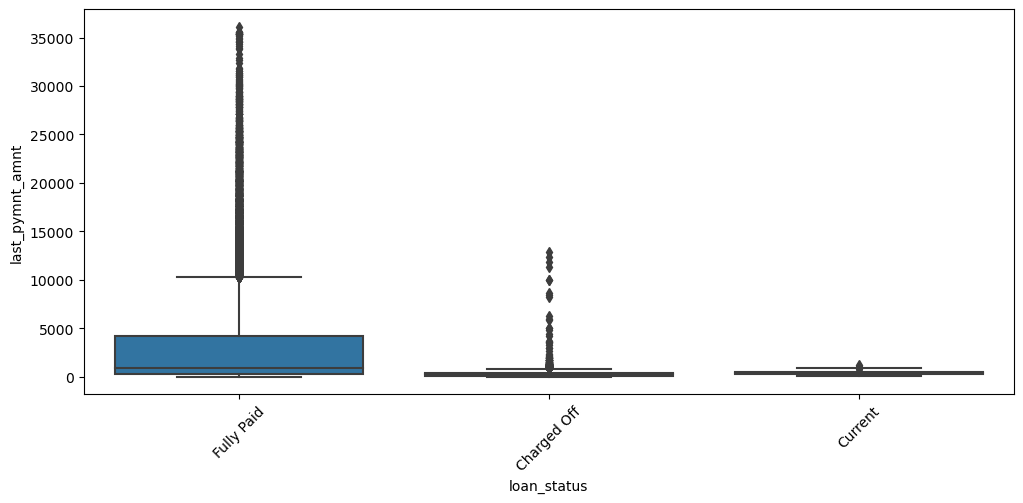

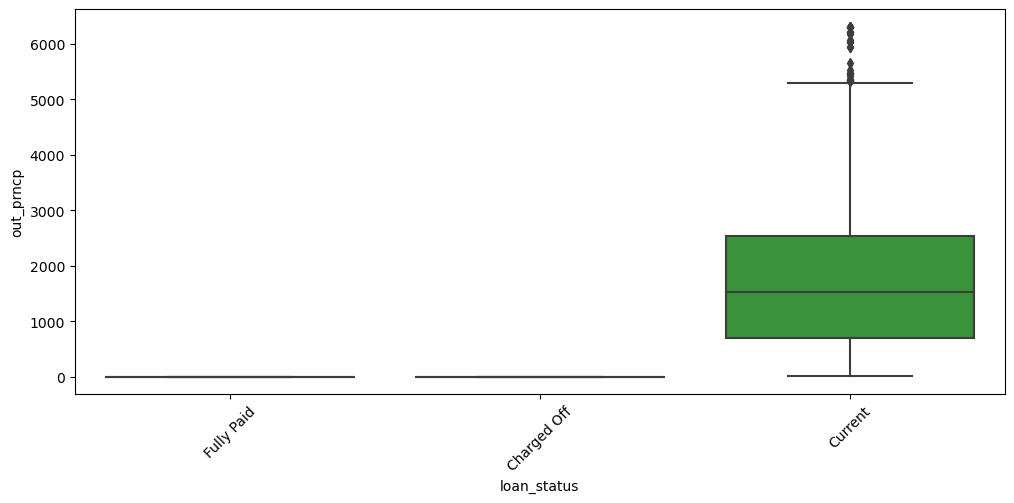

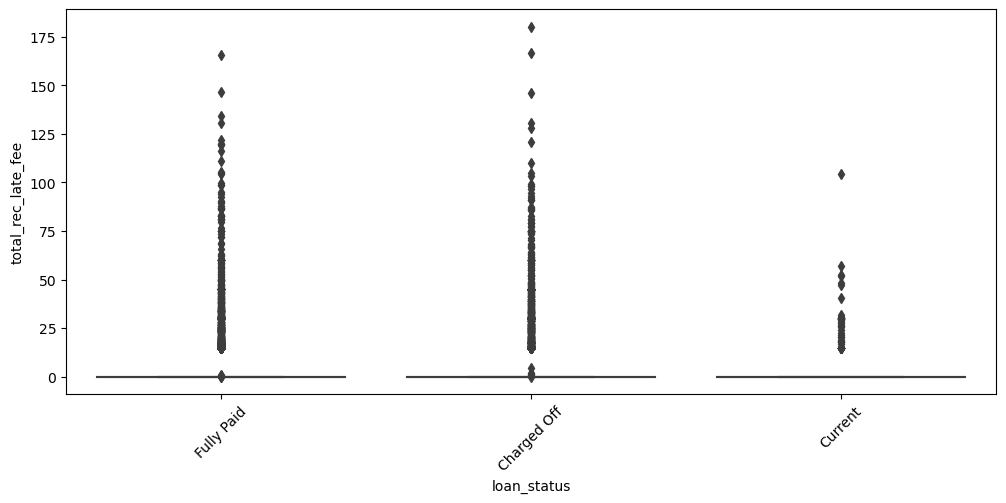

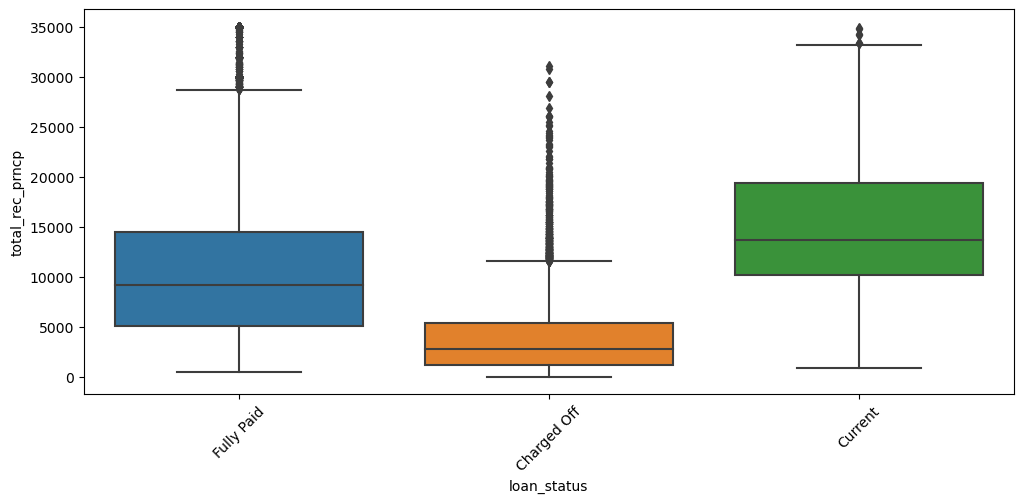

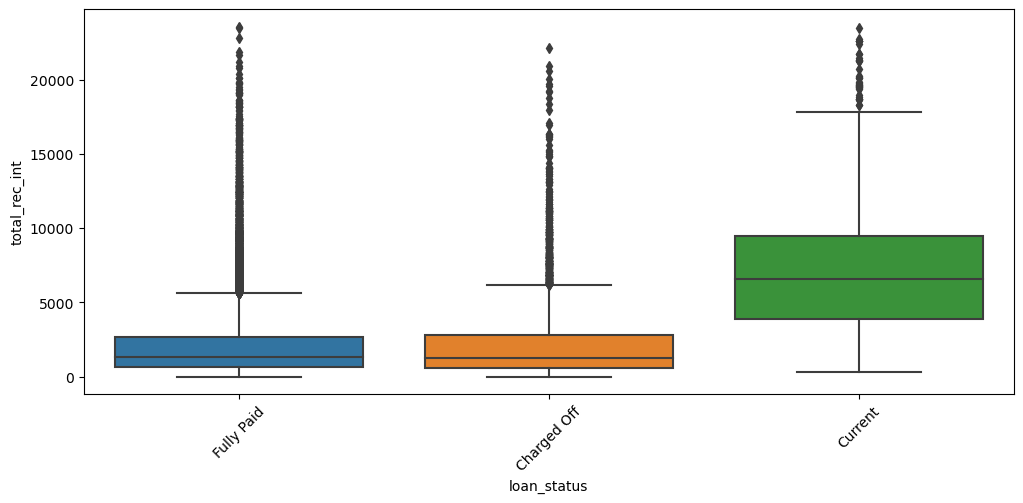

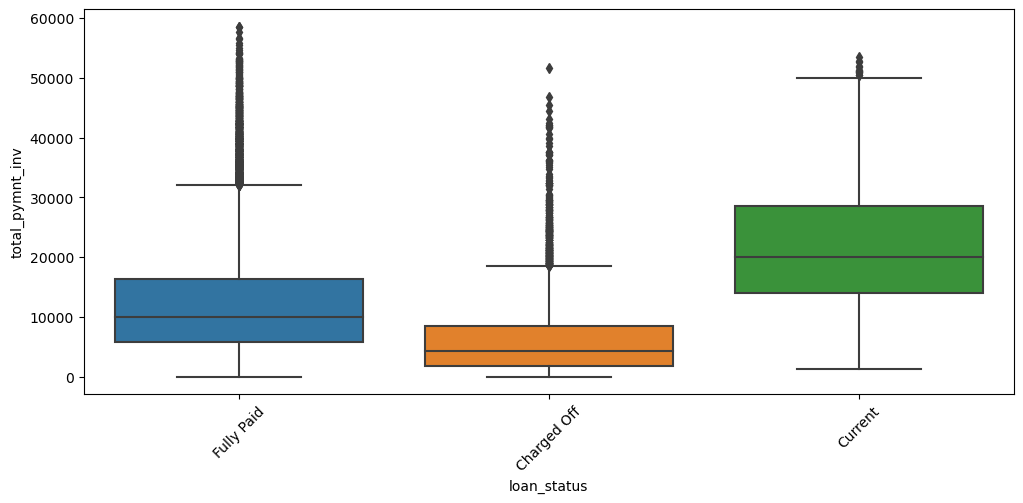

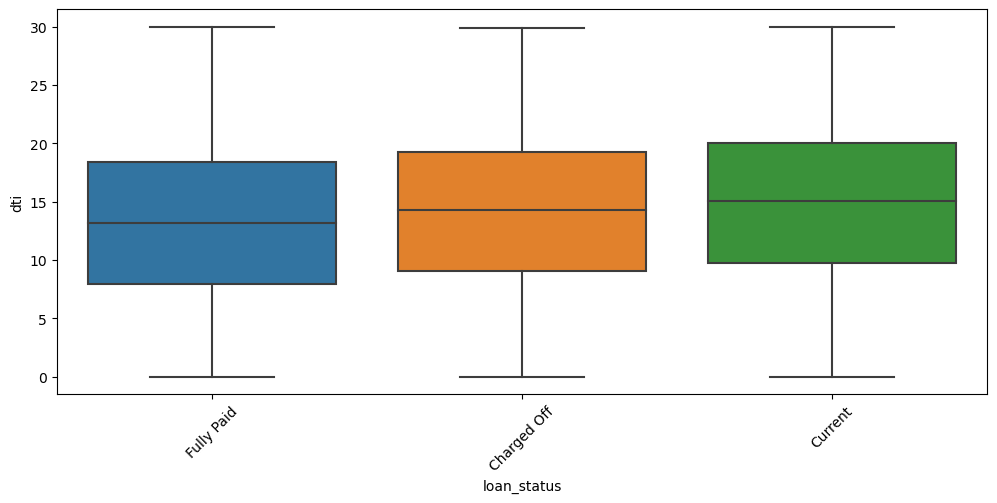

In [135]:
for col1 in imp_cat_cols:
    for col2 in imp_cont_cols:
        if col1!=col2:
            plt.figure(figsize = (12,5))
            plt.xticks(rotation=45)
            sns.boxplot(x=loan[col1],y=loan[col2])
            plt.show()

## Multivariate Analysis

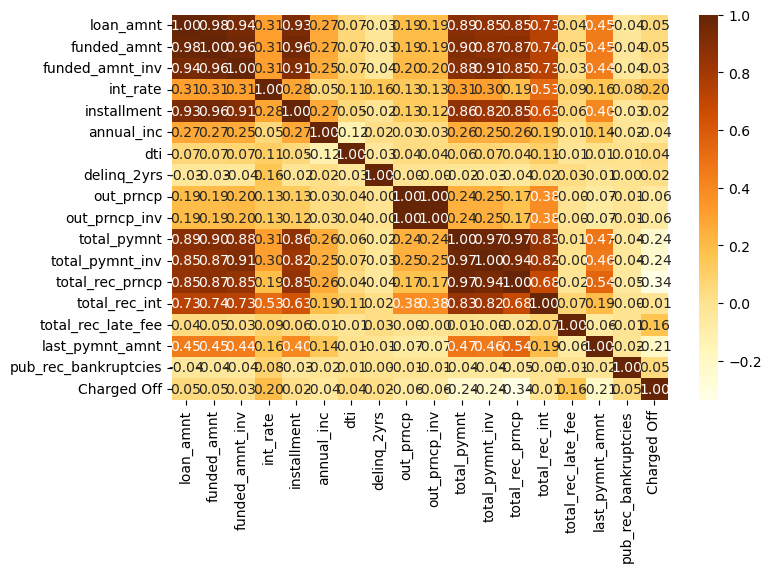

In [138]:
plt.figure(figsize=(8,5))
sns.heatmap(loan.corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()

#### Above chart shows that Charged Off seems driving by Total principle received,int_rate,last_payment_amnt. 
#### We can observe that more the interest rate, more chances of charged off. Also higher the principal amount, higher chances of defaulter.

### Categorical vs Categorical

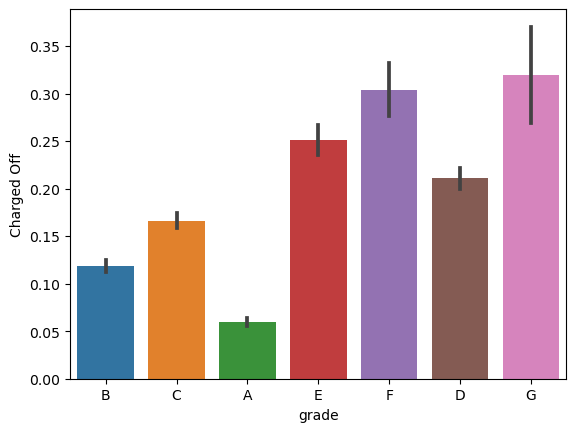

In [139]:
sns.barplot(x = loan['grade'], y = loan['Charged Off'])
plt.show()

<Axes: xlabel='grade', ylabel='count'>

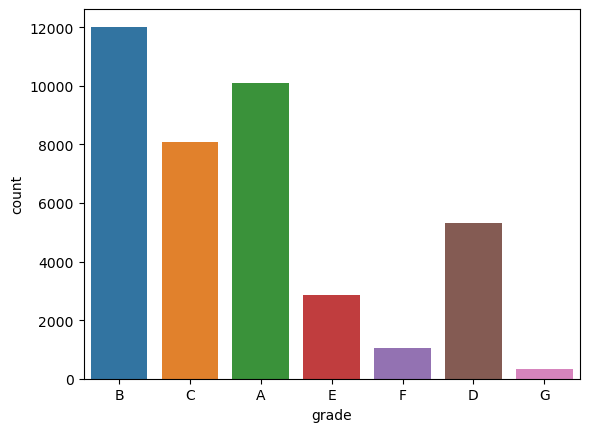

In [140]:
sns.countplot(x=loan["grade"])

#### From the above two charts, it's clearly evident that the "grade" is a clear driving factor of loan defaulter. The  lower the grade, the higher the chances of getting charged off. G grade is most probable of defaulter and A grade is less probable to default.

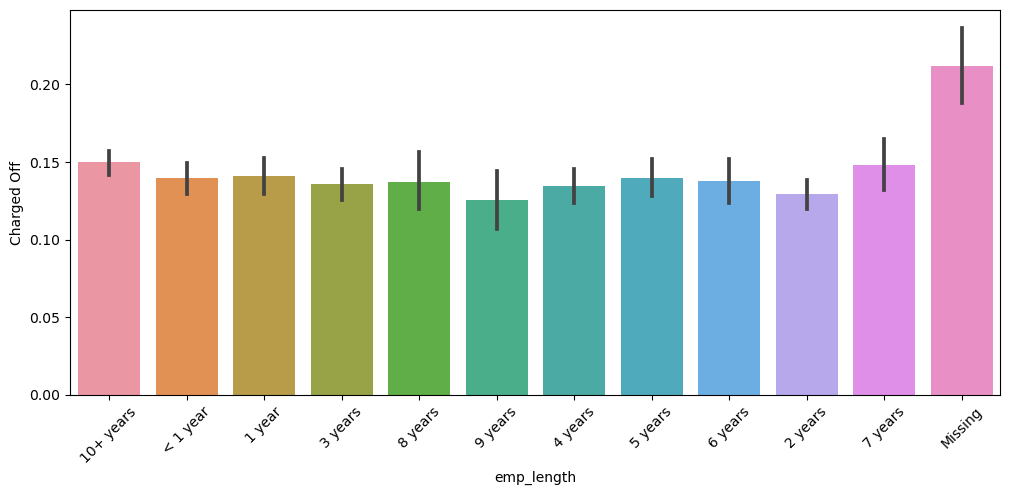

In [141]:
plt.figure(figsize = (12,5))
plt.xticks(rotation=45)
sns.barplot(x = loan['emp_length'], y = loan['Charged Off'])
plt.show()

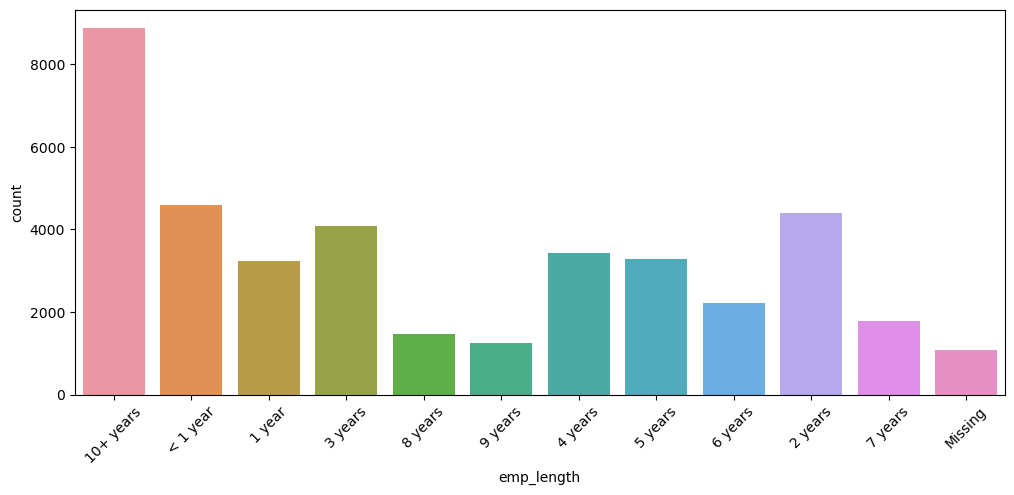

In [142]:
plt.figure(figsize = (12,5))
plt.xticks(rotation=45)
sns.countplot(x=loan["emp_length"])
plt.show()

In [143]:
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Missing      1075
Name: emp_length, dtype: int64


#### From the above charts Emp_length vs charged_off and emp_length cout charts , It's clear that 

#### 1.Though emp_length missing has less count, they are more probabale to default the loan. Hence it's always advisable to offer loan to employees having stable service period, it's advised to go for employment history and then approve the loan.

#### 2. Emp_length 10+ has huge count in the data, but their charged off seems similar with other data values, hence it shows that 10+ employees, have less probable to default the loan.

#### P.S: Here assumption is that missing emp_length means -> he is not working in a stable job anywhere, hence it’s data not captured in input data.

### Let's see if Annual_inc drives charged off or not

In [144]:
# taking a new data set to contain data only for annual income less than 1lac as we have observed outliers in it
loan1 = loan[loan['annual_inc']<100000]

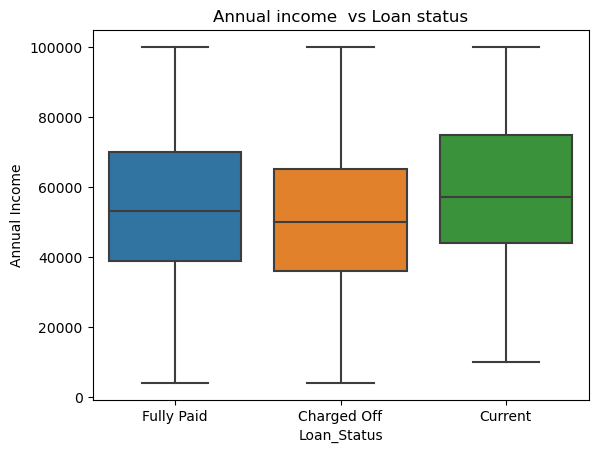

In [145]:
sns.boxplot(y=loan1['annual_inc'],x=loan1['loan_status'])
plt.xlabel('Loan_Status')
plt.ylabel('Annual Income')
plt.title('Annual income  vs Loan status')
plt.show()

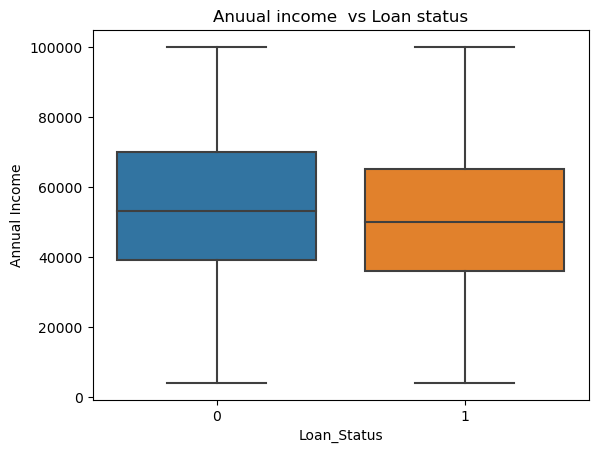

In [146]:
sns.boxplot(y=loan1['annual_inc'],x=loan1['Charged Off'])
plt.xlabel('Loan_Status')
plt.ylabel('Annual Income')
plt.title('Anuual income  vs Loan status')
plt.show()

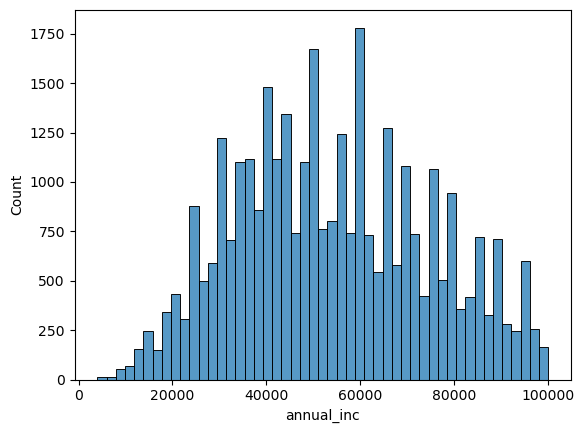

In [147]:
sns.histplot(loan1['annual_inc'])
plt.show()

#### From the above 3 charts, it looks like Annual_income is not driving charged off,  they are not much related.